# Machine Learning project  Group = [ 202122_Fall_AA_52 ]

Group Members :
- Mohamed Ali Felfel (20211322@novaims.unl.pt)<br>  m20211322
- Tagunova, Maiia (m20210984@novaims.unl.pt) <br>m20210984
- Canhoto, Vera (m20210659@novaims.unl.pt)<br> m20210659
- Ramzi Alayass ( m20210705@novaims.unl.pt) <br>m20210705
- Helena Coutinho Duarte Capela Morais  (m20210636@novaims.unl.pt)<br> m20210636


#### Objectif :  Which customers are more likely to buy our products ?



1. [Data Understanding](#1)
   - 1.1 [importing libraries](#1.1)
   - 1.2 [importing data](#1.2)
   - 1.3 [Data Description](#1.3)
   - 1.4 [initial Analysis](#1.4)
        - 1.4.1  [initial metric and non metric features](#1.4.1)
        - 1.4.2  [Analysis and some vizulations](#1.4.1) 
   - 1.5 [Variables' Distribution](#1.5)     
        - 1.5.1  [Categorical Variables - Histograms](#1.5.1)
        - 1.5.2  [Numeric Variables - Histograms](#1.5.2)
        - 1.5.3[Numeric Variables - Boxplots](#1.5.3)
2. [Data Preprocessing](#2)
   - 2.1 [Fix wrong data types](#2.1)
   - 2.2 [Oulier removel](#2.2)   -
        - 2.2.1  [Manuel inspection](#2.2.1)
        - 2.2.2  [Zscore](#2.2.2) 
        - 2.2.3  [IQR](#2.2.2)         
   - 2.3 [Feature engenniring](#2.3)     
3. [Input Variables and Target Split](#3) 
4. [Encoding - OneHotEncoder](#4)
5. [Standardization](#5)
   - 5.1 [Robust Scaler](#5.1)
   - 5.2 [MinMax Scaler](#5.2)
   - 5.3 [StandardScaler](#5.3)   
6. [Feature selcetion](#6)
   -  6.1 [corrlation's matrix](#6.1)   
        - 6.1.1  [corrlation's matrix : Pearson](#6.1.1)
        - 6.1.2  [corrlation's matrix : Spearman](#6.1.2) 
   -  6.2 [Recursive Feature Elimination - RFE](#6.2)    
   -  6.3 [Lasso Regression](#6.3)
   -  6.4 [Ridge regression](#6.4)
   -  6.5 [Chi-Square](#6.5)
   -  6.6 [A-Nova Values](#6.6)
   -  6.7 [Feature Importances - Tree based Classifiers](#6.7)
   -  6.8 [Gini Importance | Entropy Importance](#6.8)
   -  6.9 [MAE | MSE | FRIEDMAN Importances](#6.9)
   -  6.10 [AdaBoost Feature Importances](#6.10)
   -  6.11 [Final Selected Features](#6.11)
7. [Train test split](#7)
8. [Re-Sampling Techniques for Imbalanced Classification](#8)
    - 8.1 [random undersampling](#8.1)
    - 8.2 [random oversampling](#8.2)
    - 8.3 [combining random oversampling and undersampling](#8.3)
    - 8.4 [SMOTE - Synthetic Minority Oversampling Technique](#8.4)
    - 8.5 [ADASYN - Adaptive Synthetic Oversampling](#8.5)
9. [Modeling](#9) 
    - 9.1 [LOGISTIC REGRESSION](#9.1)
    - 9.2 [KNN](#9.2)
    - 9.3 [Decision trees](#9.3)
    - 9.4 [Gaussian Naive Bayes](#9.4)
    - 9.5 [GBC classifier ](#9.5)
    - 9.6 [SVM](#9.6)
    - 9.7 [BAGGING](#9.7)
    - 9.8 [Balanced Bagging Classifier trees](#9.8)
    - 9.9 [Ada-boost](#9.9)
    - 9.10 [Stacking classifier](#9.10)
    - 9.11 [Voting Classifier](#9.11)
    - 9.12 [Random Forrest](#9.12)
    - 9.13 [PassiveAggressiveClassifier](#9.13)
10. [Models Comparison](#10)  
    - 9.1 [Models Comparison](#10.1)
    - 9.2. [ROC Curve ](#10.2)

<a class="anchor" id="1"></a>


## 1 .Data Understanding




<a class="anchor" id="1.1"></a>
### 1.1 .importing libraries


In [1]:
#Loading libraries
import pandas as pd
from pandas_profiling import ProfileReport
from math import ceil

import numpy as np

import scipy as sp
from scipy.stats import spearmanr

import seaborn as sns

import math

from datetime import datetime
import calendar

import matplotlib
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
# import mglearn

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()


<a class="anchor" id="1.2"></a>
### 1.2 .importing data



In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
train.head(5)

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
0  102863333  21-Mar-20                 0                  0.0          0   
1  103117814  20-May-20                 0                  0.0          0   
2  103201891   4-Dec-20                 0                  0.0          0   
3  103226087  22-Dec-20                 0                  0.0          0   
4  103234445  24-Nov-20                 0                  0.0          2   

   FAQ_Duration  Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
0           0.0              3           64.0000                      0.0000   
1           0.0             23          684.5000                      0.0217   
2           0.0              8           95.0000                      0.0250   
3           0.0              9          608.7500                      0.0000   
4         386.0             36         1609.9397                      0.0000   

   GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  Browser  \
0                    0.0667                     0.0000   MacOSX        2   
1                    0.0449                     0.0000  Windows        2   
2                    0.0583                     0.0000  Windows        4   
3                    0.0250                    42.4225  Windows        2   
4                    0.0093                    12.5033  Windows        2   

          Country  Type_of_Traffic Type_of_Visitor  Buy  
0        Portugal                1        Returner    0  
1          France                6        Returner    0  
2           Italy                1        Returner    0  
3  United Kingdom                2        Returner    1  
4           Spain                3        Returner    1

In [4]:
train = train.set_index('Access_ID')
test = test.set_index('Access_ID')

In [5]:
train.head(3)

Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
Access_ID                                                                
102863333  21-Mar-20                 0                  0.0          0   
103117814  20-May-20                 0                  0.0          0   
103201891   4-Dec-20                 0                  0.0          0   

           FAQ_Duration  Product_Pages  Product_Duration  \
Access_ID                                                  
102863333           0.0              3              64.0   
103117814           0.0             23             684.5   
103201891           0.0              8              95.0   

           GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
Access_ID                                                         
102863333                      0.0000                    0.0667   
103117814                      0.0217                    0.0449   
103201891                      0.0250                    0.0583   

           GoogleAnalytics_PageValue       OS  Browser   Country  \
Access_ID                                                          
102863333                        0.0   MacOSX        2  Portugal   
103117814                        0.0  Windows        2    France   
103201891                        0.0  Windows        4     Italy   

           Type_of_Traffic Type_of_Visitor  Buy  
Access_ID                                        
102863333                1        Returner    0  
103117814                6        Returner    0  
103201891                1        Returner    0

<a class="anchor" id="1.3"></a>


### 1.3 .Data Description



### Metadata 
Access_ID - Unique identification of the user access to the website<br>
Date - Website visit date<br>
AccountMng_Pages - Number of pages visited by the user about account management<br>
AccountMng_Duration - Total amount of time (seconds) spent by the user on account management related pages<br>
FAQ_Pages - Number of pages visited by the user about frequently asked questions, shipping information and company related pages<br>
FAQ_Duration - Total amount of time (seconds) spent by the user on FAQ pages<br>
Product_Pages - Number of pages visited by the user about products and services offered by the company<br>
Product_Duration - Total amount in time (seconds) spent by the user on products and services related pages<br>
GoogleAnalytics_BounceRate - Average bounce rate value of the pages visited by the user, provided by google analytics<br>
GoogleAnalytics_ExitRate - Average exit rate value of the pages visited by the user, provided by google analytics<br>
GoogleAnalytics_PageValue - Average page value of the pages visited by the user, provided by google analytics<br>
OS - Operating System of the user<br>
Browser - Browser used to access the webpage<br>
Country - The country of the user<br>
Type_of_Traffic - Traffic Source by which the user has accessed the website (e.g., email, banner, direct)<br>
Type_of_Visitor - User type as "New access", "Returner" or "Other"<br>
Buy - Class label indicating if the user finalized their actions in the website with a transaction <b>Target<b/><br>

In [6]:
train.shape

(9999, 16)

In [7]:
train.dtypes

Date                           object
AccountMng_Pages                int64
AccountMng_Duration           float64
FAQ_Pages                       int64
FAQ_Duration                  float64
Product_Pages                   int64
Product_Duration              float64
GoogleAnalytics_BounceRate    float64
GoogleAnalytics_ExitRate      float64
GoogleAnalytics_PageValue     float64
OS                             object
Browser                         int64
Country                        object
Type_of_Traffic                 int64
Type_of_Visitor                object
Buy                             int64
dtype: object

In [8]:
train.describe(include="all")

Date  AccountMng_Pages  AccountMng_Duration    FAQ_Pages  \
count        9999       9999.000000          9999.000000  9999.000000   
unique        305               NaN                  NaN          NaN   
top     25-May-20               NaN                  NaN          NaN   
freq          120               NaN                  NaN          NaN   
mean          NaN          2.324232            81.205854     0.508051   
std           NaN          3.340676           179.715545     1.279390   
min           NaN          0.000000             0.000000     0.000000   
25%           NaN          0.000000             0.000000     0.000000   
50%           NaN          1.000000             7.500000     0.000000   
75%           NaN          4.000000            92.208350     0.000000   
max           NaN         27.000000          3398.750000    24.000000   

        FAQ_Duration  Product_Pages  Product_Duration  \
count    9999.000000    9999.000000       9999.000000   
unique           NaN            NaN               NaN   
top              NaN            NaN               NaN   
freq             NaN            NaN               NaN   
mean       34.559101      31.685869       1199.769430   
std       139.796989      44.550277       1958.276304   
min         0.000000       0.000000          0.000000   
25%         0.000000       7.000000        183.562500   
50%         0.000000      18.000000        599.000000   
75%         0.000000      38.000000       1470.270800   
max      2549.375000     705.000000      63973.522200   

        GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
count                  9999.000000               9999.000000   
unique                         NaN                       NaN   
top                            NaN                       NaN   
freq                           NaN                       NaN   
mean                      0.022305                  0.043181   
std                       0.048776                  0.048845   
min                       0.000000                  0.000000   
25%                       0.000000                  0.014300   
50%                       0.003200                  0.025100   
75%                       0.016800                  0.050000   
max                       0.200000                  0.200000   

        GoogleAnalytics_PageValue       OS      Browser   Country  \
count                 9999.000000     9999  9999.000000      9999   
unique                        NaN        8          NaN         9   
top                           NaN  Windows          NaN  Portugal   
freq                          NaN     5361          NaN      3870   
mean                     5.963120      NaN     2.352535       NaN   
std                     18.753626      NaN     1.715698       NaN   
min                      0.000000      NaN     1.000000       NaN   
25%                      0.000000      NaN     2.000000       NaN   
50%                      0.000000      NaN     2.000000       NaN   
75%                      0.000000      NaN     2.000000       NaN   
max                    361.763700      NaN    13.000000       NaN   

        Type_of_Traffic Type_of_Visitor          Buy  
count       9999.000000            9999  9999.000000  
unique              NaN               3          NaN  
top                 NaN        Returner          NaN  
freq                NaN            8534          NaN  
mean           3.957496             NaN     0.155216  
std            3.675159             NaN     0.362128  
min            1.000000             NaN     0.000000  
25%            2.000000             NaN     0.000000  
50%            2.000000             NaN     0.000000  
75%            4.000000             NaN     0.000000  
max           15.000000             NaN     1.000000

In [9]:
test.describe(include="all")

Date  AccountMng_Pages  AccountMng_Duration    FAQ_Pages  \
count       2300         2300.0000          2300.000000  2300.000000   
unique       287               NaN                  NaN          NaN   
top     5-May-20               NaN                  NaN          NaN   
freq          35               NaN                  NaN          NaN   
mean         NaN            2.2900            79.780933     0.486522   
std          NaN            3.2523           164.447609     1.234311   
min          NaN            0.0000             0.000000     0.000000   
25%          NaN            0.0000             0.000000     0.000000   
50%          NaN            1.0000             8.550000     0.000000   
75%          NaN            4.0000            97.850000     0.000000   
max          NaN           23.0000          2720.500000    12.000000   

        FAQ_Duration  Product_Pages  Product_Duration  \
count    2300.000000    2300.000000       2300.000000   
unique           NaN            NaN               NaN   
top              NaN            NaN               NaN   
freq             NaN            NaN               NaN   
mean       34.266832      31.928696       1172.039254   
std       145.500683      44.150226       1702.730695   
min         0.000000       0.000000          0.000000   
25%         0.000000       8.000000        186.875000   
50%         0.000000      18.000000        598.689300   
75%         0.000000      38.000000       1439.535275   
max      2252.033300     534.000000      18504.126200   

        GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
count                  2300.000000               2300.000000   
unique                         NaN                       NaN   
top                            NaN                       NaN   
freq                           NaN                       NaN   
mean                      0.021702                  0.042565   
std                       0.047214                  0.047539   
min                       0.000000                  0.000000   
25%                       0.000000                  0.014275   
50%                       0.002900                  0.025200   
75%                       0.016750                  0.050000   
max                       0.200000                  0.200000   

        GoogleAnalytics_PageValue       OS      Browser   Country  \
count                 2300.000000     2300  2300.000000      2300   
unique                        NaN        8          NaN         9   
top                           NaN  Windows          NaN  Portugal   
freq                          NaN     1224          NaN       895   
mean                     5.588465      NaN     2.366087       NaN   
std                     17.781708      NaN     1.701233       NaN   
min                      0.000000      NaN     1.000000       NaN   
25%                      0.000000      NaN     2.000000       NaN   
50%                      0.000000      NaN     2.000000       NaN   
75%                      0.000000      NaN     2.000000       NaN   
max                    258.549900      NaN    13.000000       NaN   

        Type_of_Traffic Type_of_Visitor  
count       2300.000000            2300  
unique              NaN               3  
top                 NaN        Returner  
freq                NaN            1988  
mean           4.012609             NaN  
std            3.710291             NaN  
min            1.000000             NaN  
25%            2.000000             NaN  
50%            2.000000             NaN  
75%            4.000000             NaN  
max           15.000000             NaN

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        9999 non-null   object 
 1   AccountMng_Pages            9999 non-null   int64  
 2   AccountMng_Duration         9999 non-null   float64
 3   FAQ_Pages                   9999 non-null   int64  
 4   FAQ_Duration                9999 non-null   float64
 5   Product_Pages               9999 non-null   int64  
 6   Product_Duration            9999 non-null   float64
 7   GoogleAnalytics_BounceRate  9999 non-null   float64
 8   GoogleAnalytics_ExitRate    9999 non-null   float64
 9   GoogleAnalytics_PageValue   9999 non-null   float64
 10  OS                          9999 non-null   object 
 11  Browser                     9999 non-null   int64  
 12  Country                     9999 non-null   object 
 13  Type_of_Traffic     

<a class="anchor" id="importdatasets">

### 1.3 .Data Exploration

</a>

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        9999 non-null   object 
 1   AccountMng_Pages            9999 non-null   int64  
 2   AccountMng_Duration         9999 non-null   float64
 3   FAQ_Pages                   9999 non-null   int64  
 4   FAQ_Duration                9999 non-null   float64
 5   Product_Pages               9999 non-null   int64  
 6   Product_Duration            9999 non-null   float64
 7   GoogleAnalytics_BounceRate  9999 non-null   float64
 8   GoogleAnalytics_ExitRate    9999 non-null   float64
 9   GoogleAnalytics_PageValue   9999 non-null   float64
 10  OS                          9999 non-null   object 
 11  Browser                     9999 non-null   int64  
 12  Country                     9999 non-null   object 
 13  Type_of_Traffic     

<p> Date type must be convetred to datetime </p>

In [12]:
# Convert the column Birthday into Datetime64 datatype
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [13]:
print(train.duplicated().value_counts())
print(test.duplicated().value_counts())



False    9985
True       14
dtype: int64
False    2300
dtype: int64


In [14]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [15]:
# Check duplicate records
print(train.duplicated().value_counts())
print(test.duplicated().value_counts())


False    9985
dtype: int64
False    2300
dtype: int64


In [16]:
# Check the Missing Values on train dataset
train.isna().sum()

Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [17]:
# Check the Missing Values on test dataset
test.isna().sum()

Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
dtype: int64

<p> No missing values in both data sets <p>

<a class="anchor" id="1.4"></a>
    
### 1.4 initial Analysis
    


<a class="anchor" id="1.4.1"></a>
    
#### 1.4.1 initial metric and non metric features
    


In [18]:
#Define metric and non-metric features
non_metric_features = ["OS", "Country","Date", "Type_of_Visitor", "Browser", "Type_of_Traffic"]
metric_features = train.columns.drop(non_metric_features).to_list()
# metric_features = train.columns.drop(non_metric_features)

<a class="anchor" id="1.4.2"></a>
    
#### 1.4.2 Analysis and some vizulations
    


In [19]:
# Check the Buys and corresponding to countries
train.groupby(['Country', 'Buy']).count()

Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
Country        Buy                                                           
Brazil         0     801               801                  801        801   
               1     145               145                  145        145   
France         0     772               772                  772        772   
               1     151               151                  151        151   
Germany        0     304               304                  304        304   
               1      46                46                   46         46   
Italy          0     516               516                  516        516   
               1      97                97                   97         97   
Other          0     564               564                  564        564   
               1      95                95                   95         95   
Portugal       0    3250              3250                 3250       3250   
               1     609               609                  609        609   
Spain          0    1654              1654                 1654       1654   
               1     290               290                  290        290   
Switzerland    0     220               220                  220        220   
               1      43                43                   43         43   
United Kingdom 0     352               352                  352        352   
               1      76                76                   76         76   

                    FAQ_Duration  Product_Pages  Product_Duration  \
Country        Buy                                                  
Brazil         0             801            801               801   
               1             145            145               145   
France         0             772            772               772   
               1             151            151               151   
Germany        0             304            304               304   
               1              46             46                46   
Italy          0             516            516               516   
               1              97             97                97   
Other          0             564            564               564   
               1              95             95                95   
Portugal       0            3250           3250              3250   
               1             609            609               609   
Spain          0            1654           1654              1654   
               1             290            290               290   
Switzerland    0             220            220               220   
               1              43             43                43   
United Kingdom 0             352            352               352   
               1              76             76                76   

                    GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
Country        Buy                                                         
Brazil         0                           801                       801   
               1                           145                       145   
France         0                           772                       772   
               1                           151                       151   
Germany        0                           304                       304   
               1                            46                        46   
Italy          0                           516                       516   
               1                            97                        97   
Other          0                           564                       564   
               1                            95                        95   
Portugal       0                          3250                      3250   
               1                           609                       609   
Spain         

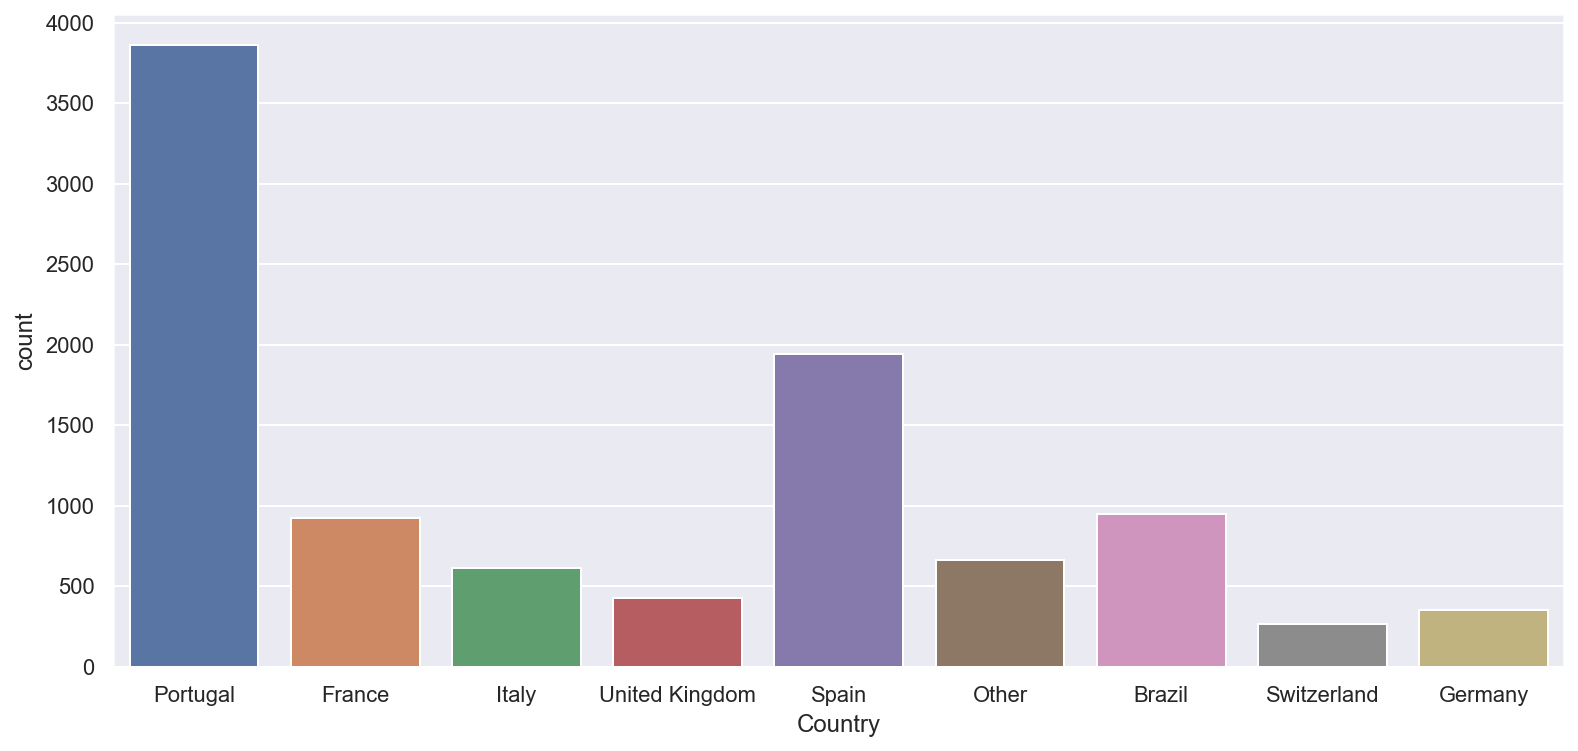

In [20]:
#  Frequency of Country in the train dataset
sns.set() # this resets our formatting defaults
sns.set(rc = {'figure.figsize':(13,6)})
sns.countplot(x=train["Country"])

plt.show()

In [21]:
df_1 = train.loc[:, ["Country", "Buy"]]
groupby = df_1.groupby("Country", axis=0)
groupby.count()

Buy
Country             
Brazil           946
France           923
Germany          350
Italy            613
Other            659
Portugal        3859
Spain           1944
Switzerland      263
United Kingdom   428

<p> so the most buys are from people who are from portugal <p>

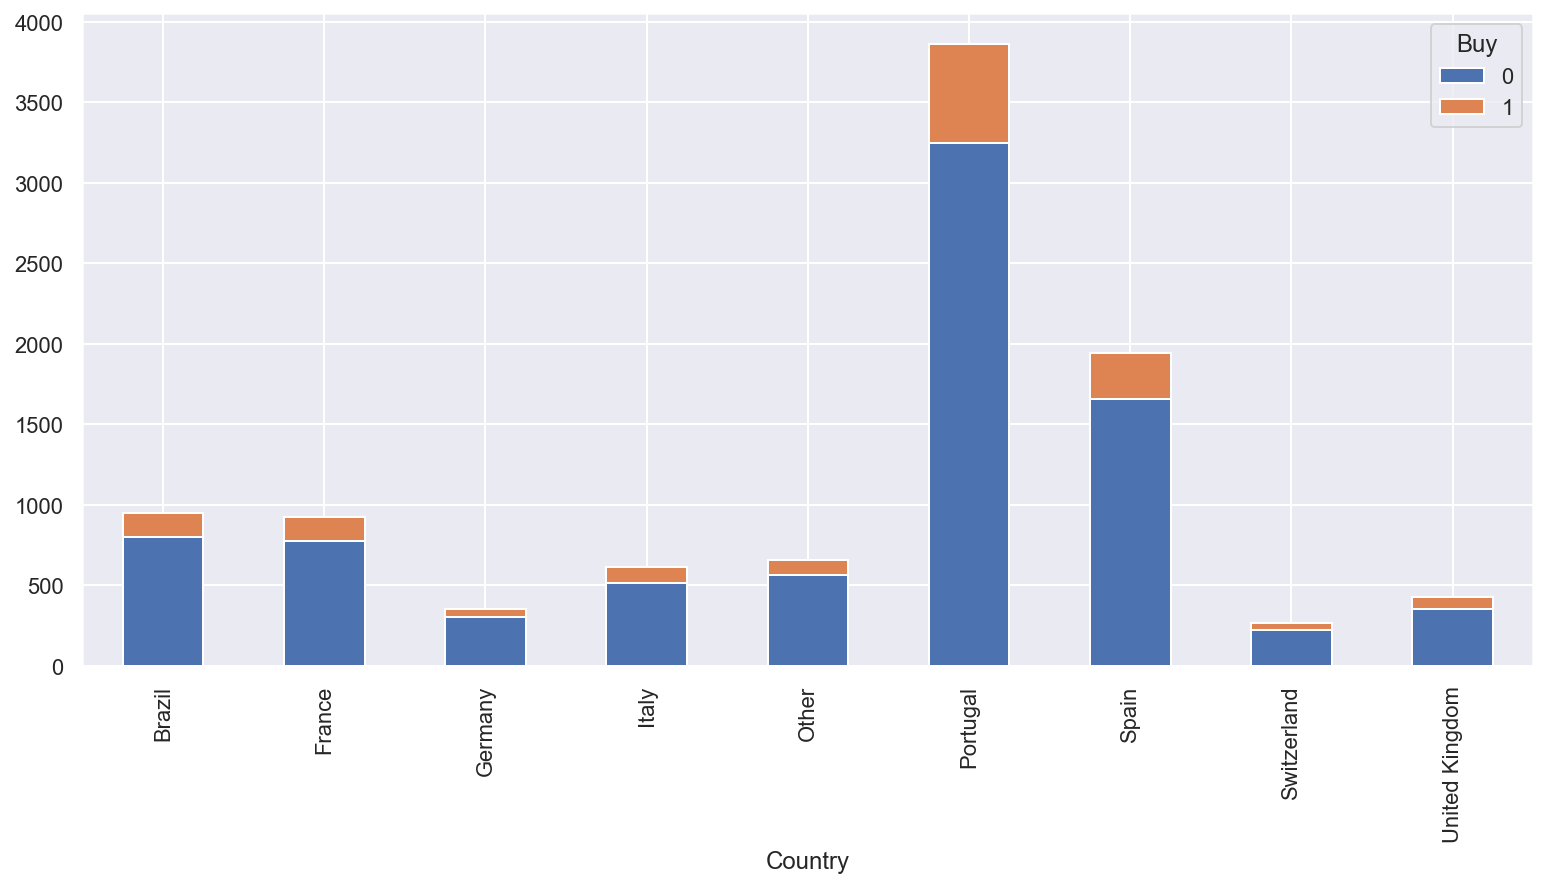

In [22]:
# Let's visualize it
sns.set()
df_counts = train\
    .groupby(['Country', 'Buy'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)

In [23]:
df_1 = train.loc[:, ["OS", "Buy"]]
groupby1 = df_1.groupby("OS", axis=0) 
groupby1.count()

Buy
OS             
Android    2099
Chrome OS    15
Fedora        3
MacOSX     2064
Other         5
Ubuntu       68
Windows    5353
iOS         378

<p> so the most buys are from people who are using Windows Operationg system <p>

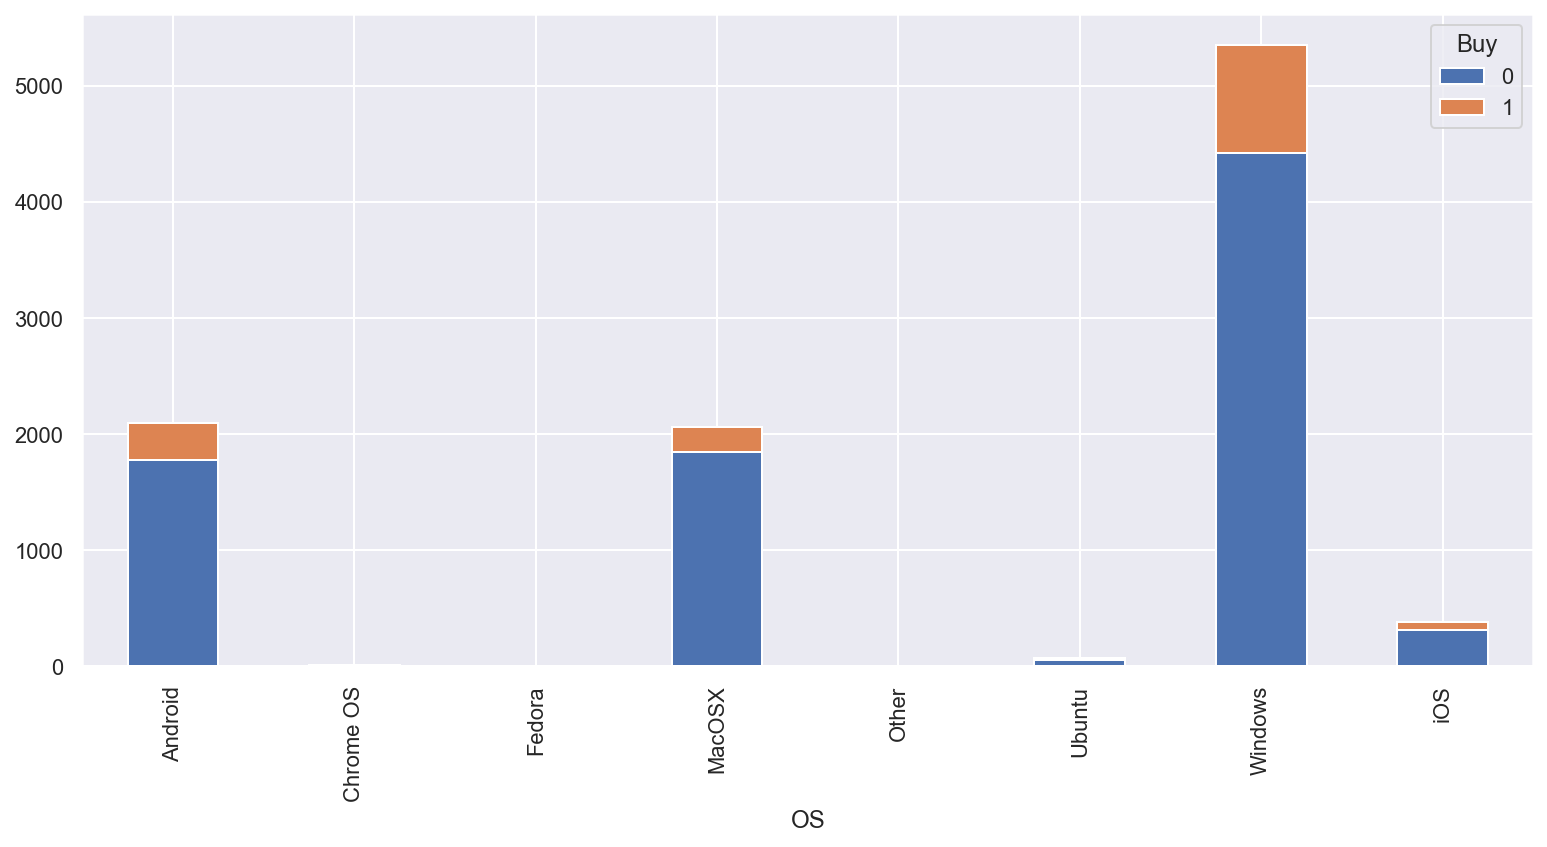

In [24]:
# Let's visualize it
sns.set()
df_counts = train\
    .groupby(['OS', 'Buy'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)

In [25]:
# Count the number of Buys grouped by Operating systmes and Country
train.groupby(["OS","Country"]).count()["Buy"]

OS         Country       
Android    Brazil             215
           France             185
           Germany             92
           Italy               82
           Other              134
           Portugal           869
           Spain              438
           Switzerland         29
           United Kingdom      55
Chrome OS  Brazil               3
           France               2
           Portugal             2
           Spain                5
           United Kingdom       3
Fedora     Germany              2
           Portugal             1
MacOSX     Brazil             206
           France             203
           Germany            103
           Italy               88
           Other              165
           Portugal           777
           Spain              428
           Switzerland         48
           United Kingdom      46
Other      France               1
           Other                2
           Portugal             1
           Spain      

<a class="anchor" id="1.5"></a>


### 1.5 .Variables' Distribution




<a class="anchor" id="1.5.1"></a>
### 1.5.1 .Categorical Variables - Histograms



In [213]:
cat_var = train[non_metric_features].columns.to_list()
cat_var_list = train[non_metric_features].columns.to_list()

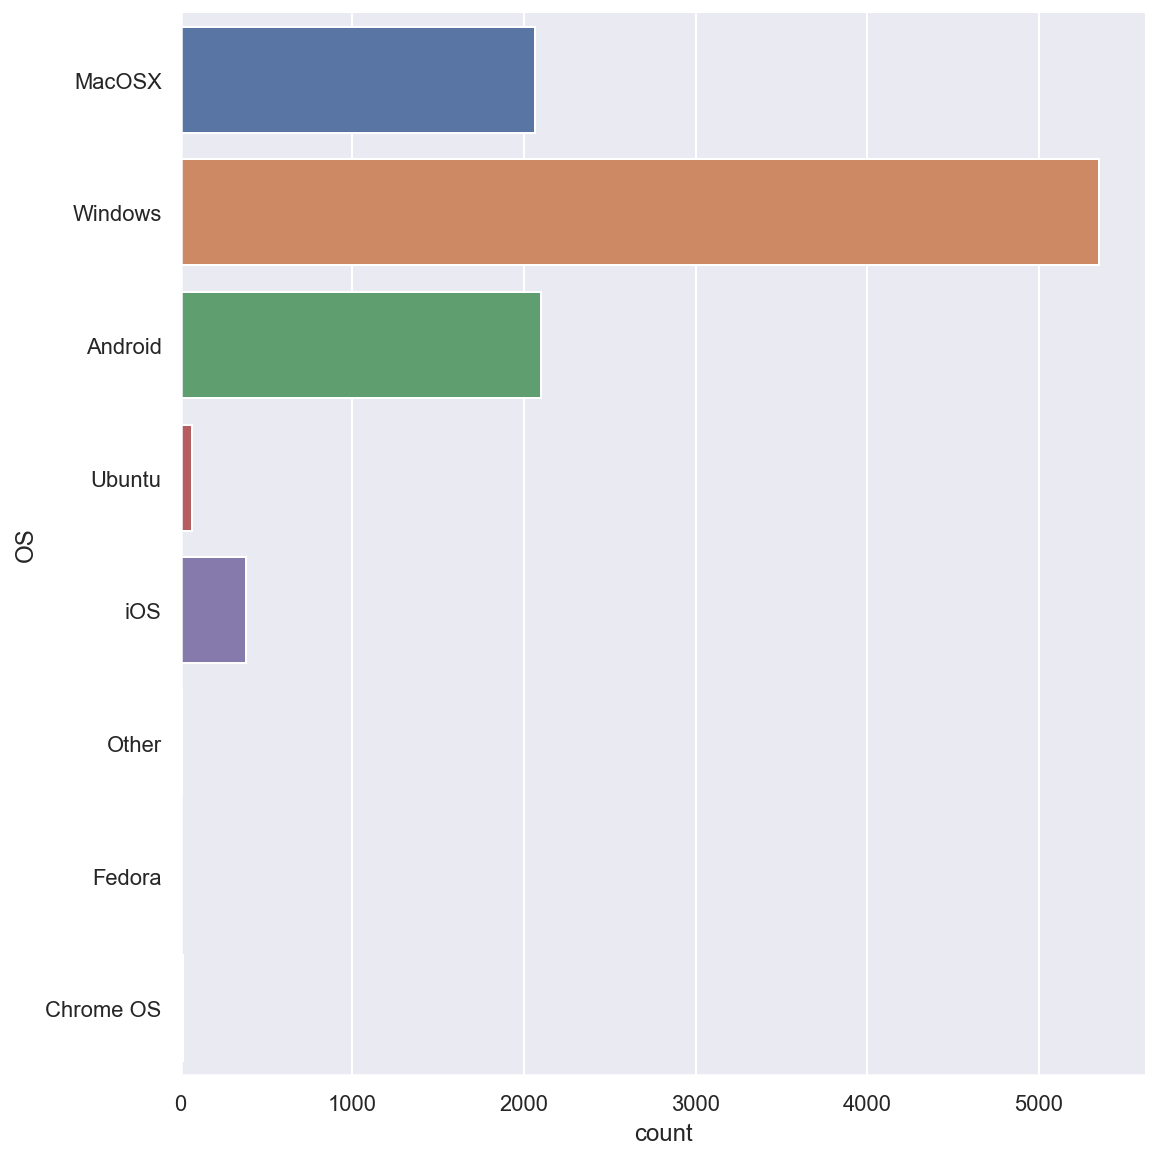

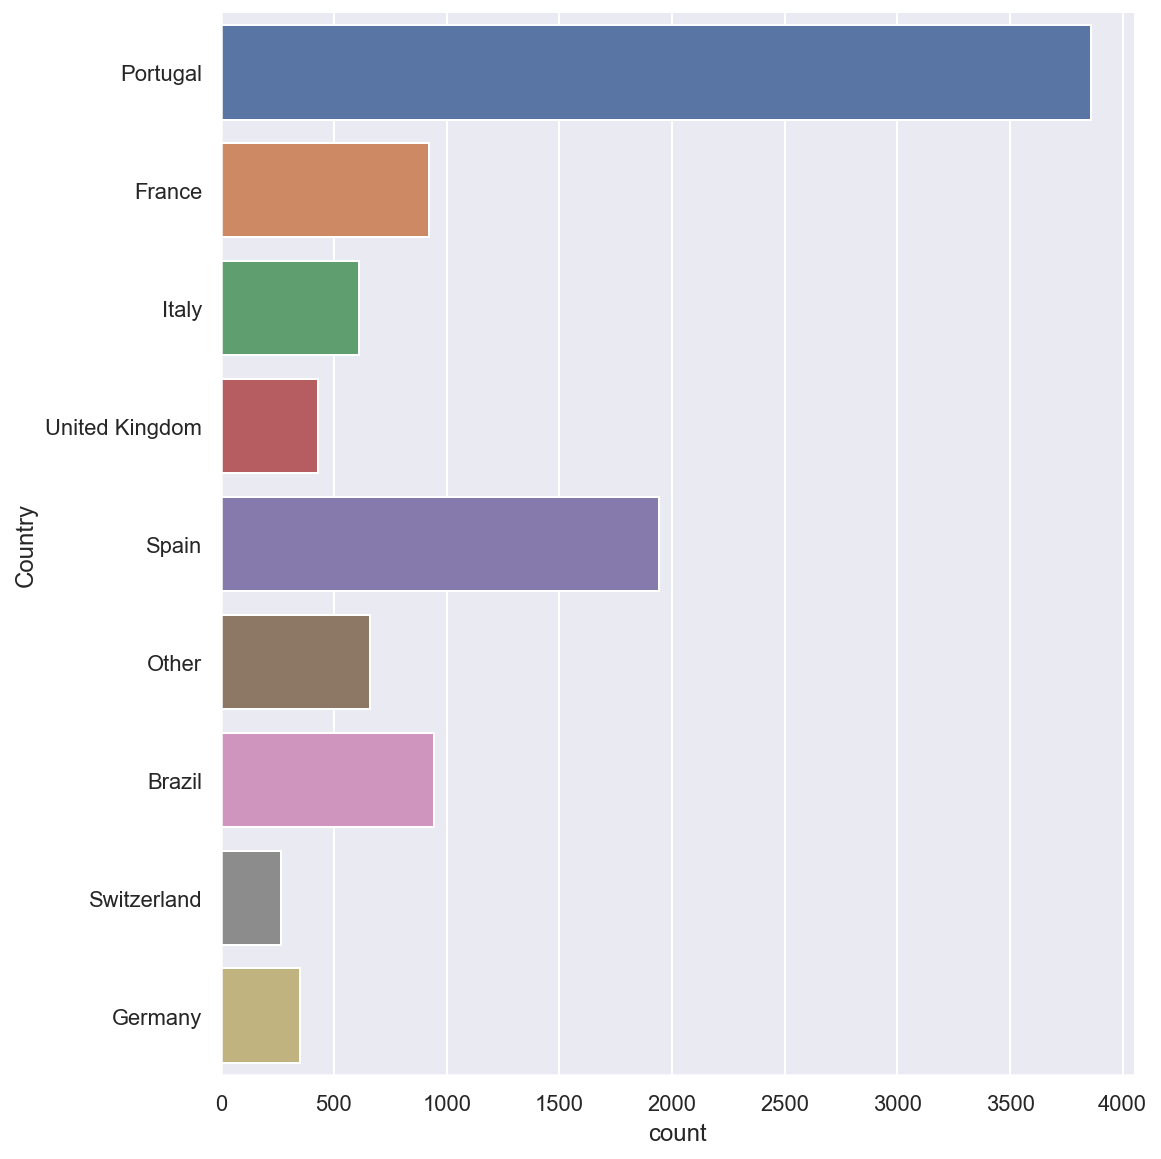

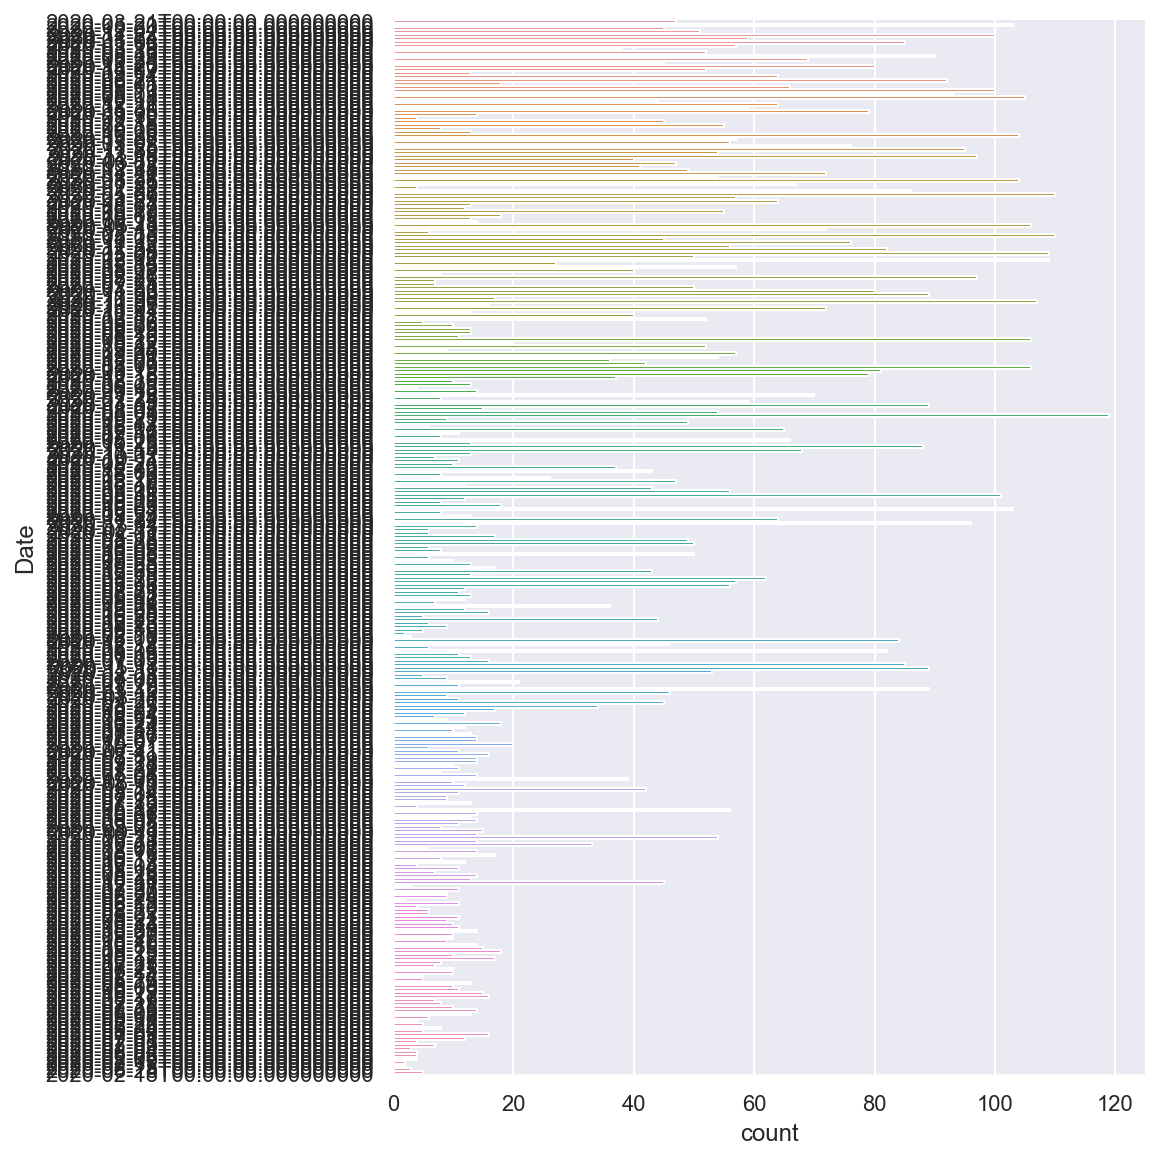

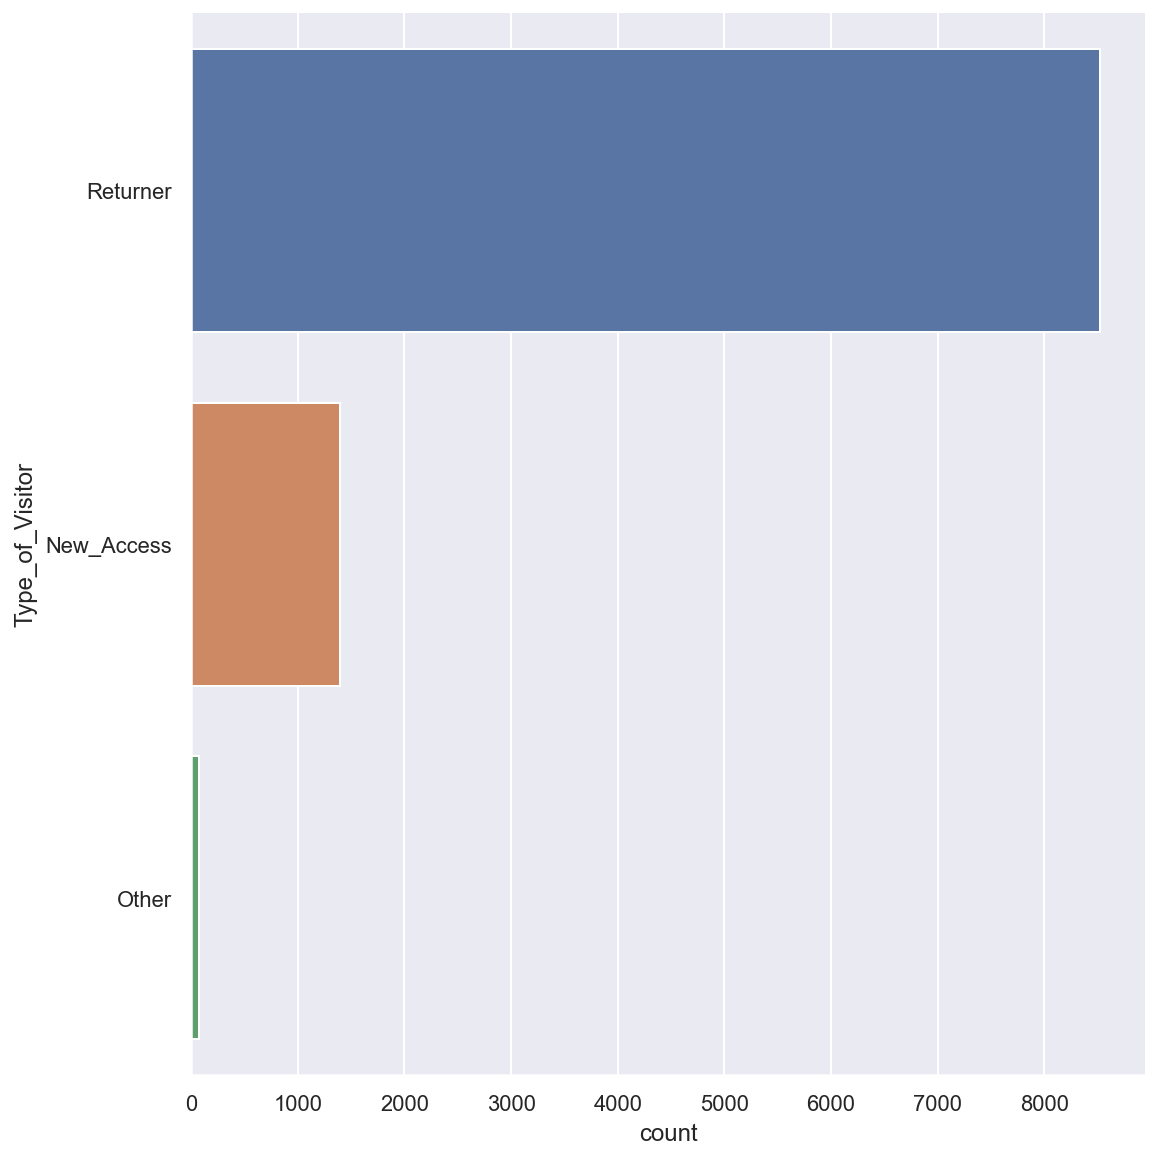

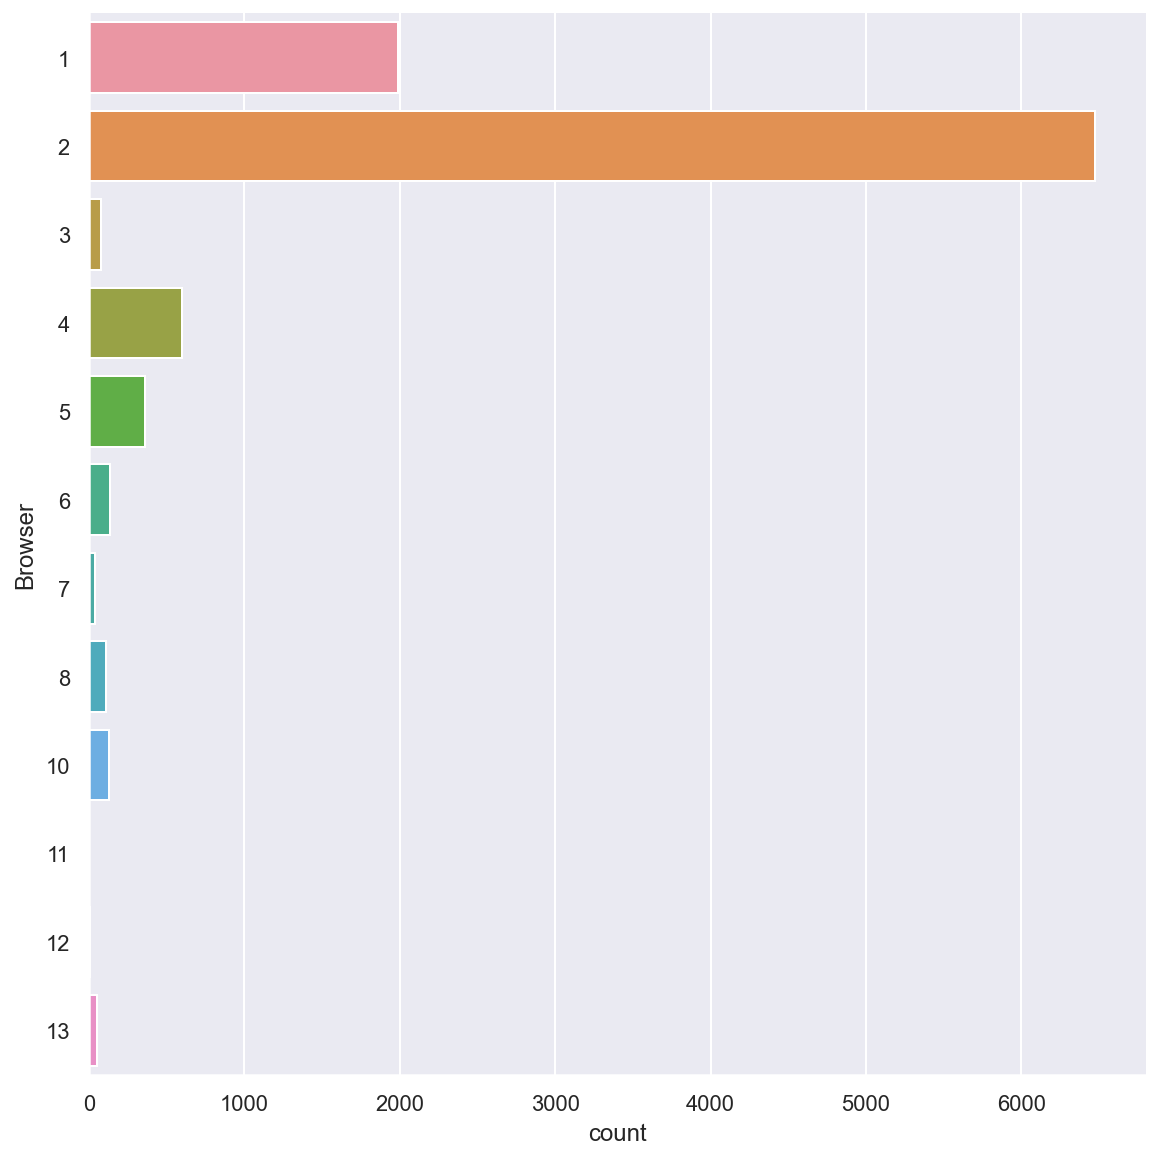

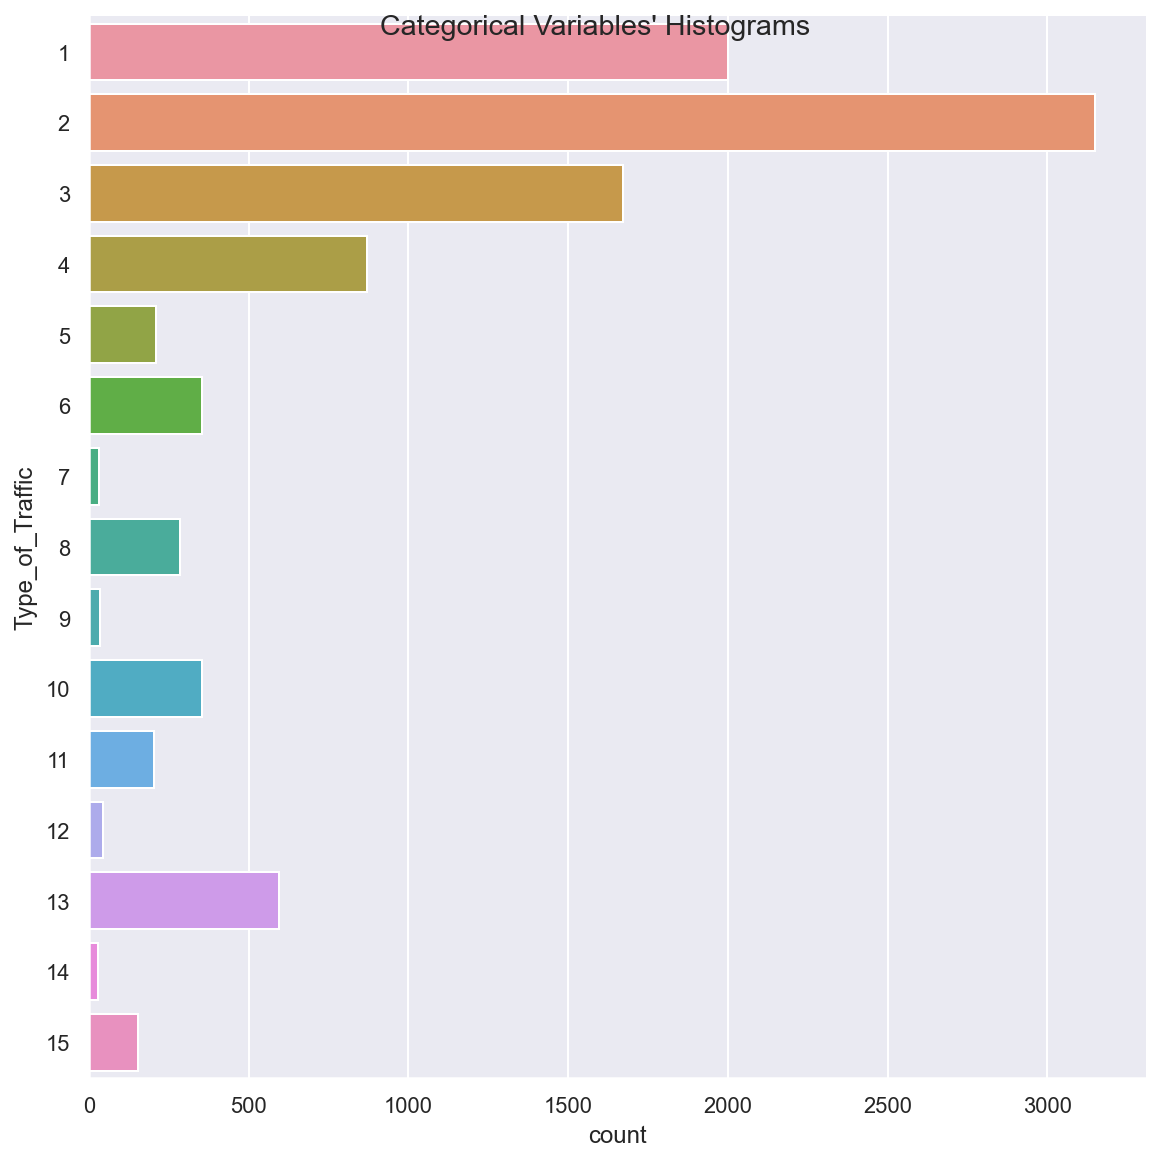

In [28]:
for i in range(len(cat_var_list)):
    sns.catplot(data=train[non_metric_features],y=cat_var_list[i],kind="count",height=8, aspect=1)
    
title = "Categorical Variables' Histograms"

plt.suptitle(title)

plt.show()

<a class="anchor" id="1.5.2"></a>

### 1.5.2 Numeric Variables - Histograms



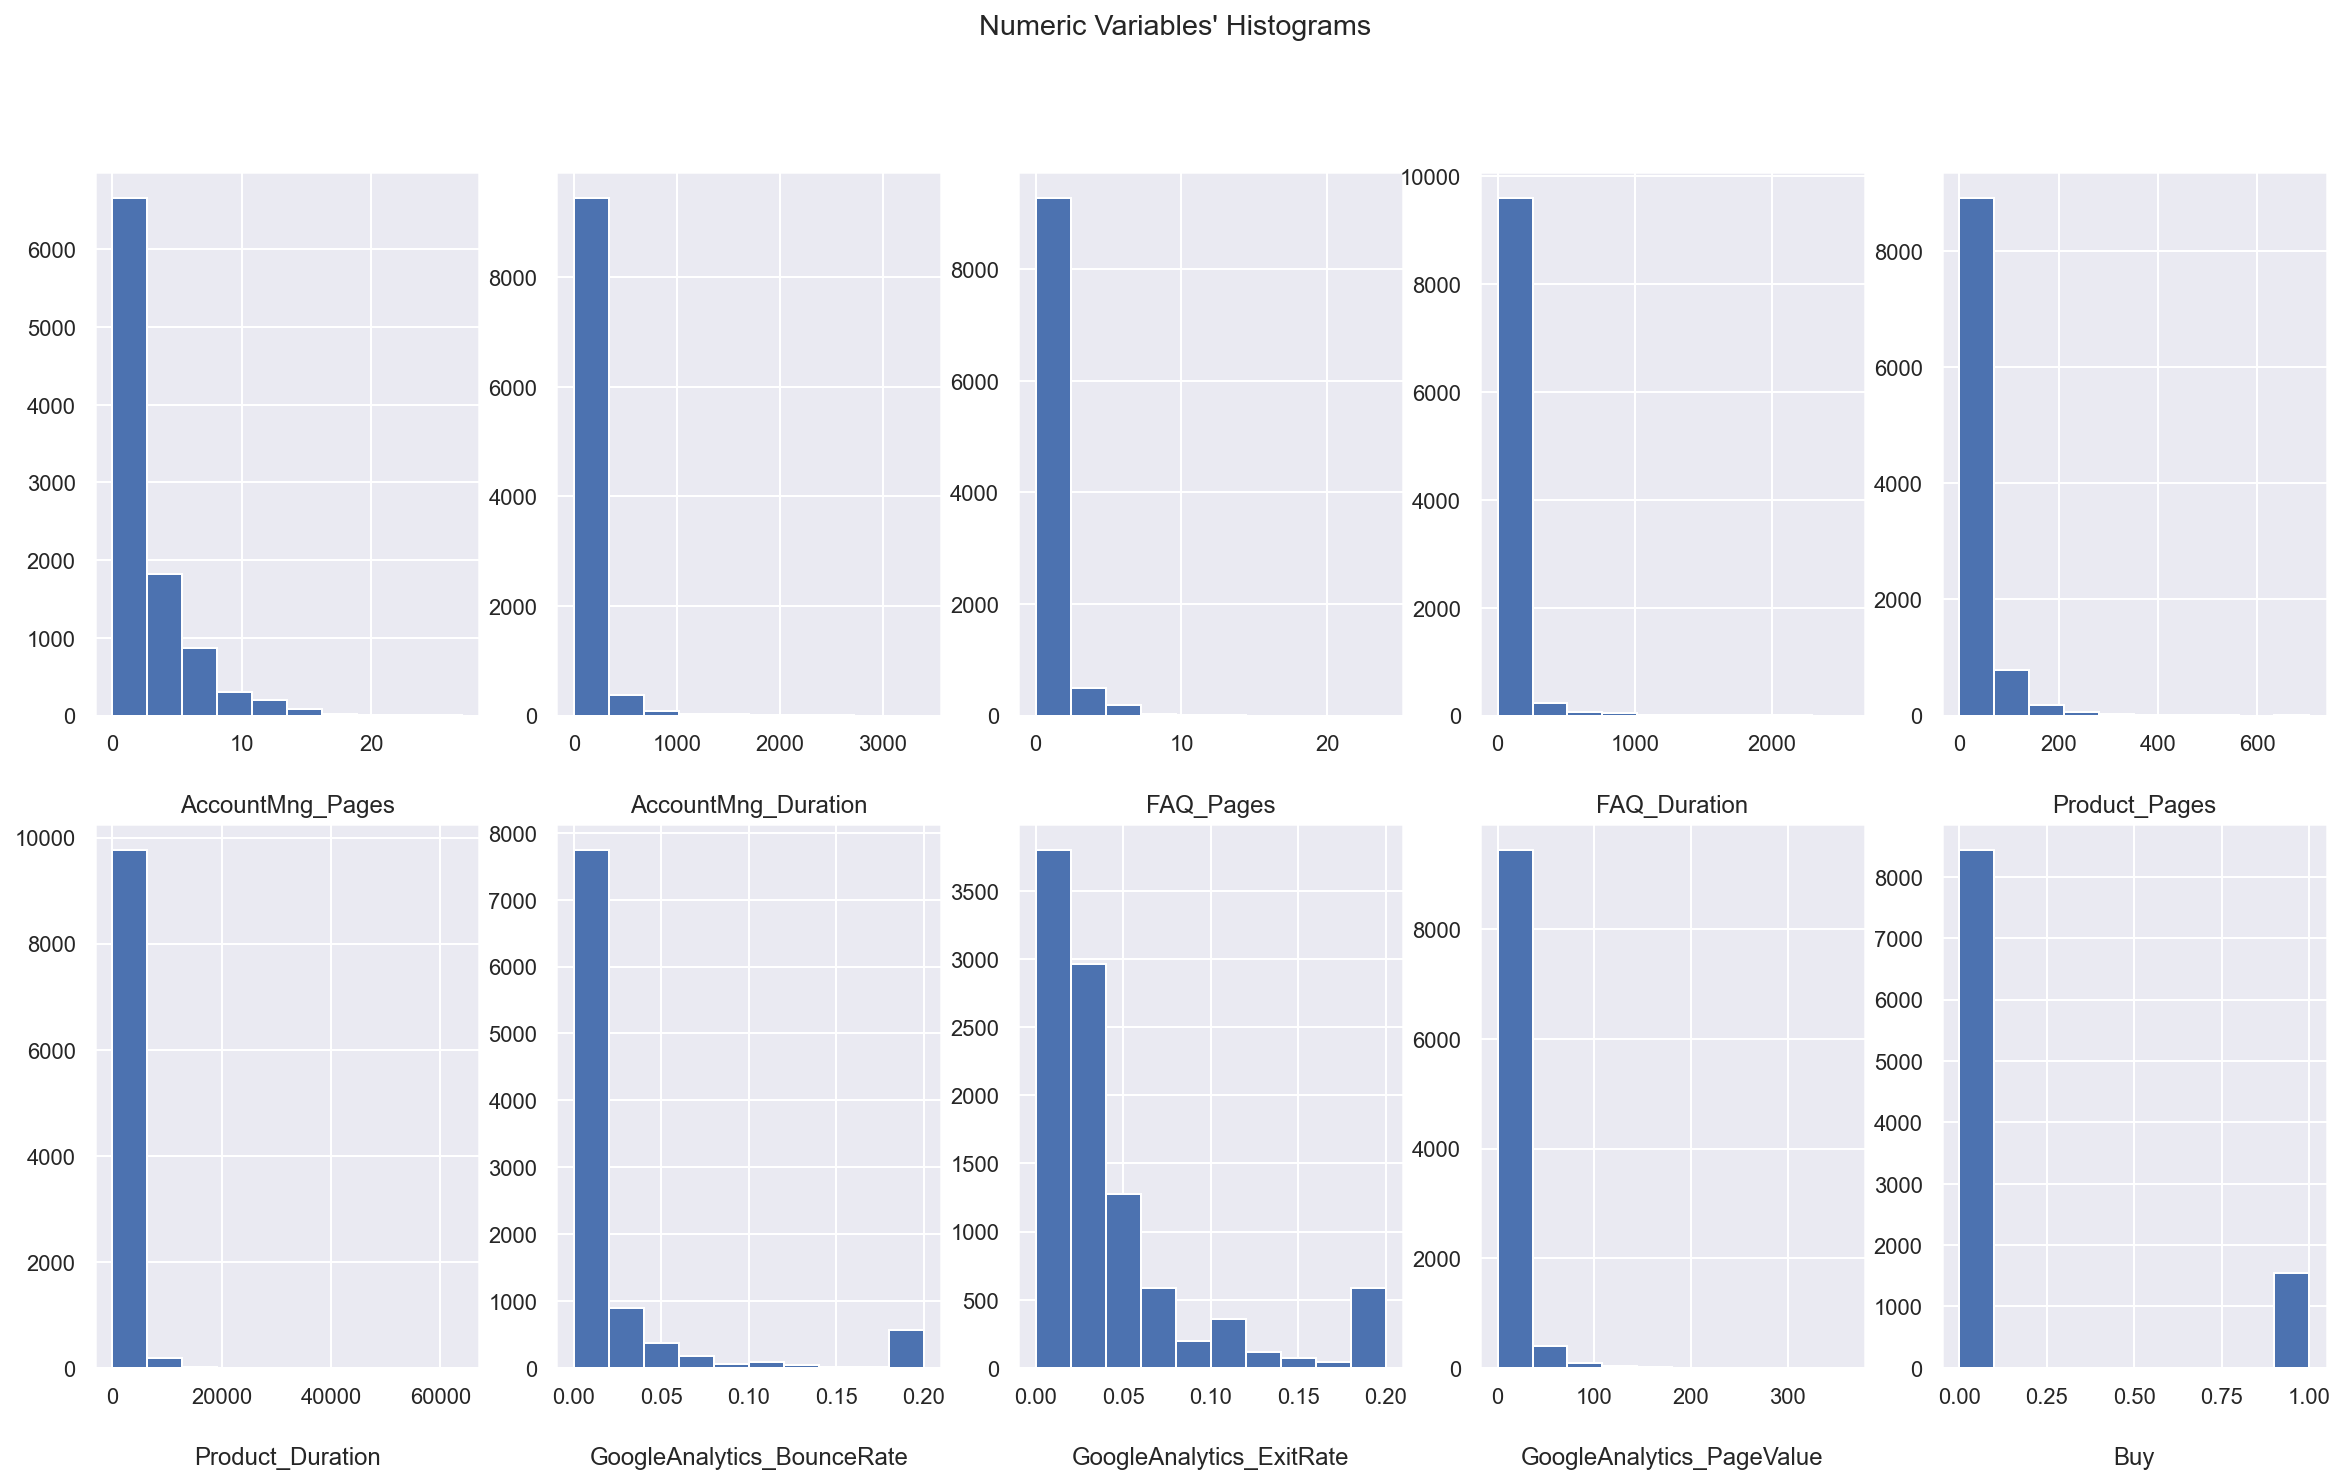

In [31]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.2)
    
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

<p> the graphes of the metric features are so bad, they don't give good visualization/ informations about the data, that must be because of the outliers(we'll check that later </p>

<a class="anchor" id="1.5.3"></a>

### 1.5.3 Numeric Variables - Boxplots



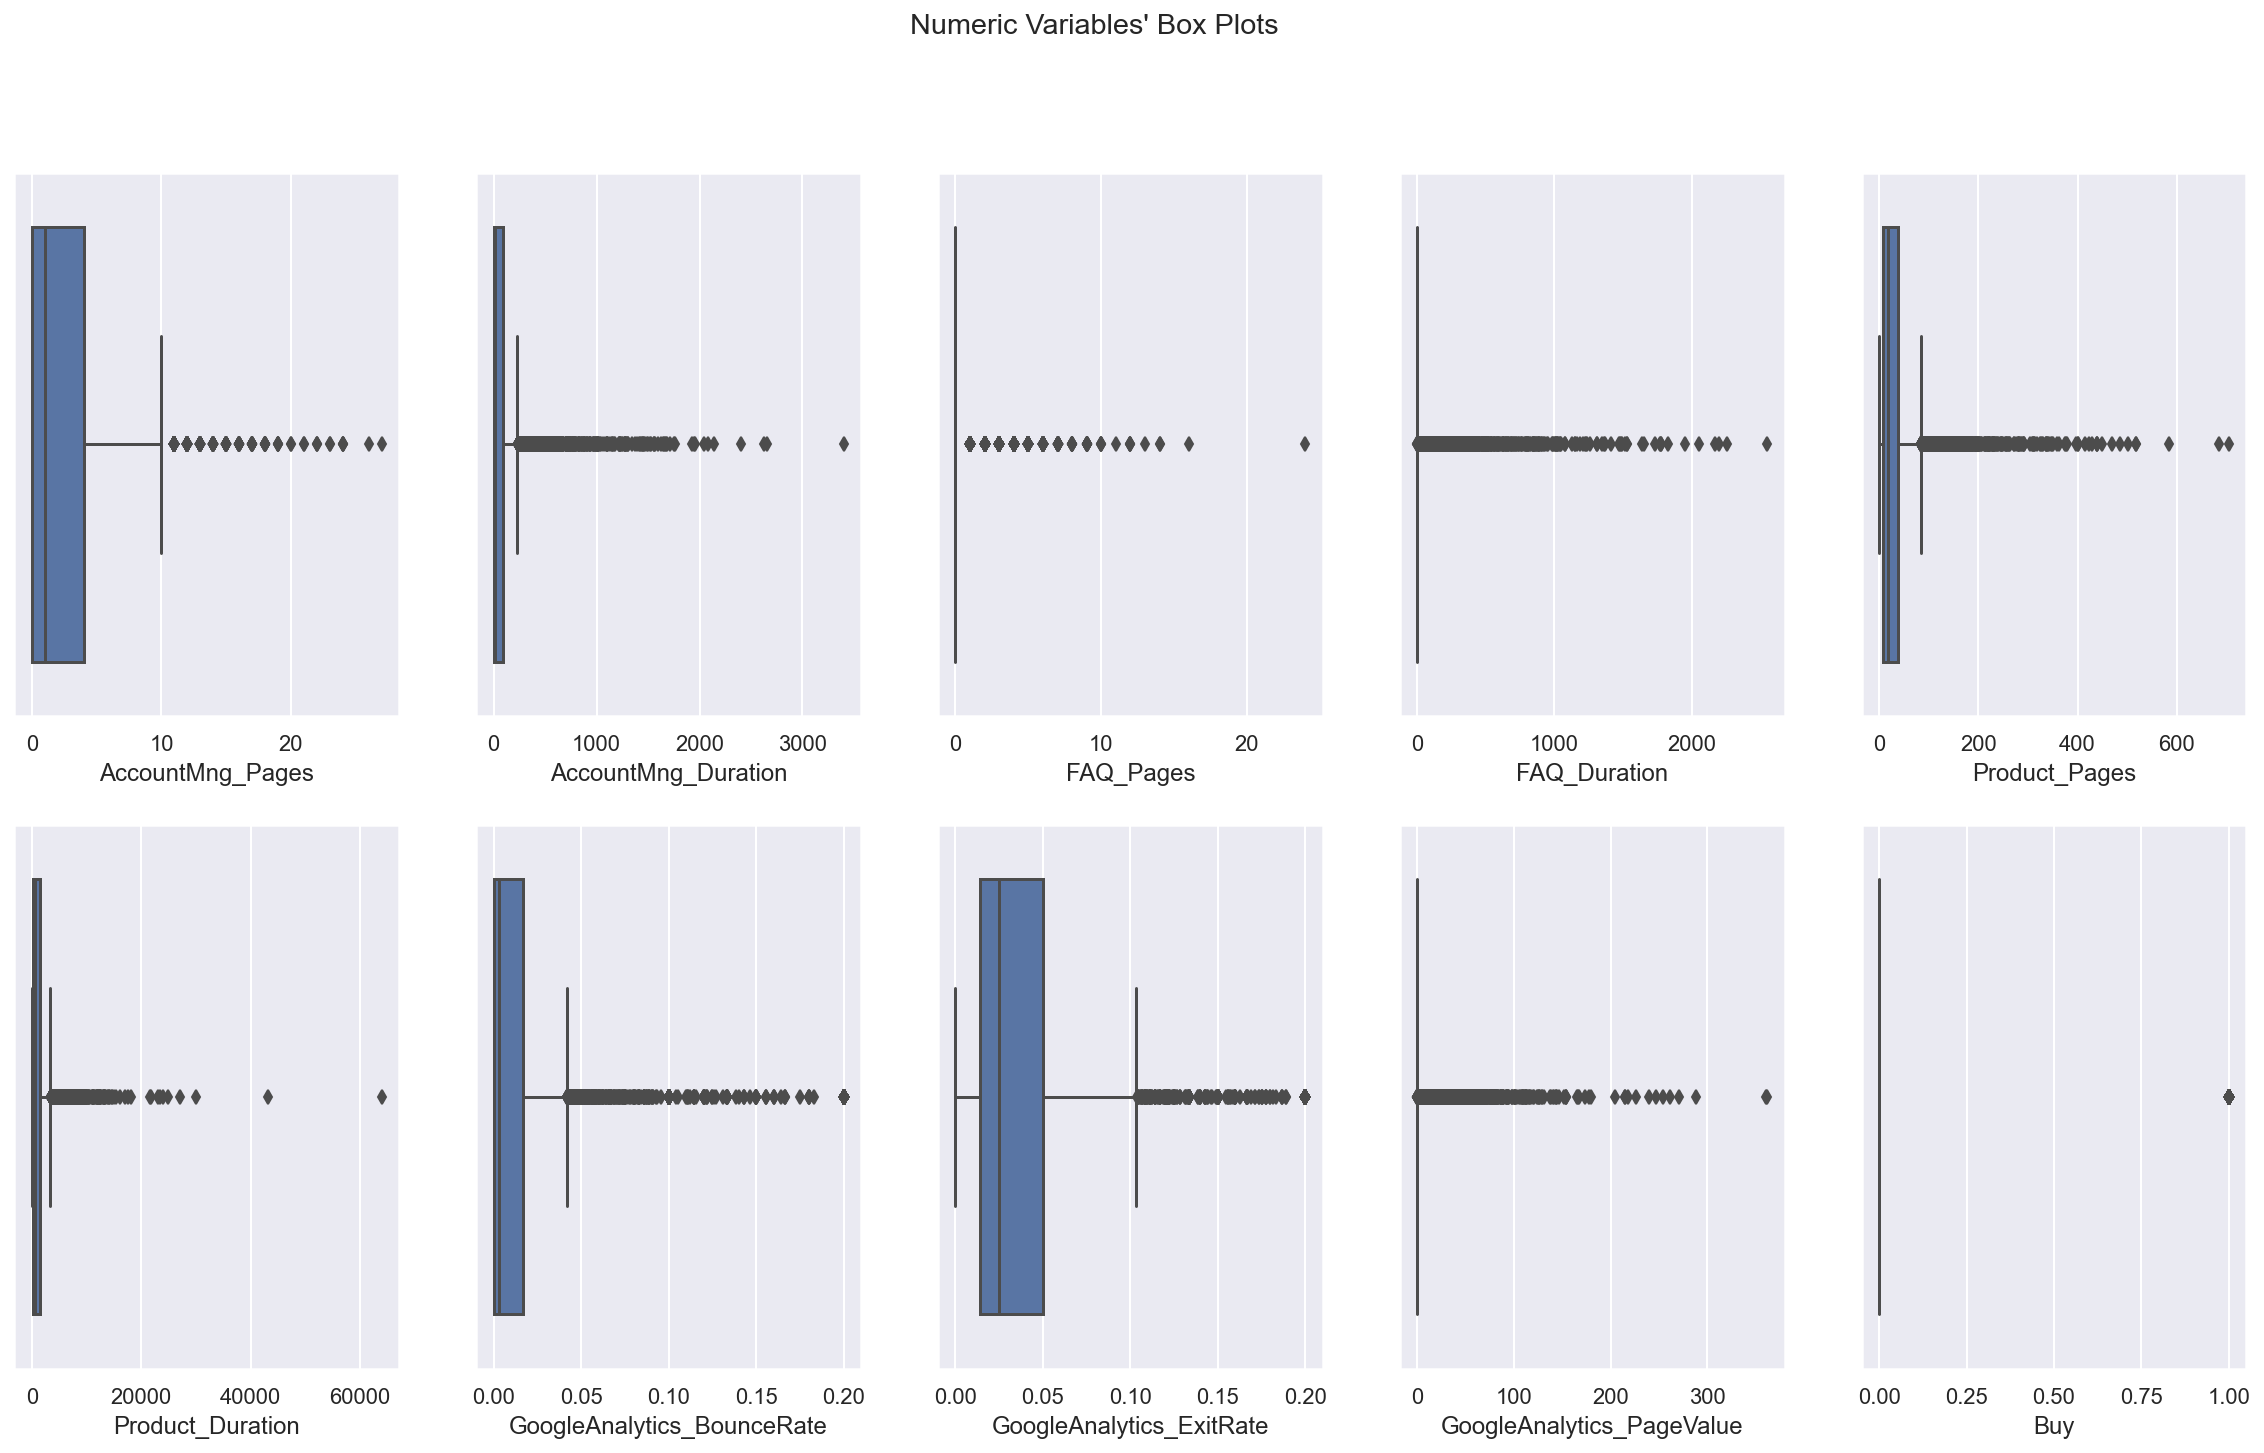

In [29]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

## 2.Data preprocessing  <a class="anchor" id="2"></a>

A initial Data Exploration shows that:<br>

-There are no missing values<br>
-There are duplicated values already fixed<br>
-There are no inconsistent values<br>
-Some data types should be fixed  
  
-There is the possibility of ouliers, we must check and remove them through:
  - Manual visual inspection
  - IQR
  - Z-score

### 2.1 Fix wrong data types  <a class="anchor" id="2.1"></a>

In [19]:
#Changing data types
train['Date'] = pd.to_datetime(train['Date'])
train['Type_of_Traffic']=  train['Type_of_Traffic'].astype(str)
train['Browser']=  train['Browser'].astype(str)
test['Date'] = pd.to_datetime(test['Date'])
test['Type_of_Traffic']=  test['Type_of_Traffic'].astype(str)
test['Browser']=  test['Browser'].astype(str)

In [20]:
train.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                               object
Country                               object
Type_of_Traffic                       object
Type_of_Visitor                       object
Buy                                    int64
dtype: object

### 2.2 Oulier removel  <a class="anchor" id="2.2"></a>

In [21]:
# first let's make a copy of the df so we can caculate the percentage of data droped later.
train1 = train.copy()
train2 = train.copy()
train3 = train.copy()

#### 2.2.1 Manuel inspection <a class="anchor" id="2.2.1"></a>

##### AccountMng_Pages

[Text(0.5, 0, '')]

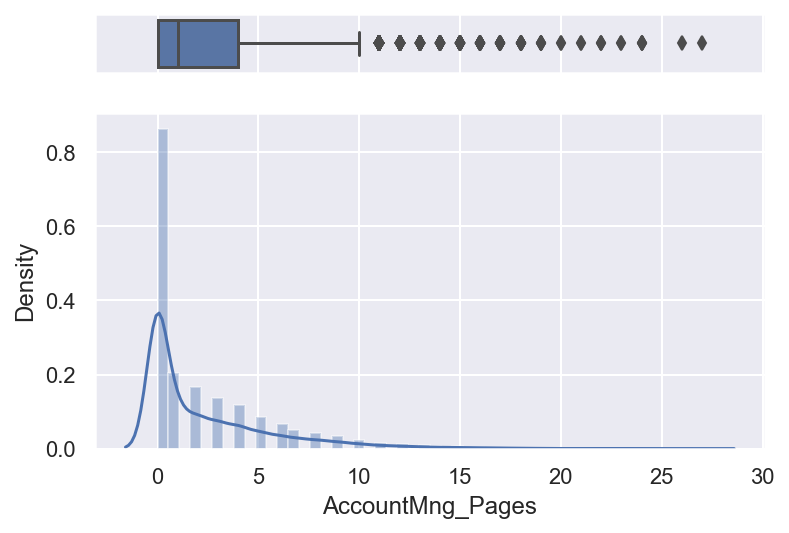

In [72]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(train["AccountMng_Pages"], ax=ax_box)
sns.distplot(train["AccountMng_Pages"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [73]:
# we have one outlier 
#DROP ABOVE  10000
data_to_drop = train1[(train1["AccountMng_Pages"]>20)]

data_to_drop_percent = ((len(data_to_drop.index))/(len(train1.index)))*100
data_to_drop_percent = "{:.2f}".format(data_to_drop_percent)

print(f"\n Number of records dropped = \t {len(data_to_drop.index)} \n")
print(f"\n Percentage of records dropped = \t{data_to_drop_percent}% \n")

train1.drop(data_to_drop.index, inplace=True)


 Number of records dropped = 	 13 


 Percentage of records dropped = 	0.13% 



#### AccountMng_Duration

[Text(0.5, 0, '')]

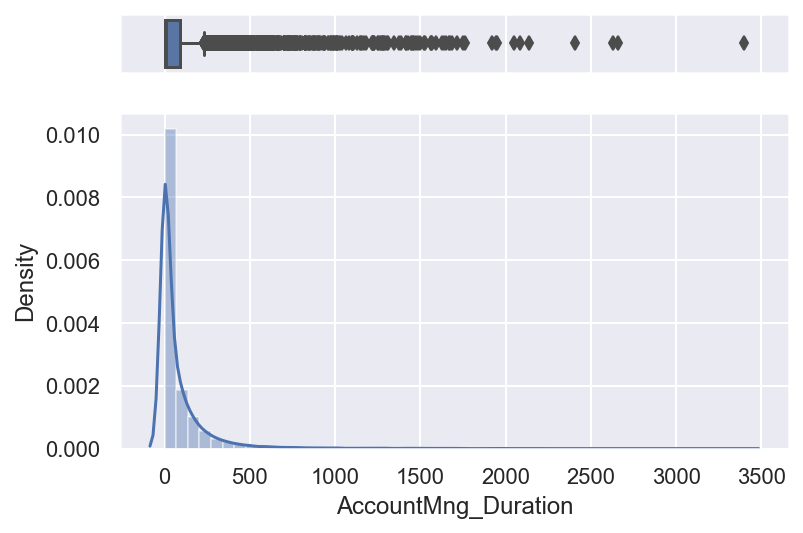

In [74]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(train["AccountMng_Duration"], ax=ax_box)
sns.distplot(train["AccountMng_Duration"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [75]:
# we have one outlier 
#DROP ABOVE  10000
data_to_drop = train1[(train1["AccountMng_Duration"]>1700)]

data_to_drop_percent = ((len(data_to_drop.index))/(len(train1.index)))*100
data_to_drop_percent = "{:.2f}".format(data_to_drop_percent)

print(f"\n Number of records dropped = \t {len(data_to_drop.index)} \n")
print(f"\n Percentage of records dropped = \t{data_to_drop_percent}% \n")

train1.drop(data_to_drop.index, inplace=True)


 Number of records dropped = 	 12 


 Percentage of records dropped = 	0.12% 



#### FAQ_Pages

[Text(0.5, 0, '')]

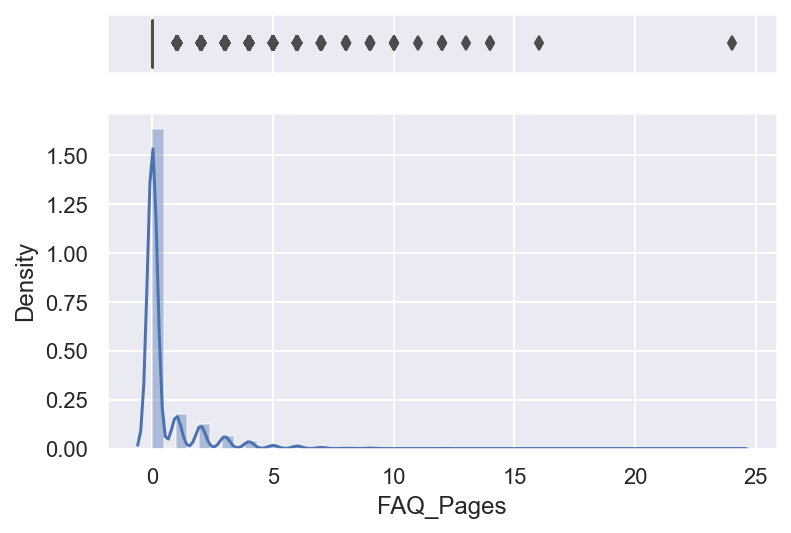

In [76]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(train["FAQ_Pages"], ax=ax_box)
sns.distplot(train["FAQ_Pages"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [77]:
# we have one outlier 
#DROP ABOVE  10000
data_to_drop = train1[(train1["FAQ_Pages"]>5)]

data_to_drop_percent = ((len(data_to_drop.index))/(len(train1.index)))*100
data_to_drop_percent = "{:.2f}".format(data_to_drop_percent)

print(f"\n Number of records dropped = \t {len(data_to_drop.index)} \n")
print(f"\n Percentage of records dropped = \t{data_to_drop_percent}% \n")

train1.drop(data_to_drop.index, inplace=True)


 Number of records dropped = 	 125 


 Percentage of records dropped = 	1.26% 



#### FAQ_Duration 

[Text(0.5, 0, '')]

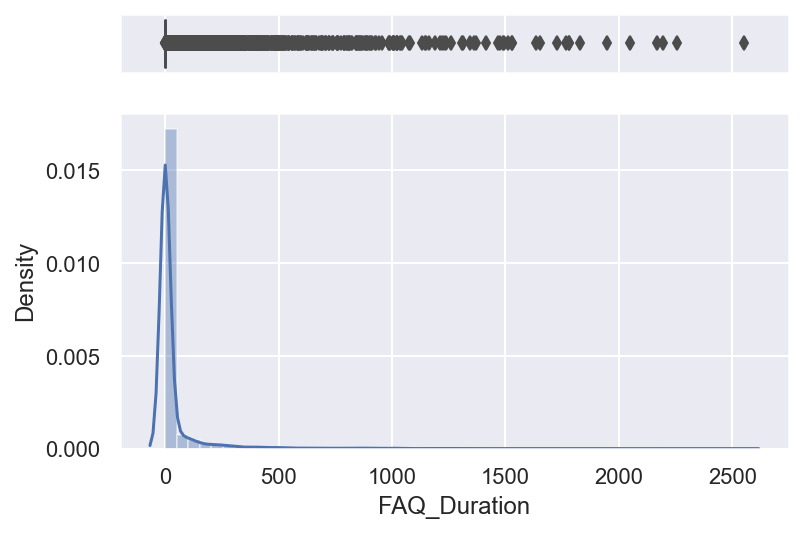

In [78]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(train["FAQ_Duration"], ax=ax_box)
sns.distplot(train["FAQ_Duration"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [79]:
# we have one outlier 
#DROP ABOVE  10000
data_to_drop = train1[(train1["FAQ_Duration"]>1500)]

data_to_drop_percent = ((len(data_to_drop.index))/(len(train1.index)))*100
data_to_drop_percent = "{:.2f}".format(data_to_drop_percent)

print(f"\n Number of records dropped = \t {len(data_to_drop.index)} \n")
print(f"\n Percentage of records dropped = \t{data_to_drop_percent}% \n")

train1.drop(data_to_drop.index, inplace=True)


 Number of records dropped = 	 11 


 Percentage of records dropped = 	0.11% 



#### Product_Pages

[Text(0.5, 0, '')]

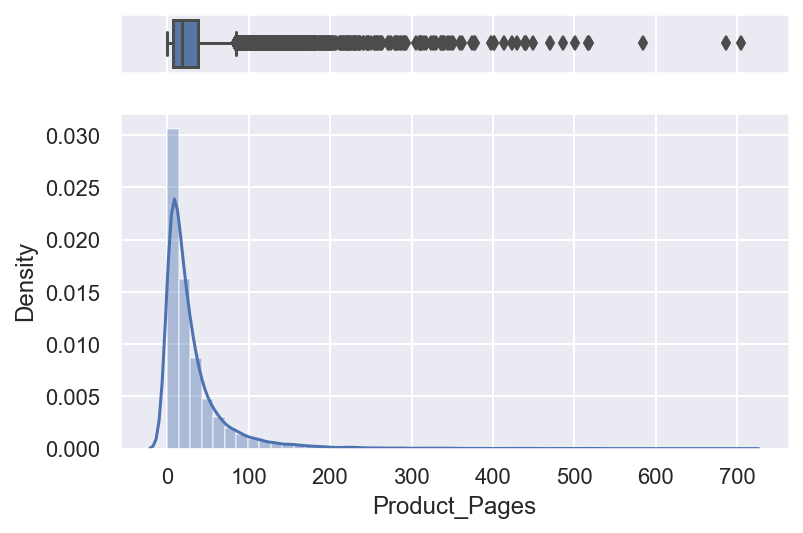

In [80]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(train["Product_Pages"], ax=ax_box)
sns.distplot(train["Product_Pages"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [81]:
# we have one outlier 
#DROP ABOVE  10000
data_to_drop = train1[(train1["Product_Pages"]>400)]

data_to_drop_percent = ((len(data_to_drop.index))/(len(train1.index)))*100
data_to_drop_percent = "{:.2f}".format(data_to_drop_percent)

print(f"\n Number of records dropped = \t {len(data_to_drop.index)} \n")
print(f"\n Percentage of records dropped = \t{data_to_drop_percent}% \n")

train1.drop(data_to_drop.index, inplace=True)


 Number of records dropped = 	 9 


 Percentage of records dropped = 	0.09% 



#### Product_Duration

[Text(0.5, 0, '')]

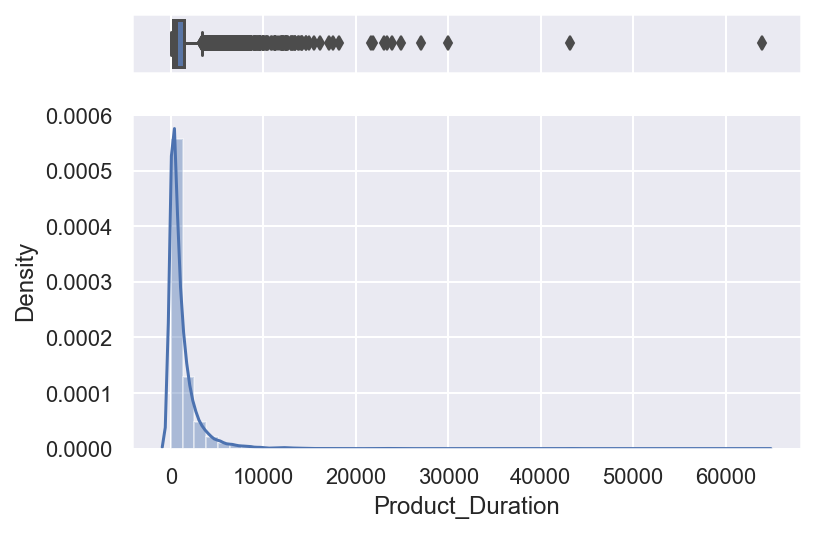

In [82]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(train["Product_Duration"], ax=ax_box)
sns.distplot(train["Product_Duration"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [83]:
# we have one outlier 
#DROP ABOVE  10000
data_to_drop = train1[(train1["Product_Duration"]>20000)]

data_to_drop_percent = ((len(data_to_drop.index))/(len(train1.index)))*100
data_to_drop_percent = "{:.2f}".format(data_to_drop_percent)

print(f"\n Number of records dropped = \t {len(data_to_drop.index)} \n")
print(f"\n Percentage of records dropped = \t{data_to_drop_percent}% \n")

train1.drop(data_to_drop.index, inplace=True)


 Number of records dropped = 	 0 


 Percentage of records dropped = 	0.00% 



#### GoogleAnalytics_BounceRate

[Text(0.5, 0, '')]

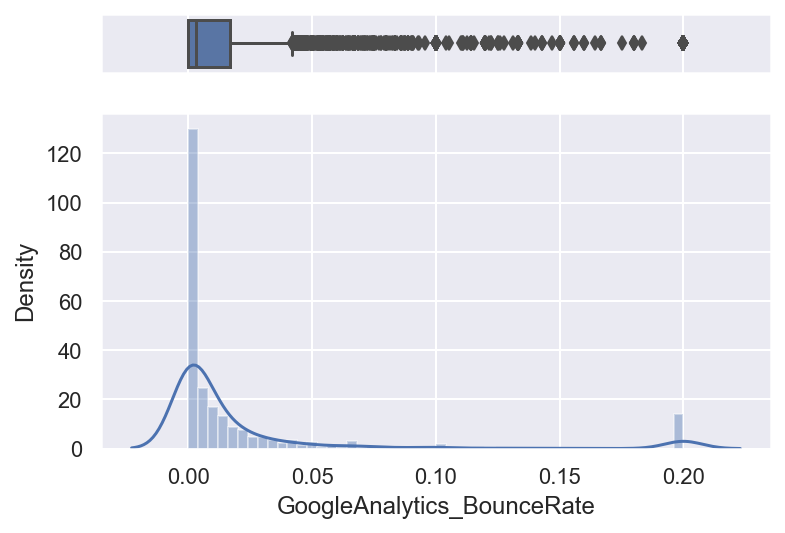

In [84]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(train["GoogleAnalytics_BounceRate"], ax=ax_box)
sns.distplot(train["GoogleAnalytics_BounceRate"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

#### GoogleAnalytics_ExitRate

[Text(0.5, 0, '')]

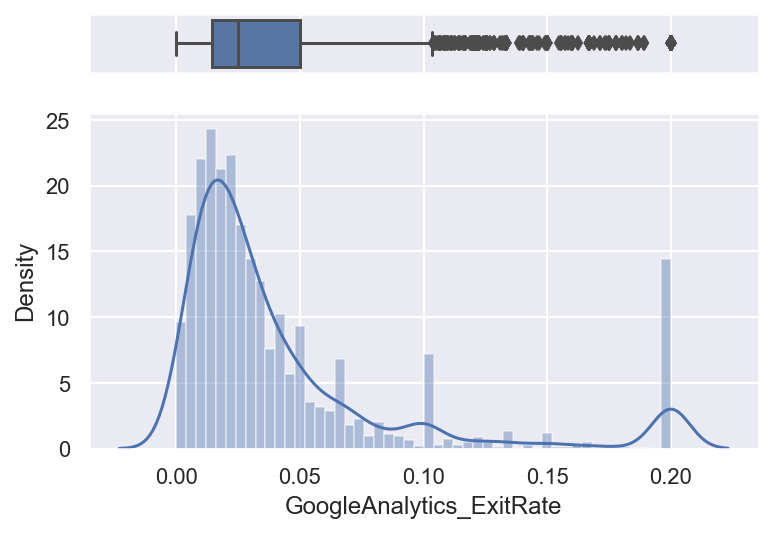

In [85]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(train["GoogleAnalytics_ExitRate"], ax=ax_box)
sns.distplot(train["GoogleAnalytics_ExitRate"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

#### GoogleAnalytics_PageValue

[Text(0.5, 0, '')]

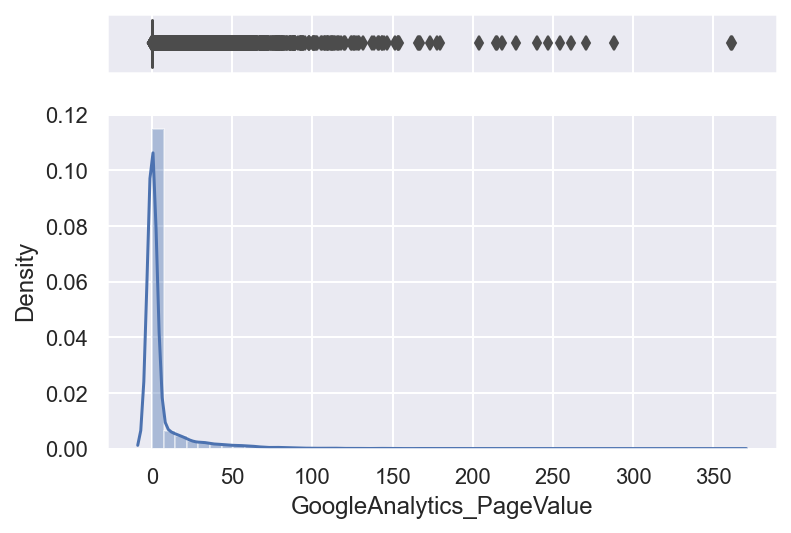

In [86]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(train["GoogleAnalytics_PageValue"], ax=ax_box)
sns.distplot(train["GoogleAnalytics_PageValue"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [87]:
# we have one outlier 
#DROP ABOVE  10000
data_to_drop = train1[(train1["GoogleAnalytics_PageValue"]>250)]

data_to_drop_percent = ((len(data_to_drop.index))/(len(train1.index)))*100
data_to_drop_percent = "{:.2f}".format(data_to_drop_percent)

print(f"\n Number of records dropped = \t {len(data_to_drop.index)} \n")
print(f"\n Percentage of records dropped = \t{data_to_drop_percent}% \n")

train1.drop(data_to_drop.index, inplace=True)


 Number of records dropped = 	 6 


 Percentage of records dropped = 	0.06% 



In [88]:
print('Percentage of data kept after removing outliers:', np.round(train1.shape[0] / train.shape[0], 4))

Percentage of data kept after removing outliers: 0.9824


#### 2.2.2 Z-score <a class="anchor" id="2.2.2"></a>

In [39]:
df_new = train.copy()
# Z_score outlier removel 
from scipy.stats import zscore
# from scipy  import stats
from scipy import stats
z_scores = stats.zscore(train[metric_features])
# calculate z-scores of `df`
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 7).all(axis=1)
new_df = df_new[filtered_entries]

In [40]:
print('Percentage of data kept after removing outliers:', np.round(new_df.shape[0] / train.shape[0], 4))

Percentage of data kept after removing outliers: 0.9859


#### 2.2.3 IQR <a class="anchor" id="2.2.3"></a>

In [41]:
q25 = train.quantile(.25)
q75 = train.quantile(.75)
iqr = (q75 - q25)



upper_lim = q75 +5 * iqr
lower_lim = q25 - 5 * iqr



filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(train[metric].between(llim, ulim, inclusive=True))


filters2 = pd.Series(np.all(filters2, 0), index=train.index)
df_2 = train[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / train.shape[0], 4))

Percentage of data kept after removing outliers: 0.5562


### 2.3 Feature engenniring  <a class="anchor" id="2.3"></a>

In [21]:
train1 = train.copy()
test1 = test.copy

In [22]:
# train['Season'] = train['Date'] %12 // 3 + 1
date = train1.Date.dt.month * 100 + train1.Date.dt.day
train1['season'] = (pd.cut(date, [0, 321, 620, 922, 1220, 1300],
      labels = ['winter', 'spring', 'summer', 'autumn', 'winter '])
   .str.strip()
)

In [23]:
date = test.Date.dt.month * 100 + test.Date.dt.day
test['season'] = (pd.cut(date, [0, 321, 620, 922, 1220, 1300],
      labels = ['winter', 'spring', 'summer', 'autumn', 'winter '])
   .str.strip()
)

In [24]:
train1 =  train1.drop(columns=['Date'])

In [25]:
test =  test.drop(columns=['Date'])

In [26]:
train1.head()

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
102863333                 0                  0.0          0           0.0   
103117814                 0                  0.0          0           0.0   
103201891                 0                  0.0          0           0.0   
103226087                 0                  0.0          0           0.0   
103234445                 0                  0.0          2         386.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
102863333              3           64.0000                      0.0000   
103117814             23          684.5000                      0.0217   
103201891              8           95.0000                      0.0250   
103226087              9          608.7500                      0.0000   
103234445             36         1609.9397                      0.0000   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  \
Access_ID                                                                 
102863333                    0.0667                     0.0000   MacOSX   
103117814                    0.0449                     0.0000  Windows   
103201891                    0.0583                     0.0000  Windows   
103226087                    0.0250                    42.4225  Windows   
103234445                    0.0093                    12.5033  Windows   

          Browser         Country Type_of_Traffic Type_of_Visitor  Buy  season  
Access_ID                                                                       
102863333       2        Portugal               1        Returner    0  winter  
103117814       2          France               6        Returner    0  spring  
103201891       4           Italy               1        Returner    0  autumn  
103226087       2  United Kingdom               2        Returner    1  winter  
103234445       2           Spain               3        Returner    1  autumn

In [27]:
test.head(2)

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
798519314                 0                  0.0          0           0.0   
798663101                 2                 37.5          0           0.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
798519314             86         5332.5478                      0.0139   
798663101             55         1420.4725                      0.0012   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  \
Access_ID                                                                 
798519314                    0.0654                        0.0  Windows   
798663101                    0.0058                        0.0  Android   

          Browser Country Type_of_Traffic Type_of_Visitor  season  
Access_ID                                                          
798519314       2  Brazil               1        Returner  summer  
798663101       1   Spain               4        Returner  spring

### 3.Input Variables and Target Split <a class="anchor" id="3"></a>

In [28]:
train.shape

(9985, 16)

In [29]:
train1.shape

(9985, 16)

In [30]:
target = train1["Buy"]
target

Access_ID
102863333    0
103117814    0
103201891    0
103226087    1
103234445    1
            ..
798279589    0
798314158    0
798339820    0
798371242    0
798444008    0
Name: Buy, Length: 9985, dtype: int64

In [31]:
train1_1 = train1.copy()
train1 = train1.loc[:, train1.columns != 'Buy']
train1.head(3)

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
102863333                 0                  0.0          0           0.0   
103117814                 0                  0.0          0           0.0   
103201891                 0                  0.0          0           0.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
102863333              3              64.0                      0.0000   
103117814             23             684.5                      0.0217   
103201891              8              95.0                      0.0250   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  \
Access_ID                                                                 
102863333                    0.0667                        0.0   MacOSX   
103117814                    0.0449                        0.0  Windows   
103201891                    0.0583                        0.0  Windows   

          Browser   Country Type_of_Traffic Type_of_Visitor  season  
Access_ID                                                            
102863333       2  Portugal               1        Returner  winter  
103117814       2    France               6        Returner  spring  
103201891       4     Italy               1        Returner  autumn

### 4.Encoding - OneHotEncoder <a class="anchor" id="4"></a>

In [32]:
#Define final metric and non-metric features
non_metric_features = ["OS", "Country","season", "Type_of_Visitor", "Browser", "Type_of_Traffic"]
metric_features = train1.columns.drop(non_metric_features).to_list()
# metric_features = train.columns.drop(non_metric_features)

In [33]:
train1[non_metric_features].head()

OS         Country  season Type_of_Visitor Browser  \
Access_ID                                                            
102863333   MacOSX        Portugal  winter        Returner       2   
103117814  Windows          France  spring        Returner       2   
103201891  Windows           Italy  autumn        Returner       4   
103226087  Windows  United Kingdom  winter        Returner       2   
103234445  Windows           Spain  autumn        Returner       2   

          Type_of_Traffic  
Access_ID                  
102863333               1  
103117814               6  
103201891               1  
103226087               2  
103234445               3

In [34]:
train1[non_metric_features].dtypes

OS                 object
Country            object
season             object
Type_of_Visitor    object
Browser            object
Type_of_Traffic    object
dtype: object

In [35]:
# Perform the encoding with One-Hot-Encoder in the train dataset
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(np.array(train1[non_metric_features]))
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=train1.index, columns=ohc_feat_names)  
ohc_df

x0_Chrome OS  x0_Fedora  x0_MacOSX  x0_Other  x0_Ubuntu  \
Access_ID                                                            
102863333           0.0        0.0        1.0       0.0        0.0   
103117814           0.0        0.0        0.0       0.0        0.0   
103201891           0.0        0.0        0.0       0.0        0.0   
103226087           0.0        0.0        0.0       0.0        0.0   
103234445           0.0        0.0        0.0       0.0        0.0   
...                 ...        ...        ...       ...        ...   
798279589           0.0        0.0        1.0       0.0        0.0   
798314158           0.0        0.0        0.0       0.0        0.0   
798339820           0.0        0.0        1.0       0.0        0.0   
798371242           0.0        0.0        0.0       0.0        0.0   
798444008           0.0        0.0        0.0       0.0        0.0   

           x0_Windows  x0_iOS  x1_France  x1_Germany  x1_Italy  ...  x5_14  \
Access_ID                                                       ...          
102863333         0.0     0.0        0.0         0.0       0.0  ...    0.0   
103117814         1.0     0.0        1.0         0.0       0.0  ...    0.0   
103201891         1.0     0.0        0.0         0.0       1.0  ...    0.0   
103226087         1.0     0.0        0.0         0.0       0.0  ...    0.0   
103234445         1.0     0.0        0.0         0.0       0.0  ...    0.0   
...               ...     ...        ...         ...       ...  ...    ...   
798279589         0.0     0.0        0.0         0.0       0.0  ...    1.0   
798314158         1.0     0.0        0.0         0.0       0.0  ...    0.0   
798339820         0.0     0.0        1.0         0.0       0.0  ...    0.0   
798371242         1.0     0.0        0.0         0.0       1.0  ...    0.0   
798444008         1.0     0.0        0.0         0.0       0.0  ...    0.0   

           x5_15  x5_2  x5_3  x5_4  x5_5  x5_6  x5_7  x5_8  x5_9  
Access_ID                                                         
102863333    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
103117814    0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
103201891    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
103226087    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
103234445    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...  
798279589    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
798314158    0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  
798339820    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
798371242    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
798444008    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[9985 rows x 45 columns]

In [36]:
# Perform the encoding with One-Hot-Encoder for test dataset
ohc_test = OneHotEncoder(sparse=False, drop="first")
ohc_feat_test = ohc_test.fit_transform(np.array(test[non_metric_features]))
ohc_feat_names_test = ohc_test.get_feature_names()
ohc_df_test = pd.DataFrame(ohc_feat_test, index=test.index, columns=ohc_feat_names_test)  
ohc_df_test

x0_Chrome OS  x0_Fedora  x0_MacOSX  x0_Other  x0_Ubuntu  \
Access_ID                                                            
798519314           0.0        0.0        0.0       0.0        0.0   
798663101           0.0        0.0        0.0       0.0        0.0   
798663221           0.0        0.0        0.0       0.0        0.0   
798760918           0.0        0.0        0.0       0.0        0.0   
798856982           0.0        0.0        0.0       0.0        0.0   
...                 ...        ...        ...       ...        ...   
962042726           0.0        0.0        0.0       0.0        0.0   
962063064           0.0        0.0        1.0       0.0        0.0   
962147749           0.0        0.0        0.0       0.0        0.0   
962182167           0.0        0.0        0.0       0.0        0.0   
962218682           0.0        0.0        1.0       0.0        0.0   

           x0_Windows  x0_iOS  x1_France  x1_Germany  x1_Italy  ...  x5_14  \
Access_ID                                                       ...          
798519314         1.0     0.0        0.0         0.0       0.0  ...    0.0   
798663101         0.0     0.0        0.0         0.0       0.0  ...    0.0   
798663221         1.0     0.0        0.0         0.0       0.0  ...    0.0   
798760918         1.0     0.0        0.0         0.0       0.0  ...    0.0   
798856982         1.0     0.0        0.0         0.0       0.0  ...    0.0   
...               ...     ...        ...         ...       ...  ...    ...   
962042726         1.0     0.0        0.0         0.0       0.0  ...    0.0   
962063064         0.0     0.0        0.0         0.0       0.0  ...    0.0   
962147749         1.0     0.0        0.0         0.0       0.0  ...    0.0   
962182167         1.0     0.0        0.0         0.0       0.0  ...    0.0   
962218682         0.0     0.0        0.0         0.0       0.0  ...    0.0   

           x5_15  x5_2  x5_3  x5_4  x5_5  x5_6  x5_7  x5_8  x5_9  
Access_ID                                                         
798519314    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
798663101    0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
798663221    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
798760918    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
798856982    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...  
962042726    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
962063064    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
962147749    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
962182167    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
962218682    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[2300 rows x 46 columns]

In [37]:
# Concatenate the encoded variables with the train1 dataset
train1 = pd.concat([train1.drop(columns=non_metric_features), ohc_df], axis=1)

In [38]:
# Concatenate the encoded variables with the test dataset
test = pd.concat([test.drop(columns=non_metric_features), ohc_df_test], axis=1)
test.head()

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
798519314                 0                 0.00          0           0.0   
798663101                 2                37.50          0           0.0   
798663221                 0                 0.00          0           0.0   
798760918                 0                 0.00          0           0.0   
798856982                12               225.25          1           0.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
798519314             86         5332.5478                      0.0139   
798663101             55         1420.4725                      0.0012   
798663221             36          788.5000                      0.0000   
798760918              2          689.0000                      0.0000   
798856982            129         3367.0413                      0.0014   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue  x0_Chrome OS  \
Access_ID                                                                      
798519314                    0.0654                     0.0000           0.0   
798663101                    0.0058                     0.0000           0.0   
798663221                    0.0250                     0.0000           0.0   
798760918                    0.1000                     0.0000           0.0   
798856982                    0.0185                     1.0353           0.0   

           ...  x5_14  x5_15  x5_2  x5_3  x5_4  x5_5  x5_6  x5_7  x5_8  x5_9  
Access_ID  ...                                                                
798519314  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
798663101  ...    0.0    0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
798663221  ...    0.0    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
798760918  ...    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
798856982  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 55 columns]

In [39]:
train1.head(4)

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
102863333                 0                  0.0          0           0.0   
103117814                 0                  0.0          0           0.0   
103201891                 0                  0.0          0           0.0   
103226087                 0                  0.0          0           0.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
102863333              3             64.00                      0.0000   
103117814             23            684.50                      0.0217   
103201891              8             95.00                      0.0250   
103226087              9            608.75                      0.0000   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue  x0_Chrome OS  \
Access_ID                                                                      
102863333                    0.0667                     0.0000           0.0   
103117814                    0.0449                     0.0000           0.0   
103201891                    0.0583                     0.0000           0.0   
103226087                    0.0250                    42.4225           0.0   

           ...  x5_14  x5_15  x5_2  x5_3  x5_4  x5_5  x5_6  x5_7  x5_8  x5_9  
Access_ID  ...                                                                
102863333  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
103117814  ...    0.0    0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
103201891  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
103226087  ...    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[4 rows x 54 columns]

In [40]:
test.shape

(2300, 55)

### 5.Standardization <a class="anchor" id="5"></a>

#### 5.1 Robust Scaler <a class="anchor" id="5.1"></a>

In [41]:
# Apply the RobustScaller
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_feat = scaler.fit_transform(train1[metric_features])
print(scaled_feat)


[[-0.25       -0.08642809  0.         ... -0.18562874  1.16526611
   0.        ]
 [-0.25       -0.08642809  0.         ...  1.11377246  0.55462185
   0.        ]
 [-0.25       -0.08642809  0.         ...  1.31137725  0.92997199
   0.        ]
 ...
 [-0.25       -0.08642809  0.         ...  0.2754491   0.75070028
   0.        ]
 [-0.25       -0.08642809  0.         ...  1.16766467  0.31372549
   0.        ]
 [-0.25       -0.08642809  0.         ...  0.33532934  0.19047619
   4.2803    ]]


In [42]:
train1[metric_features] = scaled_feat
train1.head()

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
102863333             -0.25            -0.086428        0.0           0.0   
103117814             -0.25            -0.086428        0.0           0.0   
103201891             -0.25            -0.086428        0.0           0.0   
103226087             -0.25            -0.086428        0.0           0.0   
103234445             -0.25            -0.086428        2.0         386.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
102863333      -0.483871         -0.416389                   -0.185629   
103117814       0.161290          0.065643                    1.113772   
103201891      -0.322581         -0.392307                    1.311377   
103226087      -0.290323          0.006797                   -0.185629   
103234445       0.580645          0.784566                   -0.185629   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue  x0_Chrome OS  \
Access_ID                                                                      
102863333                  1.165266                     0.0000           0.0   
103117814                  0.554622                     0.0000           0.0   
103201891                  0.929972                     0.0000           0.0   
103226087                 -0.002801                    42.4225           0.0   
103234445                 -0.442577                    12.5033           0.0   

           ...  x5_14  x5_15  x5_2  x5_3  x5_4  x5_5  x5_6  x5_7  x5_8  x5_9  
Access_ID  ...                                                                
102863333  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
103117814  ...    0.0    0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
103201891  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
103226087  ...    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
103234445  ...    0.0    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 54 columns]

In [43]:
# Checking mean and variance of standardized variables
train1[metric_features].describe().round(2)

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
count           9985.00              9985.00    9985.00       9985.00   
mean               0.33                 0.79       0.51         34.61   
std                0.84                 1.94       1.28        139.89   
min               -0.25                -0.09       0.00          0.00   
25%               -0.25                -0.09       0.00          0.00   
50%                0.00                 0.00       0.00          0.00   
75%                0.75                 0.91       0.00          0.00   
max                6.50                36.63      24.00       2549.38   

       Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
count        9985.00           9985.00                     9985.00   
mean            0.44              0.47                        1.14   
std             1.44              1.52                        2.90   
min            -0.58             -0.47                       -0.19   
25%            -0.35             -0.32                       -0.19   
50%             0.00              0.00                        0.00   
75%             0.65              0.68                        0.81   
max            22.16             49.23                       11.79   

       GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue  
count                   9985.00                    9985.00  
mean                       0.50                       5.97  
std                        1.36                      18.77  
min                       -0.70                       0.00  
25%                       -0.30                       0.00  
50%                        0.00                       0.00  
75%                        0.70                       0.00  
max                        4.90                     361.76

In [44]:
scaler_test = RobustScaler()
scaled_feat_test = scaler_test.fit_transform(test[metric_features])
print(scaled_feat_test)

[[-2.50000000e-01 -8.73786408e-02  0.00000000e+00 ...  6.56716418e-01
   1.12526242e+00  0.00000000e+00]
 [ 2.50000000e-01  2.95861012e-01  0.00000000e+00 ... -1.01492537e-01
  -5.43037089e-01  0.00000000e+00]
 [-2.50000000e-01 -8.73786408e-02  0.00000000e+00 ... -1.73134328e-01
  -5.59832050e-03  0.00000000e+00]
 ...
 [ 2.50000000e-01  3.77618804e-01  0.00000000e+00 ... -1.73134328e-01
  -5.59832050e-03  9.65030000e+00]
 [ 1.75000000e+00  1.61624936e+00  0.00000000e+00 ...  8.23880597e-01
   6.94191742e-01  0.00000000e+00]
 [ 0.00000000e+00  1.00613183e+00  0.00000000e+00 ...  1.10447761e+00
   3.21903429e-01  0.00000000e+00]]


In [45]:
test[metric_features] = scaled_feat_test
test.head()

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
798519314             -0.25            -0.087379        0.0           0.0   
798663101              0.25             0.295861        0.0           0.0   
798663221             -0.25            -0.087379        0.0           0.0   
798760918             -0.25            -0.087379        0.0           0.0   
798856982              2.75             2.214614        1.0           0.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
798519314       2.266667          3.779044                    0.656716   
798663101       1.233333          0.656030                   -0.101493   
798663221       0.600000          0.151526                   -0.173134   
798760918      -0.533333          0.072095                   -0.173134   
798856982       3.700000          2.209978                   -0.089552   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue  x0_Chrome OS  \
Access_ID                                                                      
798519314                  1.125262                     0.0000           0.0   
798663101                 -0.543037                     0.0000           0.0   
798663221                 -0.005598                     0.0000           0.0   
798760918                  2.093772                     0.0000           0.0   
798856982                 -0.187544                     1.0353           0.0   

           ...  x5_14  x5_15  x5_2  x5_3  x5_4  x5_5  x5_6  x5_7  x5_8  x5_9  
Access_ID  ...                                                                
798519314  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
798663101  ...    0.0    0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
798663221  ...    0.0    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
798760918  ...    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
798856982  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 55 columns]

#### 5.2 MinMax Scaler <a class="anchor" id="5.2"></a>

In [46]:
# scaler = MinMaxScaler()
# scaled_feat = scaler.fit_transform(train1[metric_features])
# scaled_feat
# scaler_test = MinMaxScaler()
# scaled_feat_test = scaler_test.fit_transform(test[metric_features])
# scaled_feat_test

In [47]:
# print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

In [48]:
# train1[metric_features] = scaled_feat
# train1.head()

In [49]:
# test[metric_features] = scaled_feat_test
# test.head()

In [50]:
# #Checking max and min of minmaxed variables
# train1[metric_features].describe().round(2)

In [51]:
# test[metric_features].describe().round(2) 

#### 5.3 StandardScaler <a class="anchor" id="5.3"></a>

In [52]:
# # Apply the StandardScaler
# scaler = StandardScaler()
# scaled_feat = scaler.fit_transform(train1[metric_features])
# print(scaled_feat)
# scaler_test = StandardScaler()
# scaled_feat_test = scaler_test.fit_transform(test[metric_features])
# print(scaled_feat_test)

In [53]:
# train1[metric_features] = scaled_feat
# train1.head()

In [54]:
# train1[metric_features] = scaled_feat
# train1.head()

In [55]:
# test[metric_features] = scaled_feat_test
# test.head()

In [56]:
# # Checking mean and variance of standardized variables
# train[metric_features].describe().round(2)

In [ ]:
# test[metric_features].describe().round(2)

### 6. Feature Selection <a class="anchor" id="6"></a>

#### 6.1 corrlation's matrix <a class="anchor" id="6.1"></a>

##### 6.1.1 corrlation's matrix : Pearson<a class="anchor" id="6.1.1"></a>

In [150]:
enconding_variables =train1.columns[train1.columns.str.startswith('x')]

data_1 = train1.drop(columns=enconding_variables)
data_1

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
102863333             -0.25            -0.086428        0.0           0.0   
103117814             -0.25            -0.086428        0.0           0.0   
103201891             -0.25            -0.086428        0.0           0.0   
103226087             -0.25            -0.086428        0.0           0.0   
103234445             -0.25            -0.086428        2.0         386.0   
...                     ...                  ...        ...           ...   
798279589              0.50             1.631330        2.0          55.5   
798314158              1.25             1.805267        0.0           0.0   
798339820             -0.25            -0.086428        0.0           0.0   
798371242             -0.25            -0.086428        0.0           0.0   
798444008             -0.25            -0.086428        0.0           0.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
102863333      -0.483871         -0.416389                   -0.185629   
103117814       0.161290          0.065643                    1.113772   
103201891      -0.322581         -0.392307                    1.311377   
103226087      -0.290323          0.006797                   -0.185629   
103234445       0.580645          0.784566                   -0.185629   
...                  ...               ...                         ...   
798279589       0.161290          0.388520                   -0.185629   
798314158      -0.483871         -0.444666                   -0.185629   
798339820       0.290323          0.034181                    0.275449   
798371242       1.129032          0.089726                    1.167665   
798444008       0.161290          1.025086                    0.335329   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue  
Access_ID                                                       
102863333                  1.165266                     0.0000  
103117814                  0.554622                     0.0000  
103201891                  0.929972                     0.0000  
103226087                 -0.002801                    42.4225  
103234445                 -0.442577                    12.5033  
...                             ...                        ...  
798279589                 -0.392157                     0.0000  
798314158                 -0.392157                     0.0000  
798339820                  0.750700                     0.0000  
798371242                  0.313725                     0.0000  
798444008                  0.190476                     4.2803  

[9985 rows x 9 columns]

<AxesSubplot:>

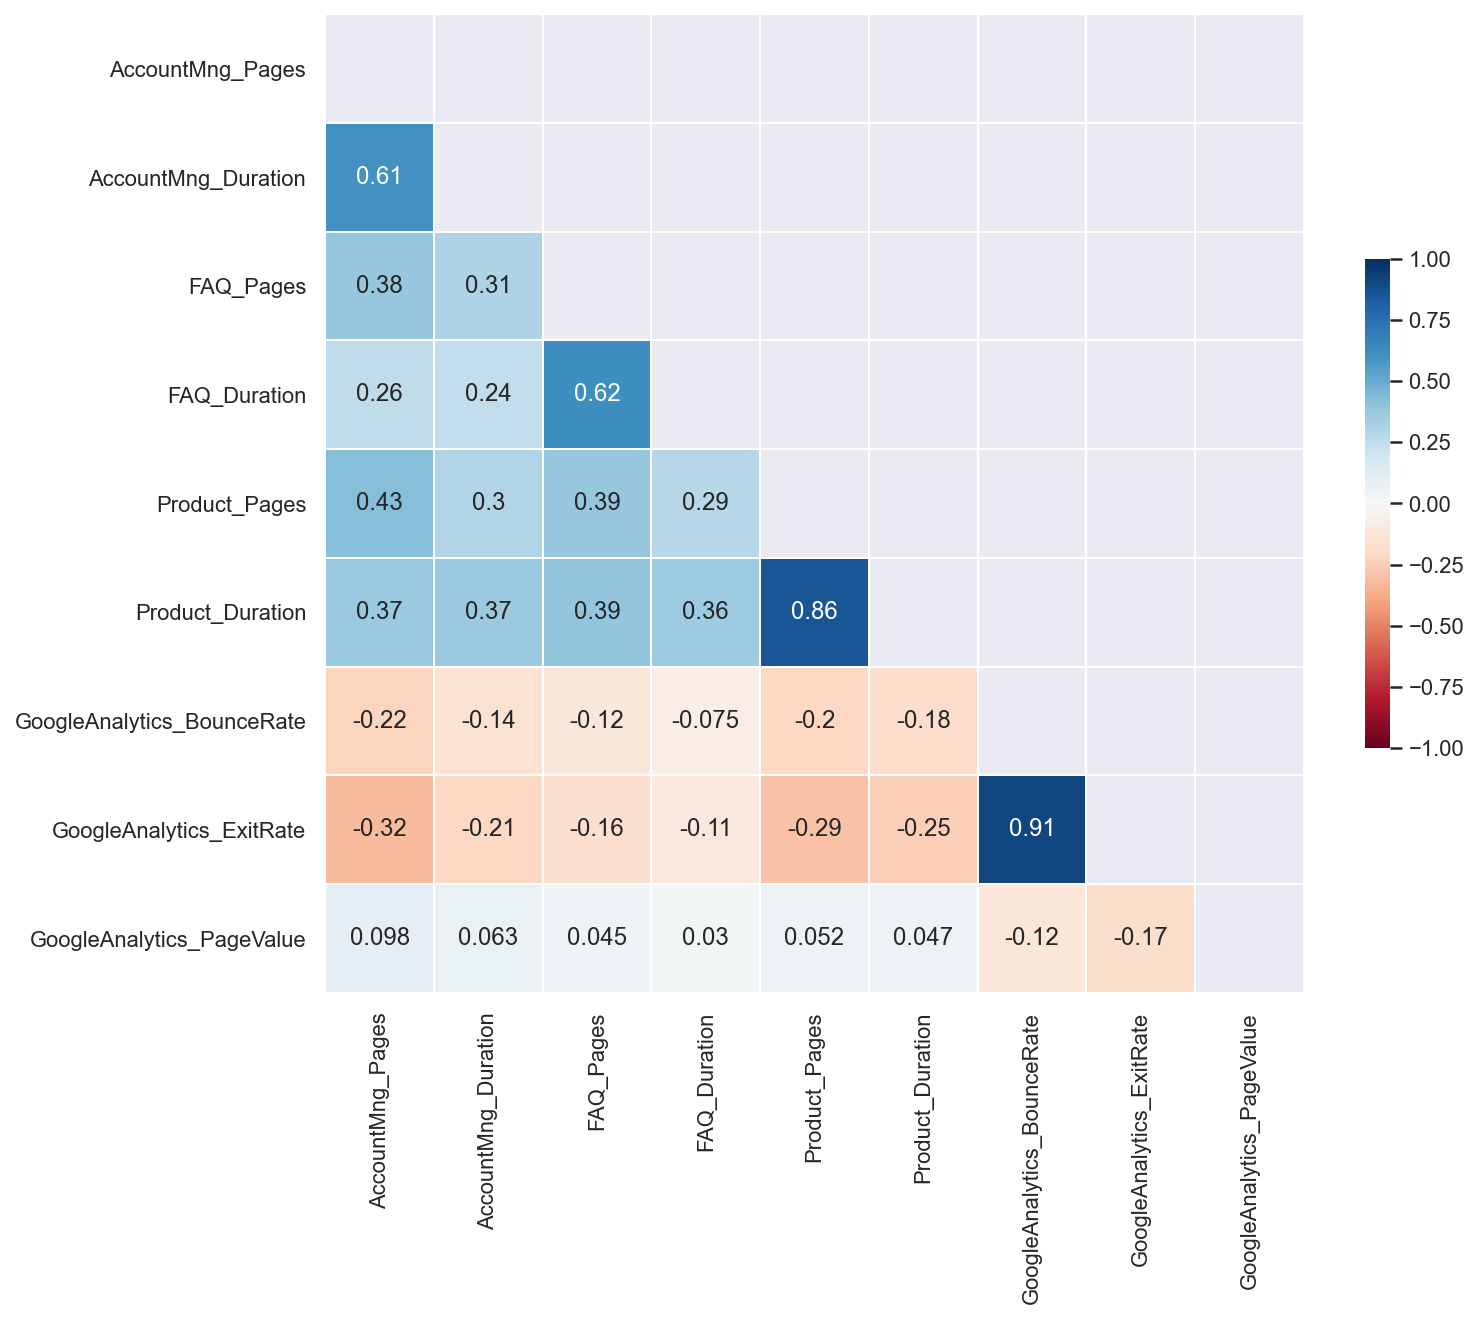

In [151]:
# Compute the correlation matrix - Pearson
corr = data_1.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

<font color='darkblue'>If we consider a treshold of |0.70| for Pearson correlation, we have:</font> <br>
- Either we have 'GoogleAnalytics_ExitRate' or 'GoogleAnalytics_BounceRate'
- Either we have 'Product_Duration' or 'Product_Pages '


##### 6.1.2 corrlation's matrix : spearman <a class="anchor" id="6.1.2"></a>

<AxesSubplot:>

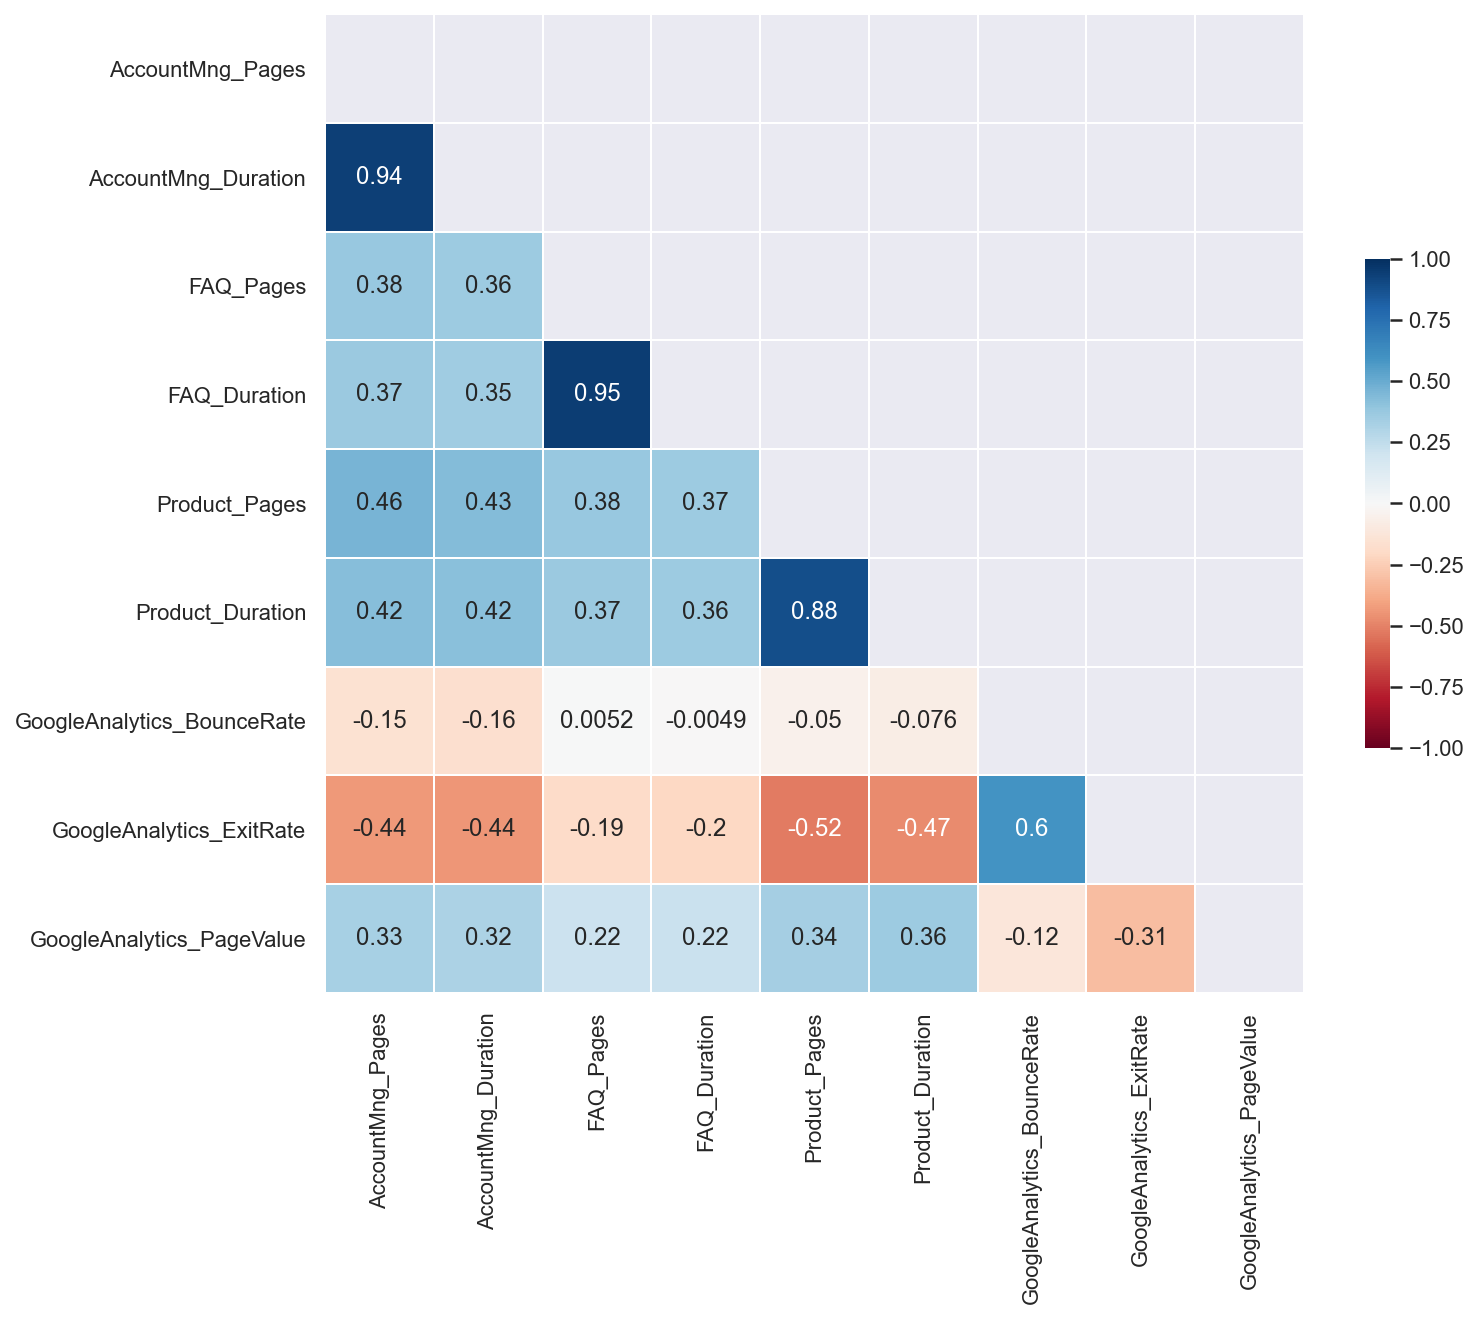

In [152]:
# Compute the correlation matrix - Spearman
corr = data_1.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

<font color='darkblue'>If we consider a treshold of |0.70| for Spearman correlation, we have:</font> <br>
- Either we have 'AccountMng_Duration' or 'AccountMng_Pages'
- Either we have 'FAQ_Duration' or 'FAQ_Pages'
- Either we have 'Product_Duration ' or 'Product_Pages'

#### 6.2 Recursive Feature Elimination - RFE <a class="anchor" id="6.2"></a>

In [159]:
model = LogisticRegression()

In [160]:
rfe = RFE(estimator = model)

In [161]:
X_rfe = rfe.fit_transform(X = train1[metric_features], y =target ) 

In [162]:
train[metric_features].columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue'],
      dtype='object')

In [163]:
rfe.support_

array([False, False, False, False,  True,  True, False,  True,  True])

In [164]:
rfe.ranking_

array([4, 5, 3, 6, 1, 1, 2, 1, 1])

In [166]:
selected_features = pd.Series(rfe.support_, index = train1[metric_features].columns)
selected_features

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                  True
Product_Duration               True
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
dtype: bool

In [167]:
#no of features
nof_list=np.arange(1,9)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()    
    X_train, X_test, y_train, y_test = train_test_split(train1[metric_features], target, test_size = 0.3, random_state = 0)
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.878838


####  6.3 Lasso Regression <a class="anchor" id="6.3"></a>

In [168]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [169]:
reg = LassoCV()

In [170]:
reg.fit(train1[metric_features], target)

LassoCV()

In [171]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

Best alpha using built-in LassoCV: 0.003415


In [172]:
print("Best score using built-in LassoCV: %f" %reg.score(X = train1[metric_features], y = target))

Best score using built-in LassoCV: 0.263016


In [173]:
coef = pd.Series(reg.coef_, index = train1[metric_features].columns)

In [174]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 0 variables


In [175]:
coef.sort_values()

GoogleAnalytics_ExitRate     -0.030326
FAQ_Duration                  0.000025
FAQ_Pages                     0.000684
AccountMng_Duration           0.000690
AccountMng_Pages              0.002323
GoogleAnalytics_BounceRate    0.003203
GoogleAnalytics_PageValue     0.008947
Product_Duration              0.009904
Product_Pages                 0.013191
dtype: float64

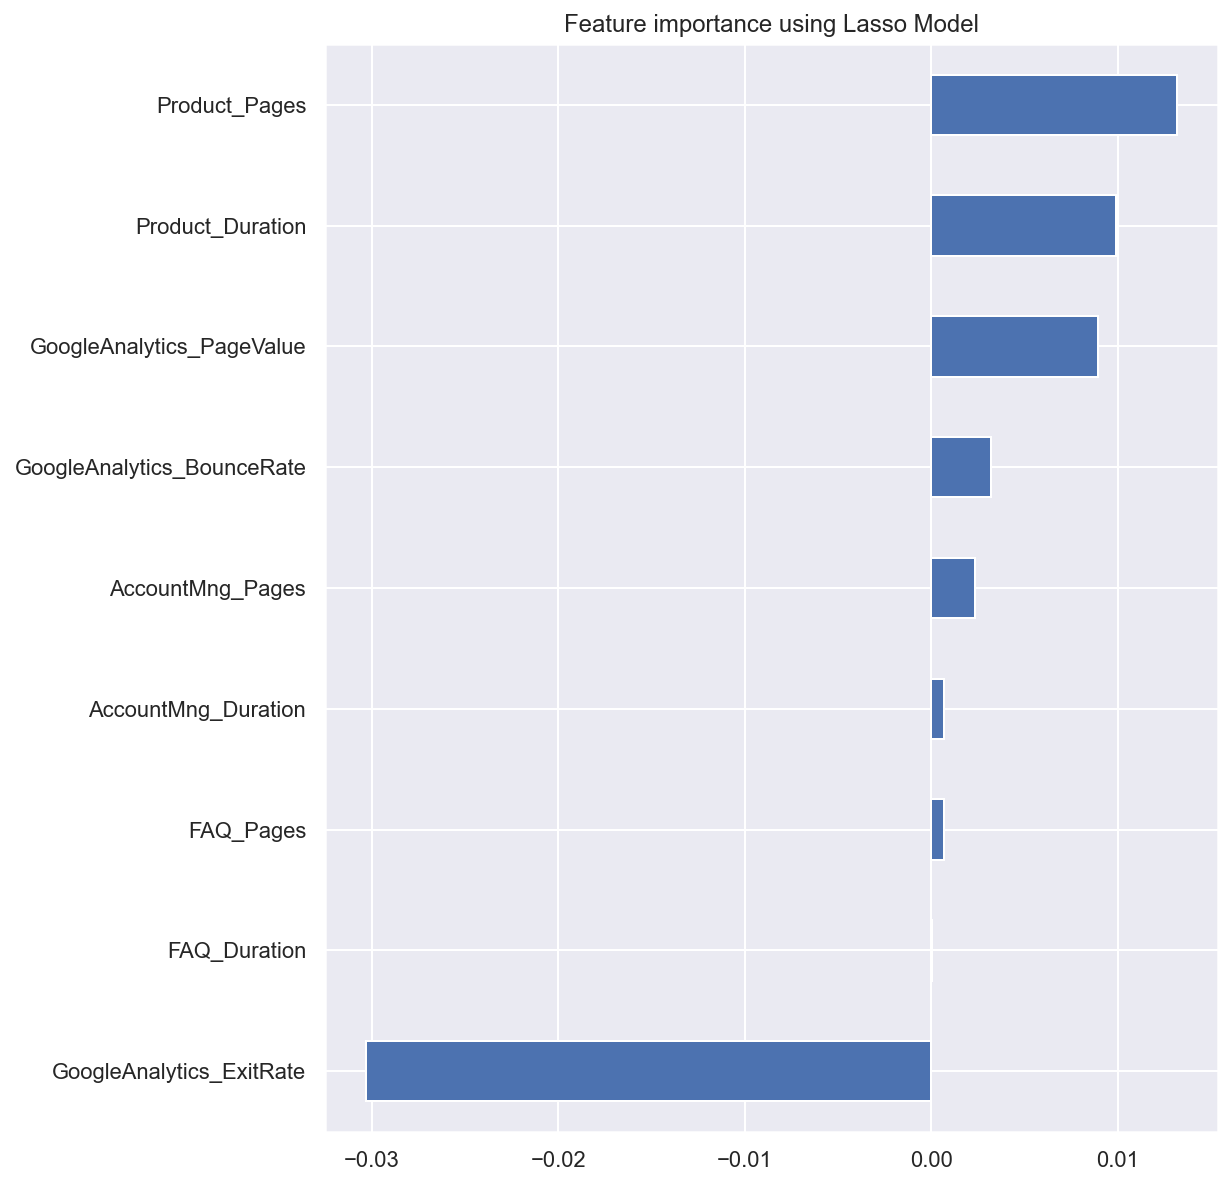

In [176]:
plot_importance(coef,'Lasso')

#### 6.4 Ridge regression <a class="anchor" id="6.4"></a>

In [177]:
ridge = RidgeCV()

In [178]:
ridge.fit(X = train1[metric_features], y = target)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [179]:
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)

Best alpha using built-in RidgeCV: 10.000000


In [180]:
print("Best score using built-in RidgeCV: %f" %ridge.score(train1[metric_features], target))

Best score using built-in RidgeCV: 0.263718


In [181]:
coef_ridge = pd.Series(ridge.coef_, index = train1[metric_features].columns)
coef_ridge.sort_values()

GoogleAnalytics_ExitRate     -0.045270
AccountMng_Duration          -0.000174
FAQ_Duration                  0.000003
FAQ_Pages                     0.002961
AccountMng_Pages              0.006053
GoogleAnalytics_PageValue     0.008882
GoogleAnalytics_BounceRate    0.010122
Product_Pages                 0.011131
Product_Duration              0.011774
dtype: float64

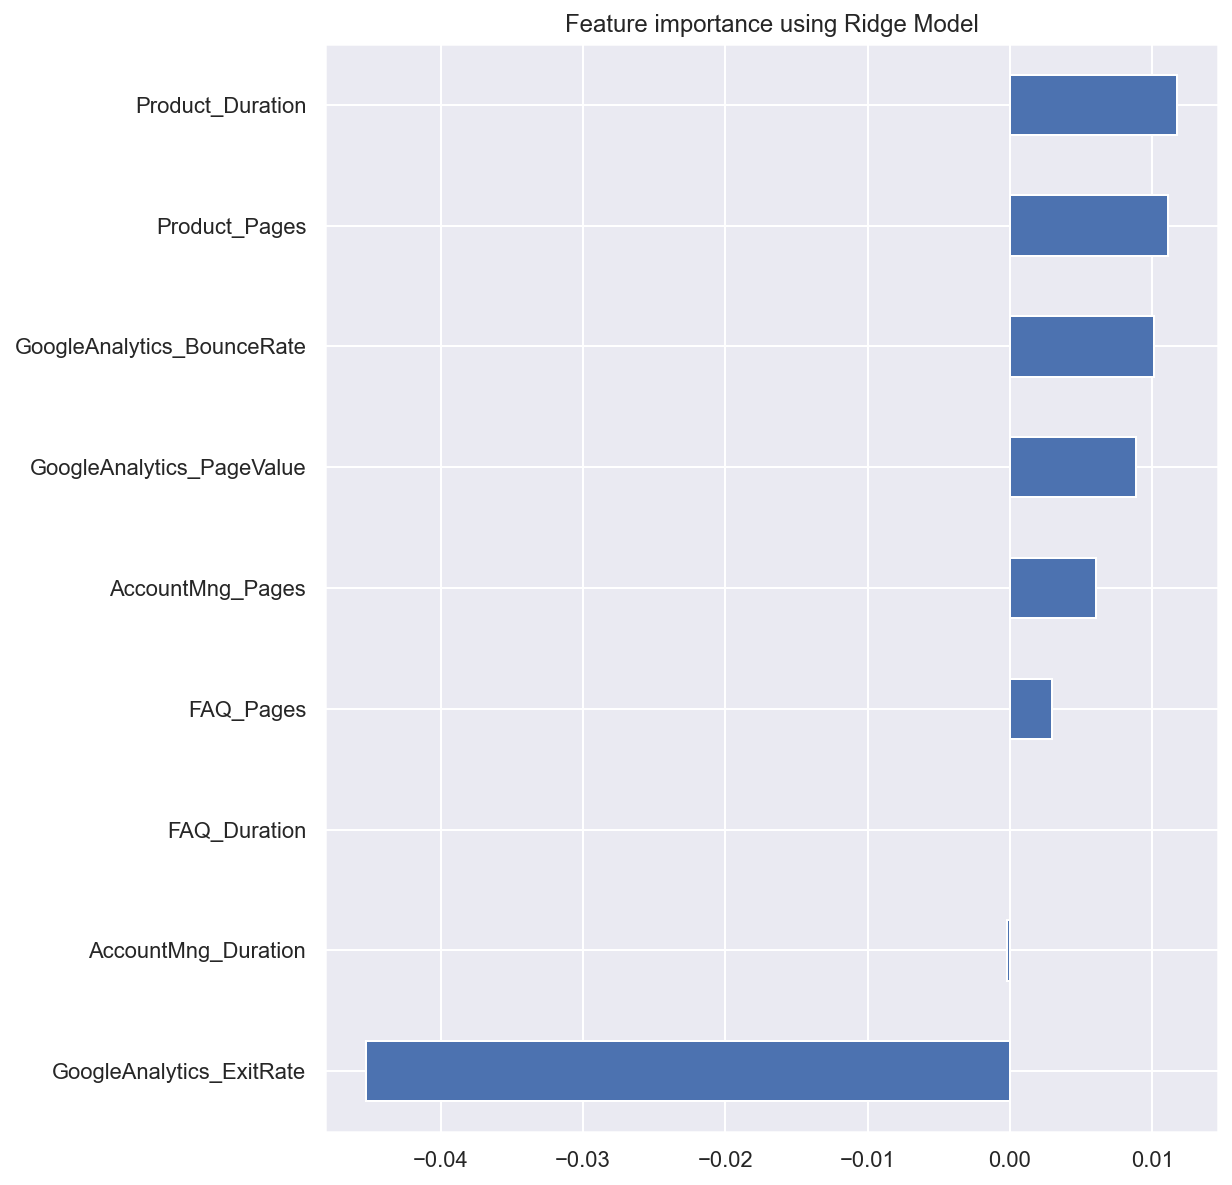

In [182]:
plot_importance(coef_ridge,'Ridge')

#### 6.5 Chi-Square <a class="anchor" id="6.5"></a>

In [183]:
def TestIndependence(X, y, var, alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [185]:
for var in train1_1[non_metric_features]:
    TestIndependence(train1_1[non_metric_features][var], train1_1["Buy"], var)

In [186]:
from sklearn.feature_selection import chi2

In [187]:
non_metric_features

['OS', 'Country', 'season', 'Type_of_Visitor', 'Browser', 'Type_of_Traffic']

In [188]:
encoded = train1.columns[train1.columns.str.startswith('x')].tolist()
encoded

['x0_Chrome OS',
 'x0_Fedora',
 'x0_MacOSX',
 'x0_Other',
 'x0_Ubuntu',
 'x0_Windows',
 'x0_iOS',
 'x1_France',
 'x1_Germany',
 'x1_Italy',
 'x1_Other',
 'x1_Portugal',
 'x1_Spain',
 'x1_Switzerland',
 'x1_United Kingdom',
 'x2_spring',
 'x2_summer',
 'x2_winter',
 'x3_Other',
 'x3_Returner',
 'x4_10',
 'x4_11',
 'x4_12',
 'x4_13',
 'x4_2',
 'x4_3',
 'x4_4',
 'x4_5',
 'x4_6',
 'x4_7',
 'x4_8',
 'x5_10',
 'x5_11',
 'x5_12',
 'x5_13',
 'x5_14',
 'x5_15',
 'x5_2',
 'x5_3',
 'x5_4',
 'x5_5',
 'x5_6',
 'x5_7',
 'x5_8',
 'x5_9']

In [189]:
chi_scores = chi2(train1[encoded], target)
chi_scores

(array([9.00350494e-01, 5.52116684e-01, 3.67701779e+01, 7.56512675e-02,
        2.19901339e+00, 1.45070259e+01, 1.01684371e-01, 4.68608877e-01,
        1.53630883e+00, 3.67414007e-02, 6.38214449e-01, 1.66479843e-01,
        5.79614357e-01, 1.30311077e-01, 1.59772273e+00, 6.40506591e+01,
        1.91904319e+00, 3.23273822e+01, 6.42328235e-01, 1.49456747e+01,
        1.34653906e+00, 5.52116684e-01, 5.44992037e-01, 5.50865716e+00,
        3.46836931e-02, 5.41789515e+00, 1.60243704e+00, 3.41184158e+00,
        3.94124551e+00, 1.04603394e+00, 1.28181275e-02, 6.07168961e+00,
        3.81785273e+00, 8.09771137e+00, 4.51382701e+01, 1.36143872e+00,
        9.50629650e+00, 9.23202086e+01, 5.50119143e+01, 2.39211208e-01,
        3.89261925e+00, 3.11077754e+00, 6.59756628e+00, 4.26101318e+01,
        1.16953189e+00]),
 array([3.42687748e-01, 4.57454106e-01, 1.32907853e-09, 7.83279549e-01,
        1.38099102e-01, 1.39637773e-04, 7.49817611e-01, 4.93627847e-01,
        2.15168065e-01, 8.47992509e-01

In [190]:
p_values = pd.Series(chi_scores[1],index = train1[encoded].columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

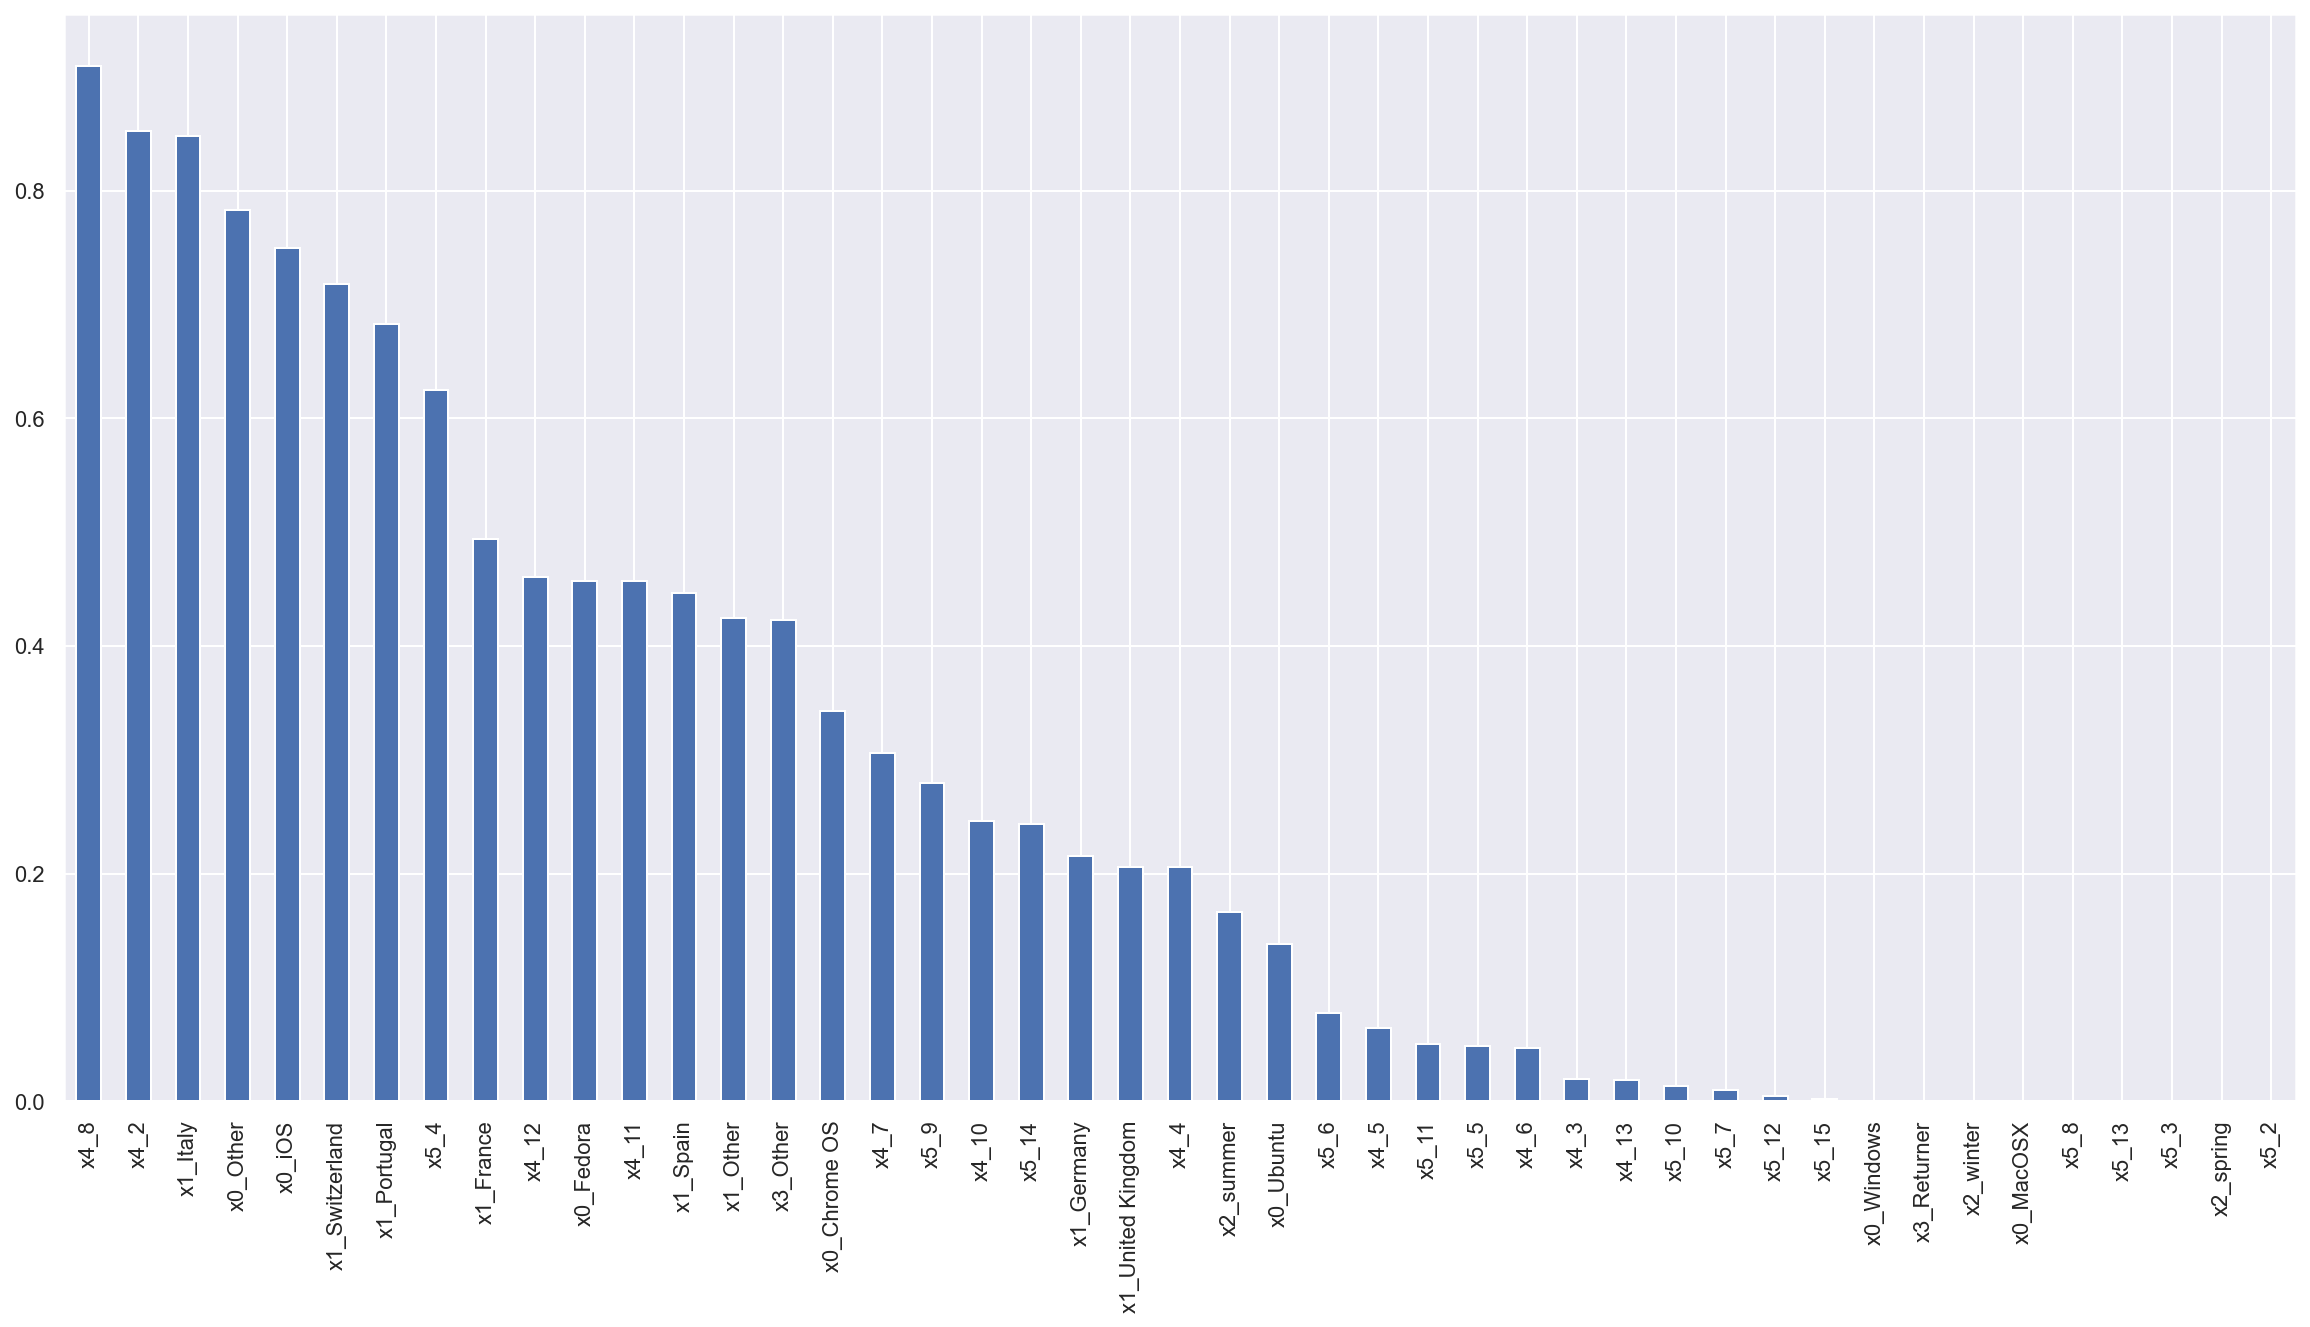

In [191]:
plt.figure(figsize=(20,10))
p_values.plot.bar()

In [192]:
chi2_features=SelectKBest(chi2,k=10)
best_features=chi2_features.fit_transform(train1[encoded],target)
cols=chi2_features.get_support(indices=True)
features_to_keep=train1[encoded].iloc[:,cols]
features_to_keep.columns

Index(['x0_MacOSX', 'x0_Windows', 'x2_spring', 'x2_winter', 'x3_Returner',
       'x5_13', 'x5_15', 'x5_2', 'x5_3', 'x5_8'],
      dtype='object')

#### 6.6 A-Nova Values <a class="anchor" id="6.6"></a>

In [193]:
# Create an SelectKBest object to select features with best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(train1, target)

In [194]:
# Show results
print('Original number of features:', train1.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 54
Reduced number of features: 10


In [195]:
# Get columns to keep and create new dataframe with those only
cols = fvalue_selector.get_support(indices=True)
features_to_keep = train1.iloc[:,cols]
features_to_keep.columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'Product_Pages',
       'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'x2_spring',
       'x3_Returner', 'x5_2'],
      dtype='object')

#### 6.7 Feature Importances - Tree based Classifiers <a class="anchor" id="6.7"></a>

[5.69733101e-02 5.58018371e-02 3.29430914e-02 3.18692468e-02
 7.24188210e-02 7.36569084e-02 5.47508972e-02 8.21290834e-02
 2.79689295e-01 3.84839054e-04 1.66492437e-05 9.25177911e-03
 2.64731703e-04 8.01496736e-04 1.30706960e-02 5.88062004e-03
 1.17333038e-02 5.82885267e-03 8.38434562e-03 9.15028416e-03
 1.81444780e-02 1.50938796e-02 4.98049402e-03 6.58218829e-03
 1.36045416e-02 1.17530433e-02 1.10948886e-02 7.36551280e-04
 1.32838342e-02 3.41574101e-03 1.96303750e-05 7.43329054e-04
 4.04008972e-04 1.59884620e-02 8.56500645e-04 7.88722578e-03
 5.52857116e-03 2.13746532e-03 1.23908825e-03 1.66735982e-03
 5.22676185e-03 4.10307707e-03 1.92832625e-04 4.03017664e-03
 3.28878404e-04 2.62666308e-03 1.32622890e-02 7.75799674e-03
 6.55591736e-03 3.52808530e-03 4.18967494e-03 1.63343773e-03
 5.99682549e-03 4.06013525e-04]


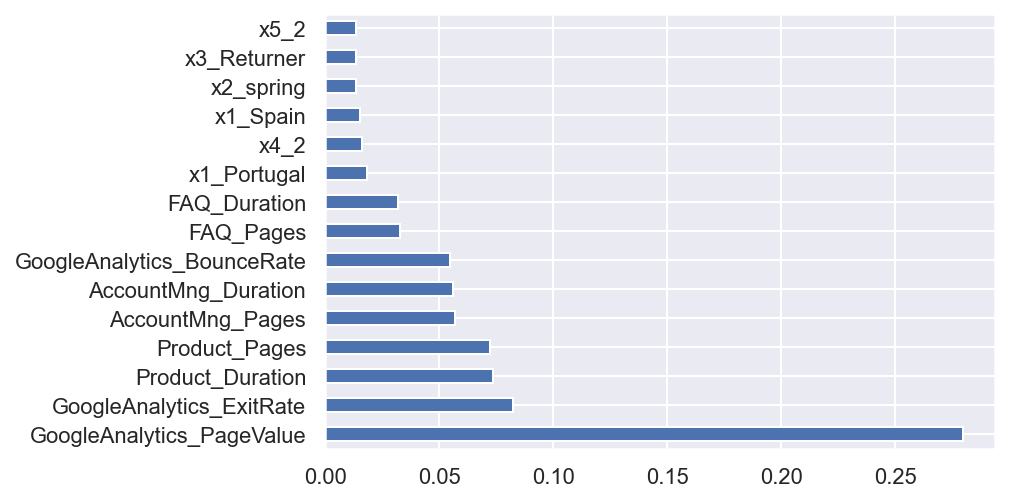

In [196]:
model = ExtraTreesClassifier()
model.fit(train1, target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### 6.8 Gini Importance | Entropy Importance <a class="anchor" id="6.8"></a>

In [197]:
gini_importance = DecisionTreeClassifier().fit(train1, target).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(train1, target).feature_importances_

<AxesSubplot:xlabel='Value', ylabel='Col'>

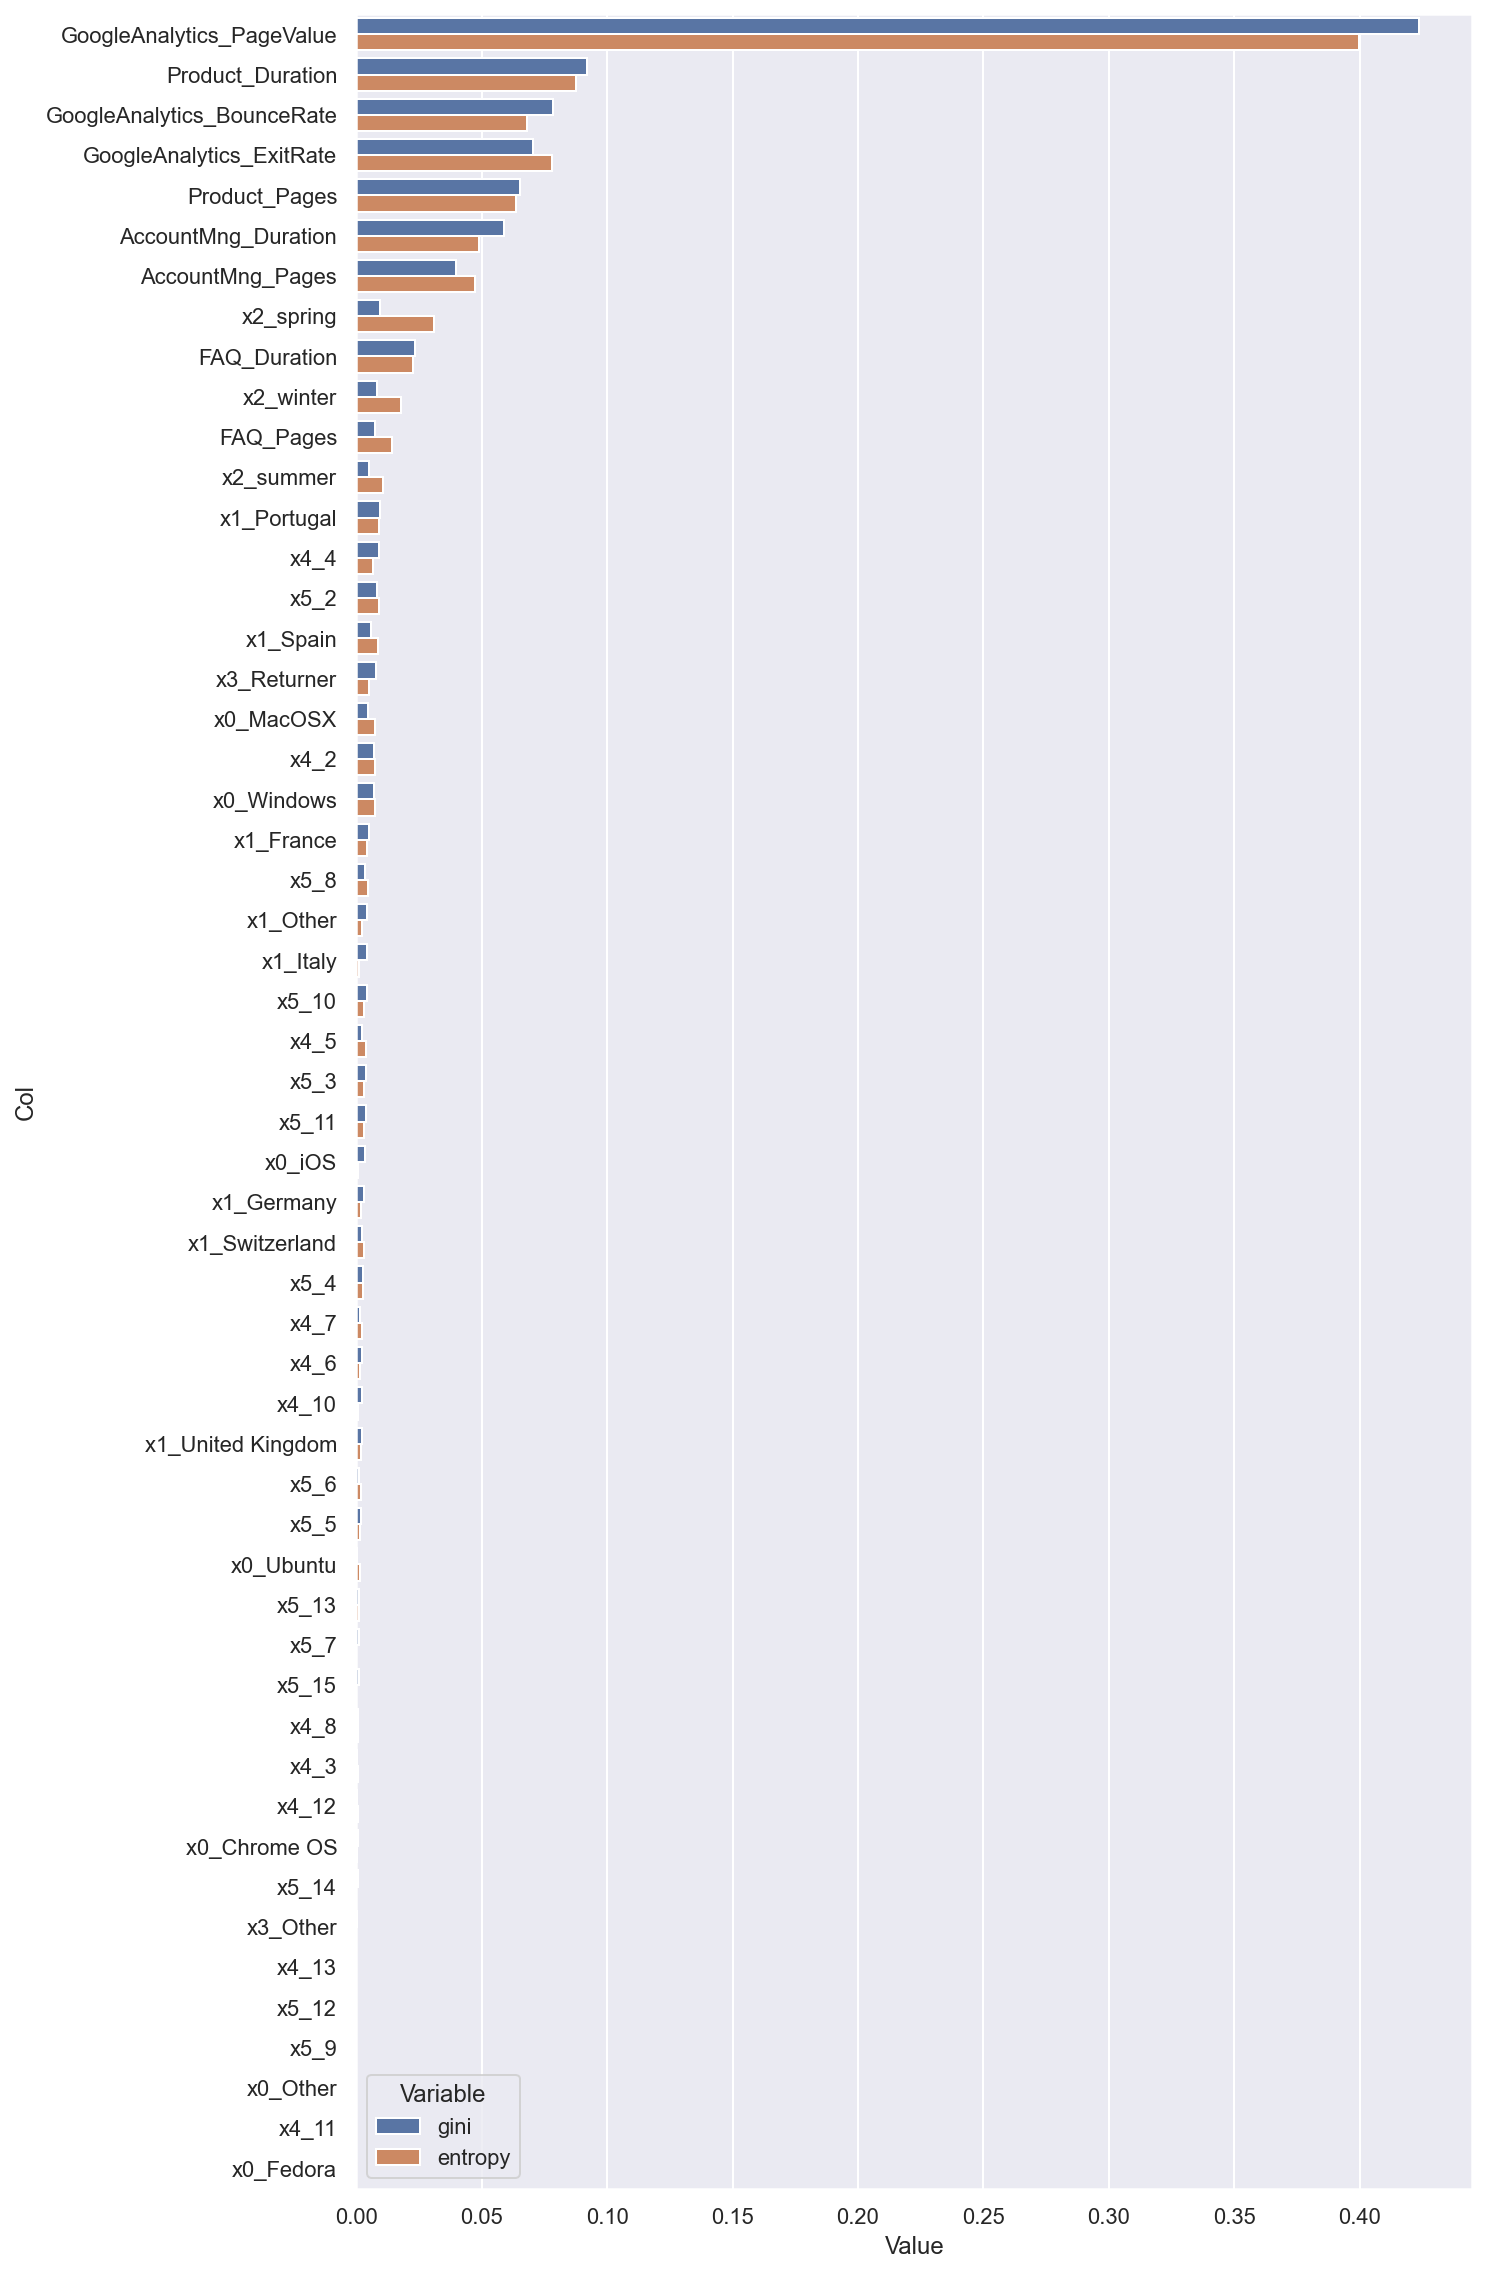

In [198]:
import seaborn as sns 

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = train1.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(10,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### 6.9  MAE | MSE | FRIEDMAN Importances <a class="anchor" id="6.9"></a>

In [153]:
from sklearn.tree import DecisionTreeRegressor

In [154]:
mse_importance = DecisionTreeRegressor().fit(train1, target).feature_importances_
mae_importance = DecisionTreeRegressor(criterion='mae').fit(train1, target).feature_importances_
friedman_importance = DecisionTreeRegressor(criterion='friedman_mse').fit(train1, target).feature_importances_

<AxesSubplot:xlabel='Value', ylabel='Col'>

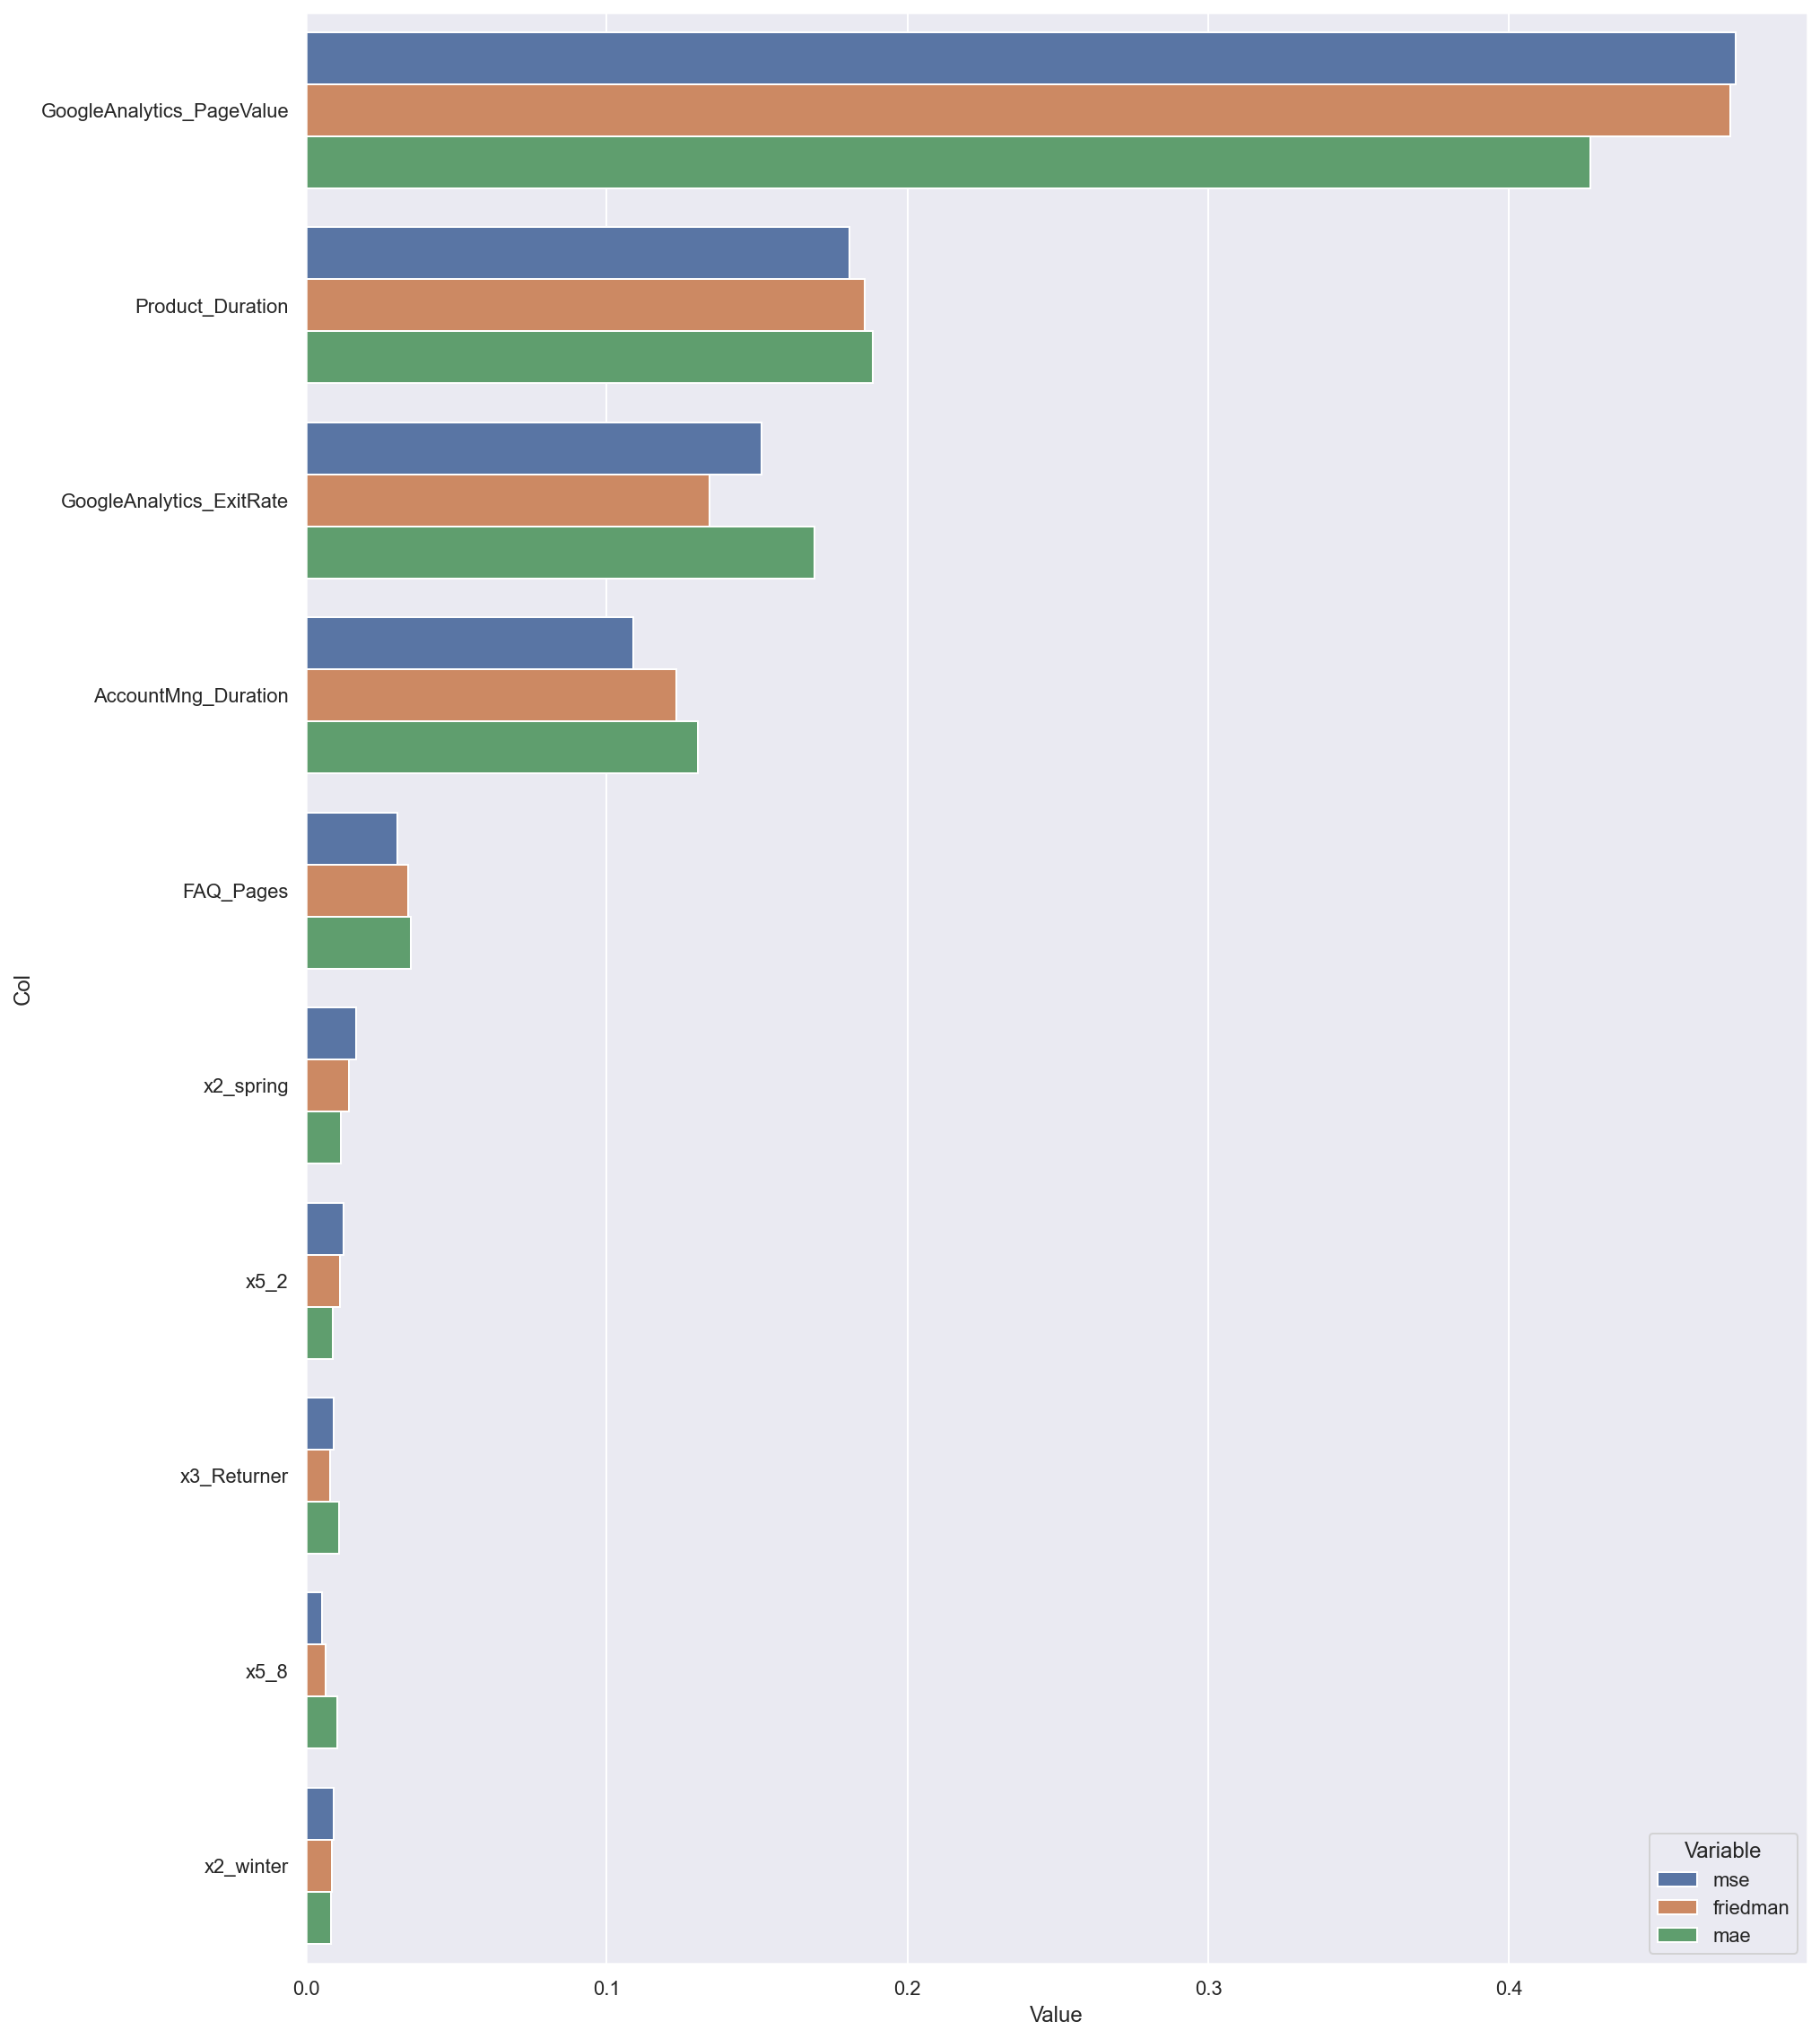

In [155]:
zippy = pd.DataFrame(zip(mse_importance, mae_importance, friedman_importance), columns = ['mse','mae','friedman'])
zippy['col'] = train1.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### 6.10 AdaBoost Feature Importances <a class="anchor" id="6.10"></a>

In [156]:
ab = AdaBoostClassifier(random_state = 5).fit(train1, target)

<AxesSubplot:xlabel='importances', ylabel='features'>

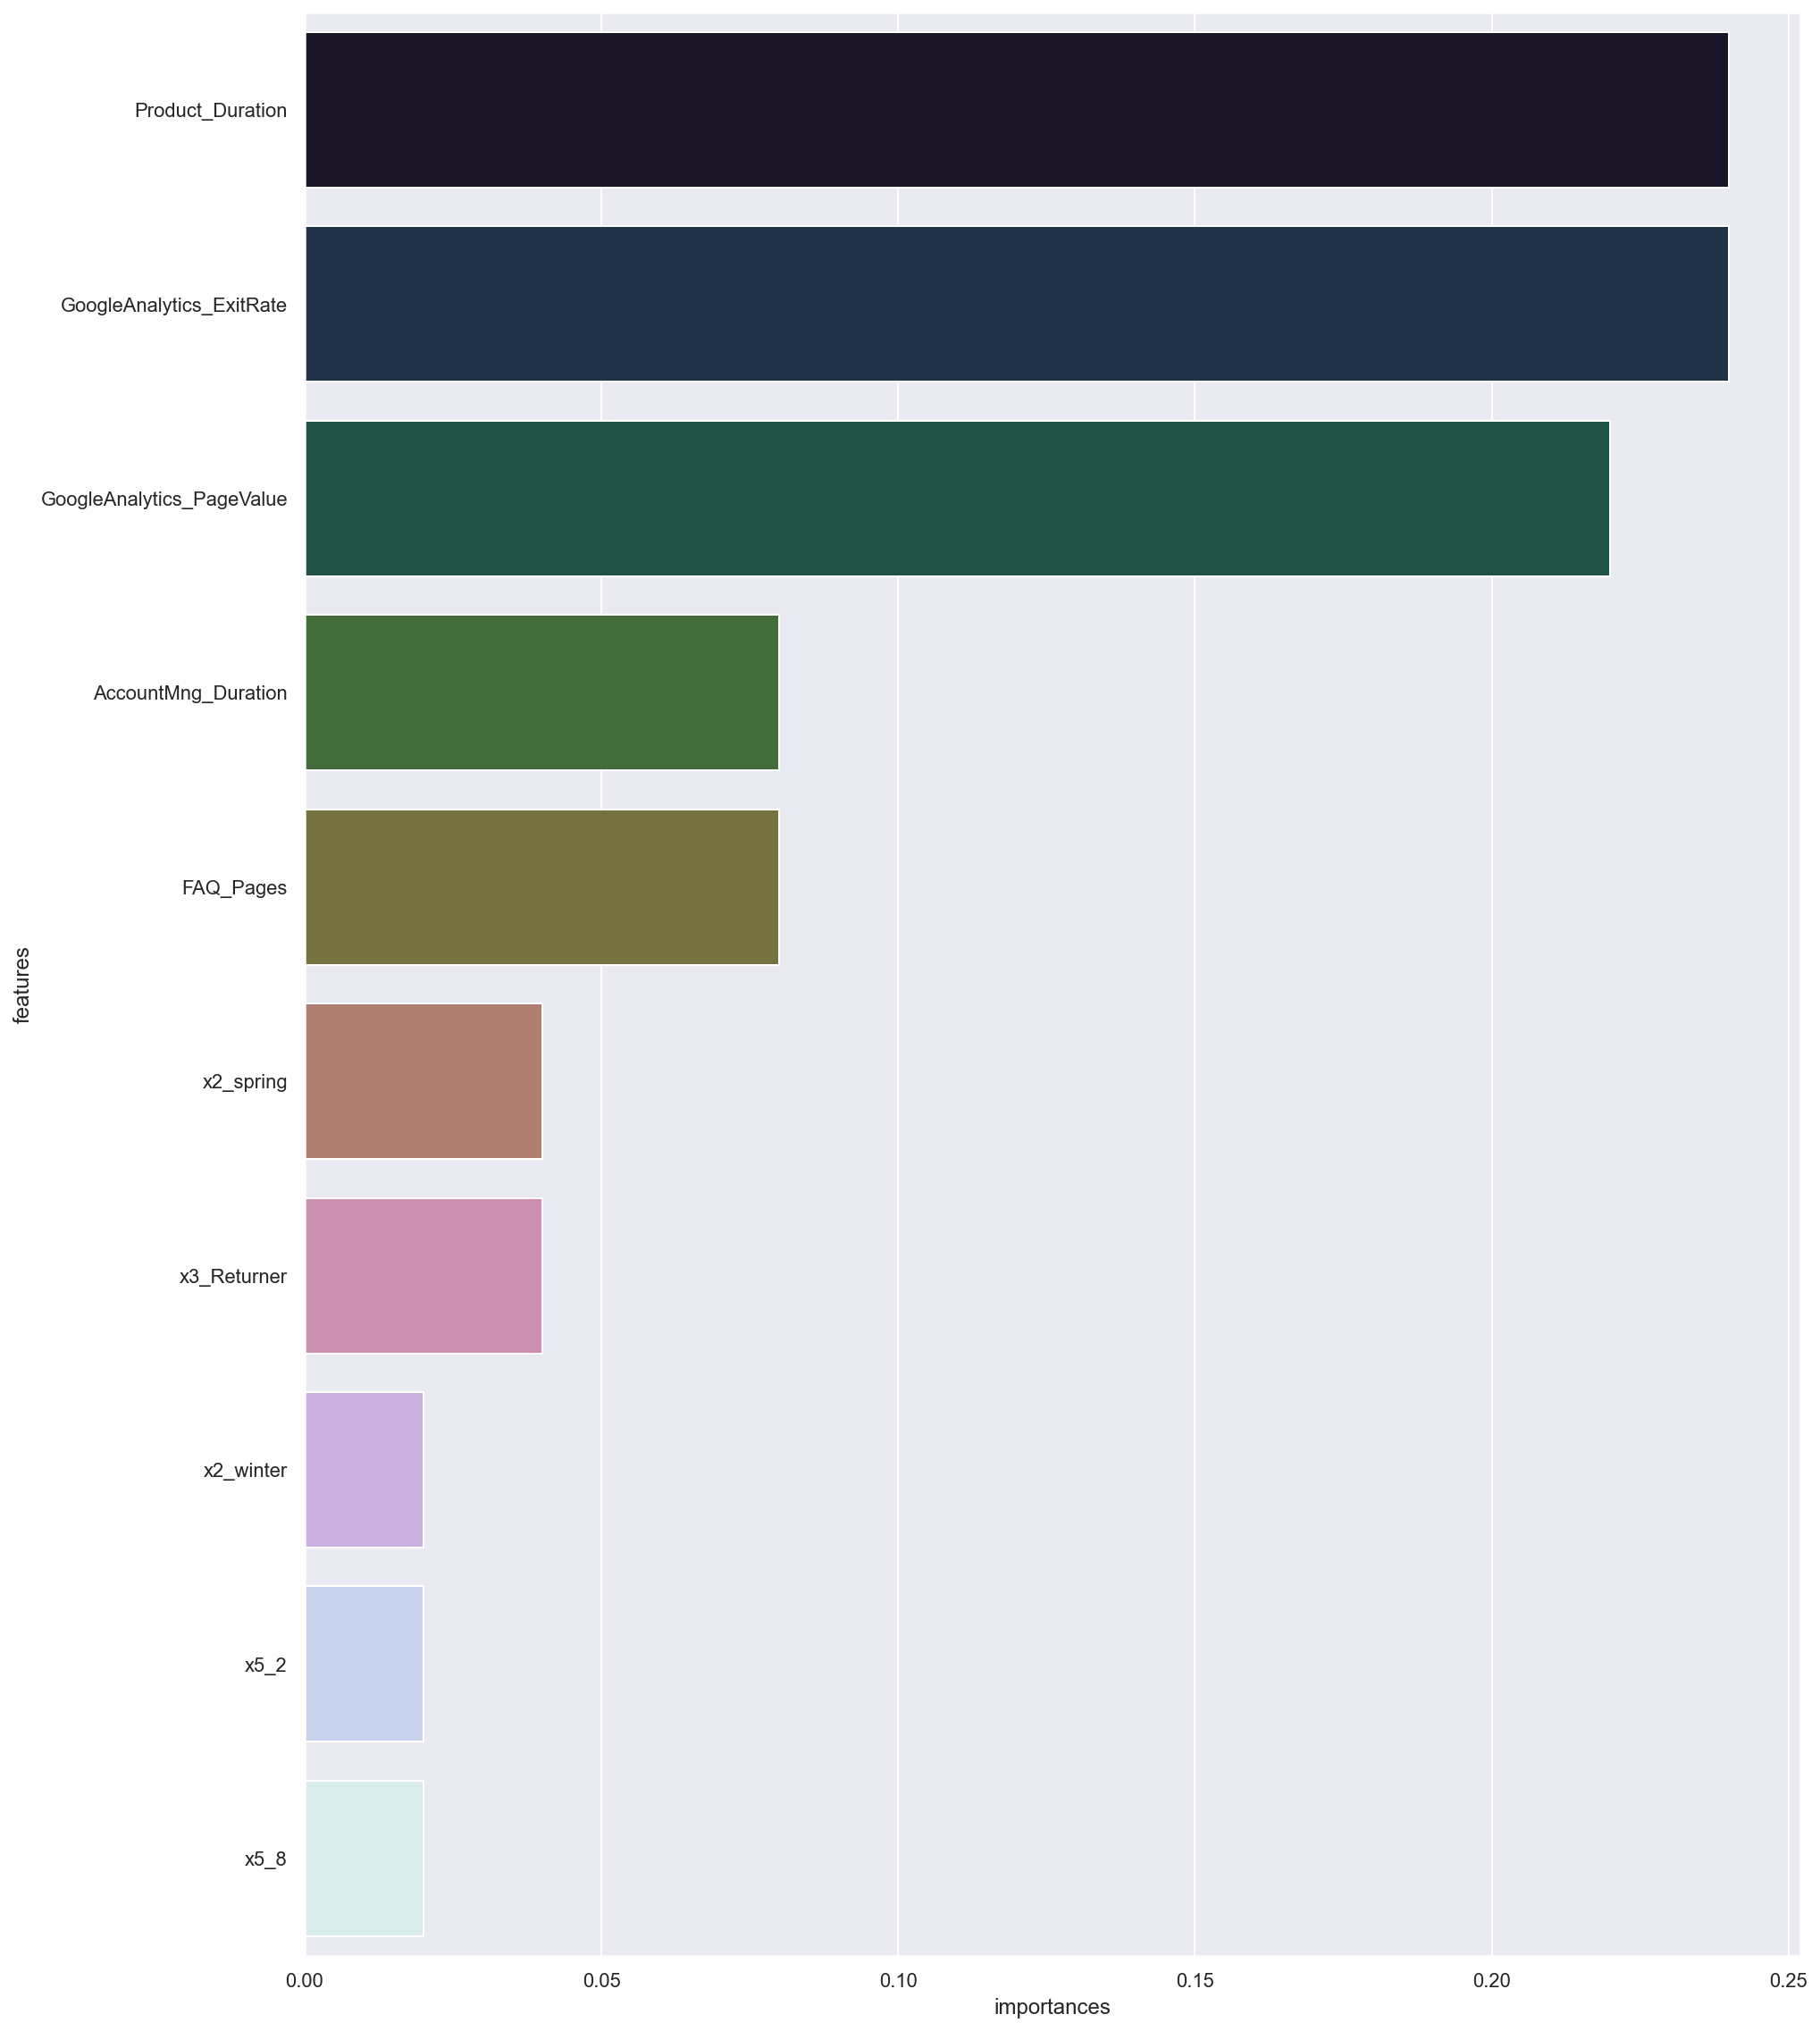

In [157]:
plt.figure(figsize=(15,20))
importances = ab.feature_importances_
features = train1.columns
data_tuples = list(zip(importances, features))
data_1 = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_1 = data_1.sort_values('importances', ascending = False)
sns.barplot(data_1['importances'], data_1['features'], palette = 'cubehelix', orient = 'h')

In [121]:
train1.dtypes

AccountMng_Pages              float64
AccountMng_Duration           float64
FAQ_Pages                     float64
FAQ_Duration                  float64
Product_Pages                 float64
Product_Duration              float64
GoogleAnalytics_BounceRate    float64
GoogleAnalytics_ExitRate      float64
GoogleAnalytics_PageValue     float64
x0_Chrome OS                  float64
x0_Fedora                     float64
x0_MacOSX                     float64
x0_Other                      float64
x0_Ubuntu                     float64
x0_Windows                    float64
x0_iOS                        float64
x2_spring                     float64
x2_summer                     float64
x2_winter                     float64
x3_Other                      float64
x3_Returner                   float64
x4_10                         float64
x4_11                         float64
x4_12                         float64
x4_13                         float64
x4_2                          float64
x4_3        

### 6.11 Final Selected Features <a class="anchor" id=""></a>

In [57]:
#Drop the countries from both test and train
train1 = train1.drop(columns=['x1_France', 'x1_Germany','x1_Italy','x1_Other'
                              ,'x1_Portugal','x1_Spain','x1_Switzerland','x1_United Kingdom'])

In [58]:
test = test.drop(columns=['x1_France', 'x1_Germany','x1_Italy','x1_Other'
                              ,'x1_Portugal','x1_Spain','x1_Switzerland','x1_United Kingdom','x4_9'])

In [59]:
# Drop useless metric features for both train and test
train1 = train1.drop(columns=['AccountMng_Pages' , 'FAQ_Duration' ,'Product_Pages',])
test = test.drop(columns=['AccountMng_Pages' , 'FAQ_Duration' ,'Product_Pages',])

In [59]:
train1.shape

(9985, 10)

In [60]:
test.shape

(2300, 10)

As we did all feature selction Methods we agreed to work with only : <br>
<b>Metric features = </b><br>
AccountMng_Duration <br>
FAQ_Pages<br>
Product_Duration<br>
GoogleAnalytics_ExitRate<br>
GoogleAnalytics_PageValue <br>
<b>Non Metric features = </b><br>
OS<br>
Type_of_Visitor<br>
Browser<br>
Type_of_Traffic<br>

In [61]:
train1.columns

Index(['AccountMng_Duration', 'FAQ_Pages', 'Product_Duration',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'x2_spring',
       'x2_winter', 'x3_Returner', 'x5_2', 'x5_8'],
      dtype='object')

In [62]:
test.columns

Index(['AccountMng_Duration', 'FAQ_Pages', 'Product_Duration',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'x2_spring',
       'x2_winter', 'x3_Returner', 'x5_2', 'x5_8'],
      dtype='object')

### 7. Train test split  <a class="anchor" id="7"></a>

In [63]:
train1.shape

(9985, 10)

In [64]:
X = train1
y = target
test_t = test

In [65]:
# TRAIN (70%) & VALIDATION (30%) SPLIT
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

### 8. Re-Sampling Techniques for Imbalanced Classification <a class="anchor" id="8"></a>

#### 8.1 random undersampling <a class="anchor" id="8.1"></a>

In [506]:
# # example of random undersampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# # define dataset
# X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# # summarize class distribution
# print(Counter(y))
# # define undersample strategy
# undersample = RandomUnderSampler(sampling_strategy='majority')
# # fit and apply the transform
# X_over, y_over = undersample.fit_resample(X, y)
# # summarize class distribution
# print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


#### 8.2 random oversampling <a class="anchor" id="8.2"></a>

In [ ]:
# # example of random oversampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import RandomOverSampler
# # define dataset
# X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# # summarize class distribution
# print(Counter(y))
# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
# X_over, y_over = oversample.fit_resample(X, y)
# # summarize class distribution
# print(Counter(y_over))

#### 8.3 combining random oversampling and undersampling <a class="anchor" id="8.3"></a>

In [69]:
# example of combining random oversampling and undersampling for imbalanced data
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 990})
Counter({0: 1980, 1: 990})


#### 8.4 SMOTE - Synthetic Minority Oversampling Technique <a class="anchor" id="8.4"></a>

In [446]:
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

In [107]:
# # define pipeline
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# X_train, y_train = pipeline.fit_resample(X_train, y_train)

####  8.5 ADASYN - Adaptive Synthetic Oversampling <a class="anchor" id="8.5"></a>

In [186]:
# from imblearn.over_sampling import ADASYN

In [188]:
# # define pipeline
# adasyn = ADASYN(sampling_strategy='minority', random_state=15, n_neighbors=5)
# X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [189]:
# y_train.value_counts()

1    5945
0    5903
Name: Buy, dtype: int64

### 9 .Modeling <a class="anchor" id="9"></a>

#### K-Fold and Repeated K-Fold parameters

In [142]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [143]:
kf = KFold(n_splits=10)

In [144]:
def avg_score(model, X, y):
    # apply kfold
    skf = StratifiedKFold(n_splits=100)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in skf.split(X,y):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)

In [145]:
def show_results(X, y, df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg, X, y)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

### 9.1 LOGISTIC REGRESSION <a class="anchor" id="9.1"></a>

In [74]:
log_model = LogisticRegression(random_state=5)

In [75]:
log_model = log_model.fit(X_train,y_train)

In [76]:
y_pred_train=log_model.predict(X_train)
y_pred = log_model.predict(X_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
pred_prob = log_model.predict_proba(X_val)
pred_prob

array([[0.85726265, 0.14273735],
       [0.99783429, 0.00216571],
       [0.89511299, 0.10488701],
       ...,
       [0.954583  , 0.045417  ],
       [0.60937105, 0.39062895],
       [0.91483955, 0.08516045]])

In [78]:
log_model.coef_

array([[-0.02111785,  0.01897777,  0.13165512, -0.64651911,  0.08028251,
        -0.73655698, -0.75626709, -0.10617622,  0.17705288,  0.87266783]])

In [79]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[2465,   65],
       [ 304,  162]], dtype=int64)

In [80]:
labels_trainlr = log_model.predict(X_train)
labels_vallr = log_model.predict(X_val)

In [81]:
print(f1_score(labels_trainlr, y_train))
print(f1_score(labels_vallr, y_val))

0.5039950829748002
0.4675324675324675


In [82]:
log_model.score(X_train,y_train)

0.8845328373157819

In [83]:
logistic = log_model.score(X_val, y_val)

In [84]:
logistic

0.8768357810413885

In [83]:
metrics(y_train, y_pred_train, y_val, y_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5903
           1       0.76      0.38      0.51      1086

    accuracy                           0.89      6989
   macro avg       0.83      0.68      0.72      6989
weighted avg       0.88      0.89      0.87      6989

[[5774  129]
 [ 670  416]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [116]:
# labels_testlr = log_model.predict(test_t)
# # sample.set_index('Access_ID', inplace = True)
# sample['Buy'] = labels_testlr
# sample.to_csv(r'lr1.csv')

### 9.2 KNN <a class="anchor" id="9.2"></a>

In [85]:
modelKNN = KNeighborsClassifier()

In [86]:
modelKNN=modelKNN.fit(X = X_train, y = y_train)

In [87]:
labels_trainKNN = modelKNN.predict(X_train)
labels_valKNN = modelKNN.predict(X_val)

In [88]:
print(f1_score(labels_trainKNN, y_train))
print(f1_score(labels_valKNN, y_val))

0.6993006993006994
0.5794813979706878


In [74]:
modelKNN.predict_proba(X_val)

array([[0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2]])

In [75]:
print(modelKNN.score(X_train, y_train))
print(modelKNN.score(X_val, y_val))

0.9118614966375733
0.8711615487316422


In [76]:
numberK_list=np.arange(1,21)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_val = model.score(X_val, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 12
Mean accuracy in train with 12 neighbors: 0.902418
Mean accuracy in validation with 12 neighbors: 0.883845


In [77]:
modelKNN1 = KNeighborsClassifier(n_neighbors=12).fit(X = X_train, y = y_train)
print(modelKNN1.score(X_train, y_train))
print(modelKNN1.score(X_val, y_val))

0.9024180855630276
0.8838451268357811


In [78]:
KNN = modelKNN1.score(X_val, y_val)

In [186]:
# # model_fit = modelMPPC.fit(X_train_DT, y_train)
# labels_testknn = modelKNN1.predict(test_t)
# # sample.set_index('Access_ID', inplace = True)
# sample['Buy'] = labels_testknn
# sample.to_csv(r'KNN3.csv')

In [79]:
modelKNNT = KNeighborsClassifier(algorithm='kd_tree').fit(X_train, y_train)

In [80]:
labels_train = modelKNNT.predict(X_train)
labels_val = modelKNNT.predict(X_val)

In [81]:
modelKNNT.score(X_train, y_train)


0.9118614966375733

In [82]:
modelKNNT.score(X_val, y_val)

0.8711615487316422

In [83]:
import time
start = time.time()
KDD_tree = KNeighborsClassifier(algorithm='kd_tree').fit(X_train, y_train)
labels_train = KDD_tree.predict(X_train)
print('Time:', time.time()-start)

Time: 0.9327926635742188


In [84]:
modelKNNM = KNeighborsClassifier(metric = 'manhattan').fit(X = X_train, y = y_train)

In [85]:
labels_trainKNNM = modelKNNM.predict(X_train)
labels_valKNMM = modelKNNM.predict(X_val)

In [187]:
print(f1_score(labels_trainKNNM, y_train))
print(f1_score(labels_valKNMM, y_val))

0.7075882068632191
0.5640449438202247


In [86]:
KDT = modelKNNT.score(X_val, y_val)

In [87]:
metrics(y_train, labels_trainKNNM, y_val, labels_valKNMM)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5903
           1       0.74      0.67      0.71      1086

    accuracy                           0.91      6989
   macro avg       0.84      0.82      0.83      6989
weighted avg       0.91      0.91      0.91      6989

[[5652  251]
 [ 354  732]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [277]:
# # model_fit = modelMPPC.fit(X_train_DT, y_train)
# labels_test = modelKNNM.predict(test_t)
# # sample.set_index('Access_ID', inplace = True)
# sample['Buy'] = labels_test
# sample.to_csv(r'KNN_kdtree.csv')

### 9.3 Decision trees <a class="anchor" id="9.3"></a>

In [84]:
# in anaconda prompt: conda install python-graphviz
# !pip install pydotplus
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

def plot_tree(model, X):
    dot_data = export_graphviz(model,
                               feature_names=X.columns,  
                               class_names=["No Buy", "Buy"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

In [85]:
dt_gini = DecisionTreeClassifier()
dt_entropy = DecisionTreeClassifier(criterion = 'entropy')
df = pd.DataFrame(columns = ['Time', 'Train', 'Test'], index = ['Gini', 'Entropy'])
show_results(X_train, y_train, df, dt_gini, dt_entropy)

Time      Train          Test
Gini     0.029+/-0.0  1.0+/-0.0  0.857+/-0.04
Entropy  0.035+/-0.0  1.0+/-0.0  0.852+/-0.04

In [86]:
dt_full = DecisionTreeClassifier()
dt_10 = DecisionTreeClassifier(max_depth=10)
dt_8 = DecisionTreeClassifier(max_depth=8)
dt_6 = DecisionTreeClassifier(max_depth=6)
dt_4 = DecisionTreeClassifier(max_depth=4)
dt_2 = DecisionTreeClassifier(max_depth=2)
df = pd.DataFrame(columns = ['Time', 'Train', 'Test'], index = ['Full', '10', '8', '6', '4', '2'])
show_results(X_train, y_train, df, dt_full, dt_10, dt_8, dt_6, dt_4, dt_2)

Time        Train          Test
Full   0.03+/-0.0    1.0+/-0.0  0.857+/-0.04
10    0.024+/-0.0  0.941+/-0.0  0.884+/-0.03
8     0.019+/-0.0  0.923+/-0.0  0.888+/-0.03
6     0.015+/-0.0  0.909+/-0.0  0.892+/-0.03
4     0.011+/-0.0  0.897+/-0.0  0.892+/-0.03
2     0.007+/-0.0  0.893+/-0.0  0.892+/-0.03

In [87]:
dt = DecisionTreeClassifier(max_depth=6)
dt_5 = DecisionTreeClassifier(max_depth=6, min_samples_split=5)
dt_10 = DecisionTreeClassifier(max_depth=6, min_samples_split=10)
dt_20 = DecisionTreeClassifier(max_depth=6, min_samples_split=20)
dt_40 = DecisionTreeClassifier(max_depth=6, min_samples_split=40)
dt_80 = DecisionTreeClassifier(max_depth=6, min_samples_split=80)
dt_160 = DecisionTreeClassifier(max_depth=6, min_samples_split=160)
df = pd.DataFrame(columns = ['Time', 'Train', 'Test'], index = ['Default', '5', '10', '20', '40', '80', '160'])
show_results(X_train, y_train, df, dt, dt_5, dt_10, dt_20, dt_40, dt_80, dt_160)

Time        Train          Test
Default  0.016+/-0.0  0.909+/-0.0  0.892+/-0.03
5        0.015+/-0.0  0.908+/-0.0  0.892+/-0.03
10       0.015+/-0.0  0.908+/-0.0  0.892+/-0.03
20       0.015+/-0.0  0.907+/-0.0  0.892+/-0.03
40       0.015+/-0.0  0.907+/-0.0  0.893+/-0.04
80       0.015+/-0.0  0.906+/-0.0  0.894+/-0.03
160      0.015+/-0.0  0.903+/-0.0  0.894+/-0.03

In [88]:
dt = DecisionTreeClassifier(max_depth=6)
dt_2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)
dt_5 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)
dt_10 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)
dt_20 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt_40 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=40)
dt_80 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=80)
dt_160 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=160)
df = pd.DataFrame(columns = ['Time', 'Train', 'Test'], index = ['Default', '2', '5', '10', '20', '40', '80', '160'])
show_results(X_train, y_train, df, dt, dt_2, dt_5, dt_10, dt_20, dt_40, dt_80, dt_160)

Time        Train          Test
Default  0.015+/-0.0  0.909+/-0.0  0.892+/-0.03
2        0.015+/-0.0  0.907+/-0.0  0.892+/-0.03
5        0.015+/-0.0  0.906+/-0.0  0.888+/-0.03
10       0.015+/-0.0  0.904+/-0.0  0.888+/-0.03
20       0.015+/-0.0  0.904+/-0.0  0.891+/-0.03
40       0.015+/-0.0  0.904+/-0.0  0.892+/-0.03
80       0.014+/-0.0  0.901+/-0.0  0.887+/-0.03
160      0.013+/-0.0  0.898+/-0.0  0.892+/-0.04

In [89]:
dt = DecisionTreeClassifier(max_depth=6)
dt_16 = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=16)
dt_8 = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=8)
dt_4 = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=4)
df = pd.DataFrame(columns = ['Time', 'Train', 'Test'], index = ['Default', '16', '8', '4'])
show_results(X_train, y_train, df, dt, dt_16, dt_8, dt_4)

Time        Train          Test
Default  0.015+/-0.0  0.909+/-0.0  0.892+/-0.03
16       0.014+/-0.0  0.902+/-0.0  0.893+/-0.03
8        0.013+/-0.0  0.895+/-0.0   0.89+/-0.03
4        0.008+/-0.0  0.893+/-0.0  0.892+/-0.03

In [90]:
dt = DecisionTreeClassifier(max_depth=6)
dt_01 = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.01)
dt_02 = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.02)
dt_05 = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.05)
df = pd.DataFrame(columns = ['Time', 'Train', 'Test'], index = ['Default', '0.01', '0.02', '0.05'])
show_results(X_train, y_train, df, dt, dt_01, dt_02, dt_05)

Time        Train          Test
Default  0.015+/-0.0  0.909+/-0.0  0.891+/-0.03
0.01     0.007+/-0.0  0.885+/-0.0  0.884+/-0.04
0.02     0.007+/-0.0  0.885+/-0.0  0.884+/-0.04
0.05     0.007+/-0.0  0.885+/-0.0  0.884+/-0.04

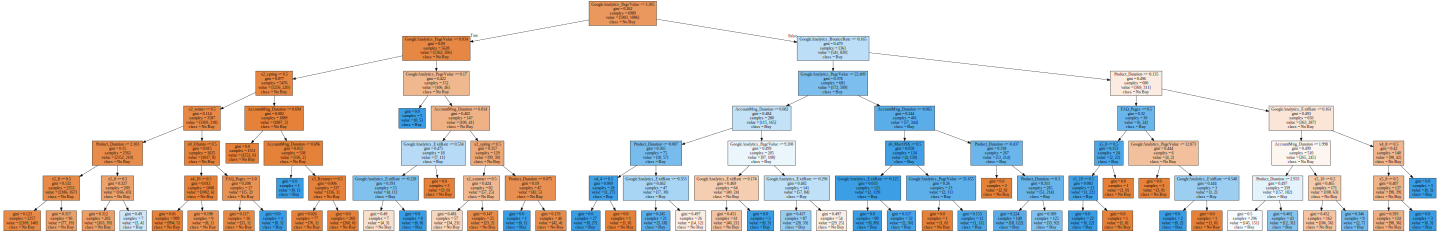

In [91]:
dt = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)
y_pred = dt.predict(X_val)
plot_tree(dt, X_train)

In [92]:
X_train

AccountMng_Duration  FAQ_Pages  Product_Duration  \
Access_ID                                                     
732444486            -0.086428        0.0         -0.442413   
667424813            -0.086428        0.0         -0.449016   
312331523             0.278190        0.0         -0.391530   
752986399             9.290183        0.0          2.570866   
231492716            -0.086428        0.0          1.153210   
...                        ...        ...               ...   
569242295            -0.086428        0.0         -0.384344   
353442009             1.934909        0.0          5.143316   
330440404             0.140446        0.0         -0.174078   
425795791            22.030896        9.0          2.362551   
269187621             0.725636        0.0          0.445457   

           GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
Access_ID                                                         
732444486                   -0.185629                  0.697479   
667424813                    3.808383                  2.098039   
312331523                   -0.185629                 -0.002801   
752986399                   -0.185629                 -0.560224   
231492716                    0.101796                 -0.285714   
...                               ...                       ...   
569242295                   -0.185629                  0.540616   
353442009                   -0.065868                 -0.327731   
330440404                   -0.185629                 -0.504202   
425795791                   -0.029940                 -0.302521   
269187621                   -0.185629                 -0.647059   

           GoogleAnalytics_PageValue  x0_Chrome OS  x0_Fedora  x0_MacOSX  \
Access_ID                                                                  
732444486                     0.0000           0.0        0.0        1.0   
667424813                     0.0000           0.0        0.0        0.0   
312331523                     0.0000           0.0        0.0        0.0   
752986399                     9.9302           0.0        0.0        0.0   
231492716                     0.0000           0.0        0.0        0.0   
...                              ...           ...        ...        ...   
569242295                     0.0000           0.0        0.0        1.0   
353442009                     3.9982           0.0        0.0        0.0   
330440404                     0.0000           0.0        0.0        0.0   
425795791                     7.7539           0.0        0.0        0.0   
269187621                    21.4194           0.0        0.0        1.0   

           x0_Other  ...  x5_14  x5_15  x5_2  x5_3  x5_4  x5_5  x5_6  x5_7  \
Access_ID            ...                                                     
732444486       0.0  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
667424813       0.0  ...    0.0    0.0   0.0   0.0   0.0   0.0   1.0   0.0   
312331523       0.0  ...    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   
752986399       0.0  ...    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   
231492716       0.0  ...    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   
...             ...  ...    ...    ...   ...   ...   ...   ...   ...   ...   
569242295       0.0  ...    0.0    0.0   0.0   0.0   1.0   0.0   0.0   0.0   
353442009       0.0  ...    0.0    0.0   0.0   1.0   0.0   0.0   0.0   0.0   
330440404       0.0  ...    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   
425795791       0.0  ...    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   
269187621       0.0  ...    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   

           x5_8  x5_9  
Access_ID              
732444486   0.0   0.0  
667424813   0.0   0.0  
312331523   0.0   0.0  
752986399   0.0   0.0  
231492716   0.0   0.0  
...         ...   ...  
569242295   0.0   0.0  
353442009   0.0   0.0  
330440404   0.0   0.0  
425795791   0.0   0.0  
269187621   0.0   0.0  

[6

In [89]:
model_dt_05 = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.05).fit(X_train, y_train)


In [90]:
dt = model_dt_05.score(X_val, y_val)

In [91]:
print(model_dt_05.score(X_train, y_train))
print(model_dt_05.score(X_val, y_val))

0.8845328373157819
0.8691588785046729


In [95]:
labels_traindt = model_dt_05.predict(X_train)
labels_valdt = model_dt_05.predict(X_val)

In [96]:
print(f1_score(labels_traindt, y_train))
print(f1_score(labels_valdt, y_val))

0.6702084184715978
0.6436363636363636


In [101]:
labels_test_dt_05 = model_dt_05.predict(test)
sample.set_index('Access_ID', inplace = True)

In [102]:
sample['Buy'] = labels_test_dt_05
sample.to_csv(r'dttt.csv')

### 9.4 Gaussian Naive Bayes <a class="anchor" id="9.4"></a>

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
modelNB = GaussianNB(var_smoothing=0.0001)

In [99]:
modelNB.fit(X = X_train, y = y_train)

GaussianNB(var_smoothing=0.0001)

In [100]:
labelsNB_train = modelNB.predict(X_train)
labels_valNB = modelNB.predict(X_val)

In [101]:
print(f1_score(labelsNB_train, y_train))
print(f1_score(labels_valNB, y_val))

0.5423728813559322
0.5290178571428571


In [160]:
modelNB.predict_proba(X_val)

array([[8.99314750e-01, 1.00685250e-01],
       [1.00000000e+00, 3.71828640e-71],
       [1.01584788e-01, 8.98415212e-01],
       ...,
       [9.94424712e-01, 5.57528775e-03],
       [6.88010906e-04, 9.99311989e-01],
       [6.93609579e-01, 3.06390421e-01]])

In [108]:
modelNB.score(X_train, y_train)

0.7938188582057519

In [109]:
modelNB.score(X_val, y_val)

0.7857142857142857

In [110]:
NB = modelNB.score(X_val, y_val)

In [111]:
metrics(y_train, labelsNB_train, y_val, labels_valNB)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      5903
           1       0.41      0.71      0.52      1086

    accuracy                           0.79      6989
   macro avg       0.67      0.76      0.69      6989
weighted avg       0.86      0.79      0.81      6989

[[4779 1124]
 [ 317  769]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### 8.5 GBC classifier  <a class="anchor" id="9.5"></a>

In [102]:
modelGBC = GradientBoostingClassifier(min_samples_split= 90,learning_rate= 0.1, max_depth=  3.5, n_estimators= 600, random_state = 5)

In [103]:
modelGBC.fit(X_train, y_train)
labelsGBC_train = modelGBC.predict(X_train)
labels_valGBC = modelGBC.predict(X_val)

In [104]:
print(f1_score(labelsGBC_train, y_train))
print(f1_score(labels_valGBC, y_val))

0.8353929807217004
0.6240179573512907


In [112]:
metrics(y_train, labelsGBC_train, y_val, labels_valGBC)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5903
           1       0.89      0.77      0.83      1086

    accuracy                           0.95      6989
   macro avg       0.93      0.88      0.90      6989
weighted avg       0.95      0.95      0.95      6989

[[5801  102]
 [ 248  838]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [113]:
gbc = modelGBC.score(X_val, y_val)

In [114]:
print(modelGBC.score(X_train, y_train))
print(modelGBC.score(X_val, y_val))

0.9499213049077121
0.890520694259012


In [194]:
# labels_testGBC = modelGBC.predict(test_t)

In [195]:
# sample['Buy'] = labels_testGBC
# sample.to_csv(r'GBC1.csv')

### 9.6 SVM <a class="anchor" id="9.6"></a>

In [106]:
modelSVM = SVC(kernel = 'rbf', gamma = 'auto',random_state=5, probability = True, C=50).fit(X_train, y_train)

In [107]:
modelSVM.score(X_train, y_train)

0.9552153383888968

In [108]:
labelsSVM_train = modelSVM.predict(X_train)
labels_valSVM = modelSVM.predict(X_val)

In [109]:
print(f1_score(labelsSVM_train, y_train))
print(f1_score(labels_valSVM, y_val))

0.8415189873417721
0.5629965947786607


In [118]:
metrics(y_train, labelsSVM_train, y_val, labels_valSVM)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5903
           1       0.89      0.72      0.80      1086

    accuracy                           0.94      6989
   macro avg       0.92      0.85      0.88      6989
weighted avg       0.94      0.94      0.94      6989

[[5807   96]
 [ 305  781]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [119]:
SVM = modelSVM.score(X_val, y_val)

In [121]:
print(modelSVM.score(X_train, y_train))
print(modelSVM.score(X_val, y_val))

0.9426241236228359
0.8828437917222964


In [143]:
# labels_test = modelSVM.predict(test)

In [227]:
# sample['Buy'] = labels_test
# sample.to_csv(r'modelSVM.csv')

 #### 9.7 BAGGING <a class="anchor" id="9.7"></a>

In [110]:
# Bagging Classifier with NN
NN = MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs')
bbc = BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X_train, y_train)

In [111]:
labels_train_bbc = bbc.predict(X_train)
accuracy_score(y_train, labels_train_bbc)

0.9038489054228073

In [112]:
labels_val_bbc = bbc.predict(X_val)
BAGG=accuracy_score(y_val, labels_val_bbc)
BAGG

0.8885180240320427

In [113]:
print(f1_score(labels_train_bbc, y_train))
print(f1_score(labels_val_bbc, y_val))

0.6750483558994198
0.6329670329670329


In [130]:
print(bbc.score(X_train, y_train))
print(bbc.score(X_val, y_val))

0.9094291028759479
0.8895193591455274


In [148]:
metrics(y_train, labels_train_bbc, y_val, labels_val_bbc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5903
           1       0.74      0.66      0.69      1086

    accuracy                           0.91      6989
   macro avg       0.84      0.81      0.82      6989
weighted avg       0.91      0.91      0.91      6989

[[5647  256]
 [ 373  713]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [134]:
BBC = bbc.score(X_val, y_val)

In [137]:
# labels_testBBC = bbc.predict(test_t)
# # sample.set_index('Access_ID', inplace = True)


In [138]:
# sample['Buy'] = labels_testBBC
# sample.to_csv(r'BBC3.csv')

###  9.8  Balanced Bagging Classifier trees <a class="anchor" id="9.8"></a>

In [114]:
tree = DecisionTreeClassifier(random_state=5)

In [115]:
bagging_tree = BaggingClassifier(base_estimator = tree,n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1)

In [116]:
baggin_tree = bagging_tree.fit(X_train, y_train)

In [117]:
labelsbagging_tree_train = bagging_tree.predict(X_train)
labels_valbagging_tree = bagging_tree.predict(X_val)

In [118]:
print(f1_score(labelsbagging_tree_train, y_train))
print(f1_score(labels_valbagging_tree, y_val))

0.999078341013825
0.49473684210526314


In [150]:
accuracy_score(y_val,labels_valbagging_tree)

0.8477970627503337

In [147]:
metrics(y_train, labelsbagging_tree_train, y_val, labels_valbagging_tree)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5903
           1       1.00      1.00      1.00      1086

    accuracy                           1.00      6989
   macro avg       1.00      1.00      1.00      6989
weighted avg       1.00      1.00      1.00      6989

[[5903    0]
 [   1 1085]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [148]:
bgt = baggin_tree.score(X_val, y_val)

In [149]:
print(bagging_tree.score(X_train, y_train))
print(bagging_tree.score(X_val, y_val))

0.999856918014022
0.8477970627503337


In [101]:
# labels_testBG = bagging_tree.predict(test_t)

In [102]:
# sample['Buy'] = labels_testBG
# sample.to_csv(r'bagging_tree1.csv')

### 9.9 Ada-boost <a class="anchor" id="9.9"></a>

In [128]:
from matplotlib.legend_handler import HandlerLine2D
def calculate_f1(interval, x_train, x_test, y_train, y_test, parameter):
    train_results = []
    test_results = []
    for value in interval:
        if parameter == 'Number of estimators':
            dt = AdaBoostClassifier(n_estimators = value, random_state = 5)
        elif parameter == 'Learning Rate':
            dt = AdaBoostClassifier(learning_rate = value, random_state = 5)
        dt.fit(x_train, y_train)
        train_results.append(f1_score(y_train,dt.predict(x_train), average="micro"))
        test_results.append(f1_score(y_test,dt.predict(x_test), average="micro"))
    value_train = train_results.index(max(train_results))
    value_test = test_results.index(max(test_results))
    print('The best train value is ',interval[value_train])
    print('The best test value is ',interval[value_test])

    fig = plt.figure(figsize = (16,10))
    line1, = plt.plot(interval, train_results, '#515C60', label="Train F1", linewidth=3)
    line2, = plt.plot(interval, test_results, '#C7DC1F', label="Test F1", linewidth=3)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()

The best train value is  99
The best test value is  36


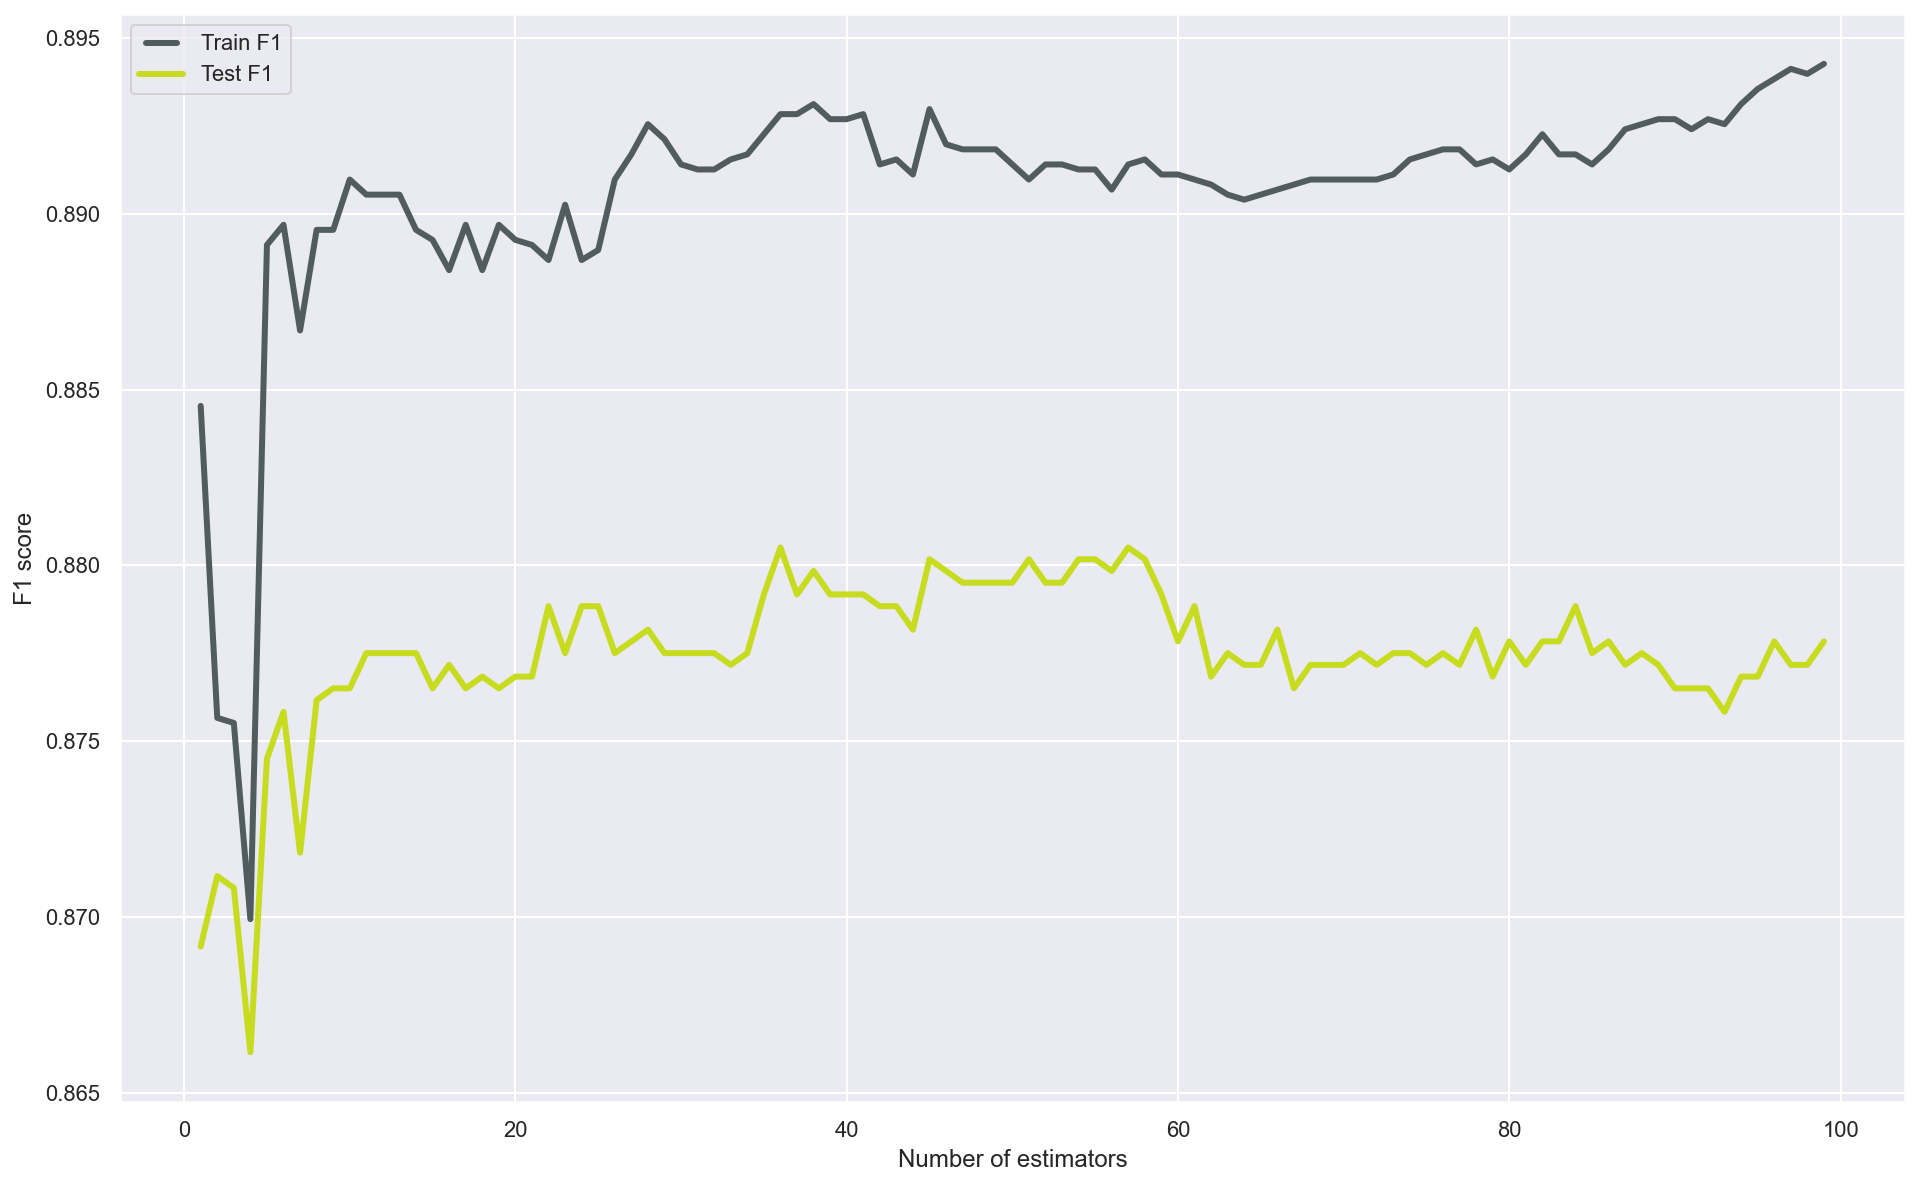

In [129]:
num_estimators = list(range(1,100))
calculate_f1(num_estimators, X_train, X_val, y_train, y_val,'Number of estimators')

The best train value is  0.2
The best test value is  0.2


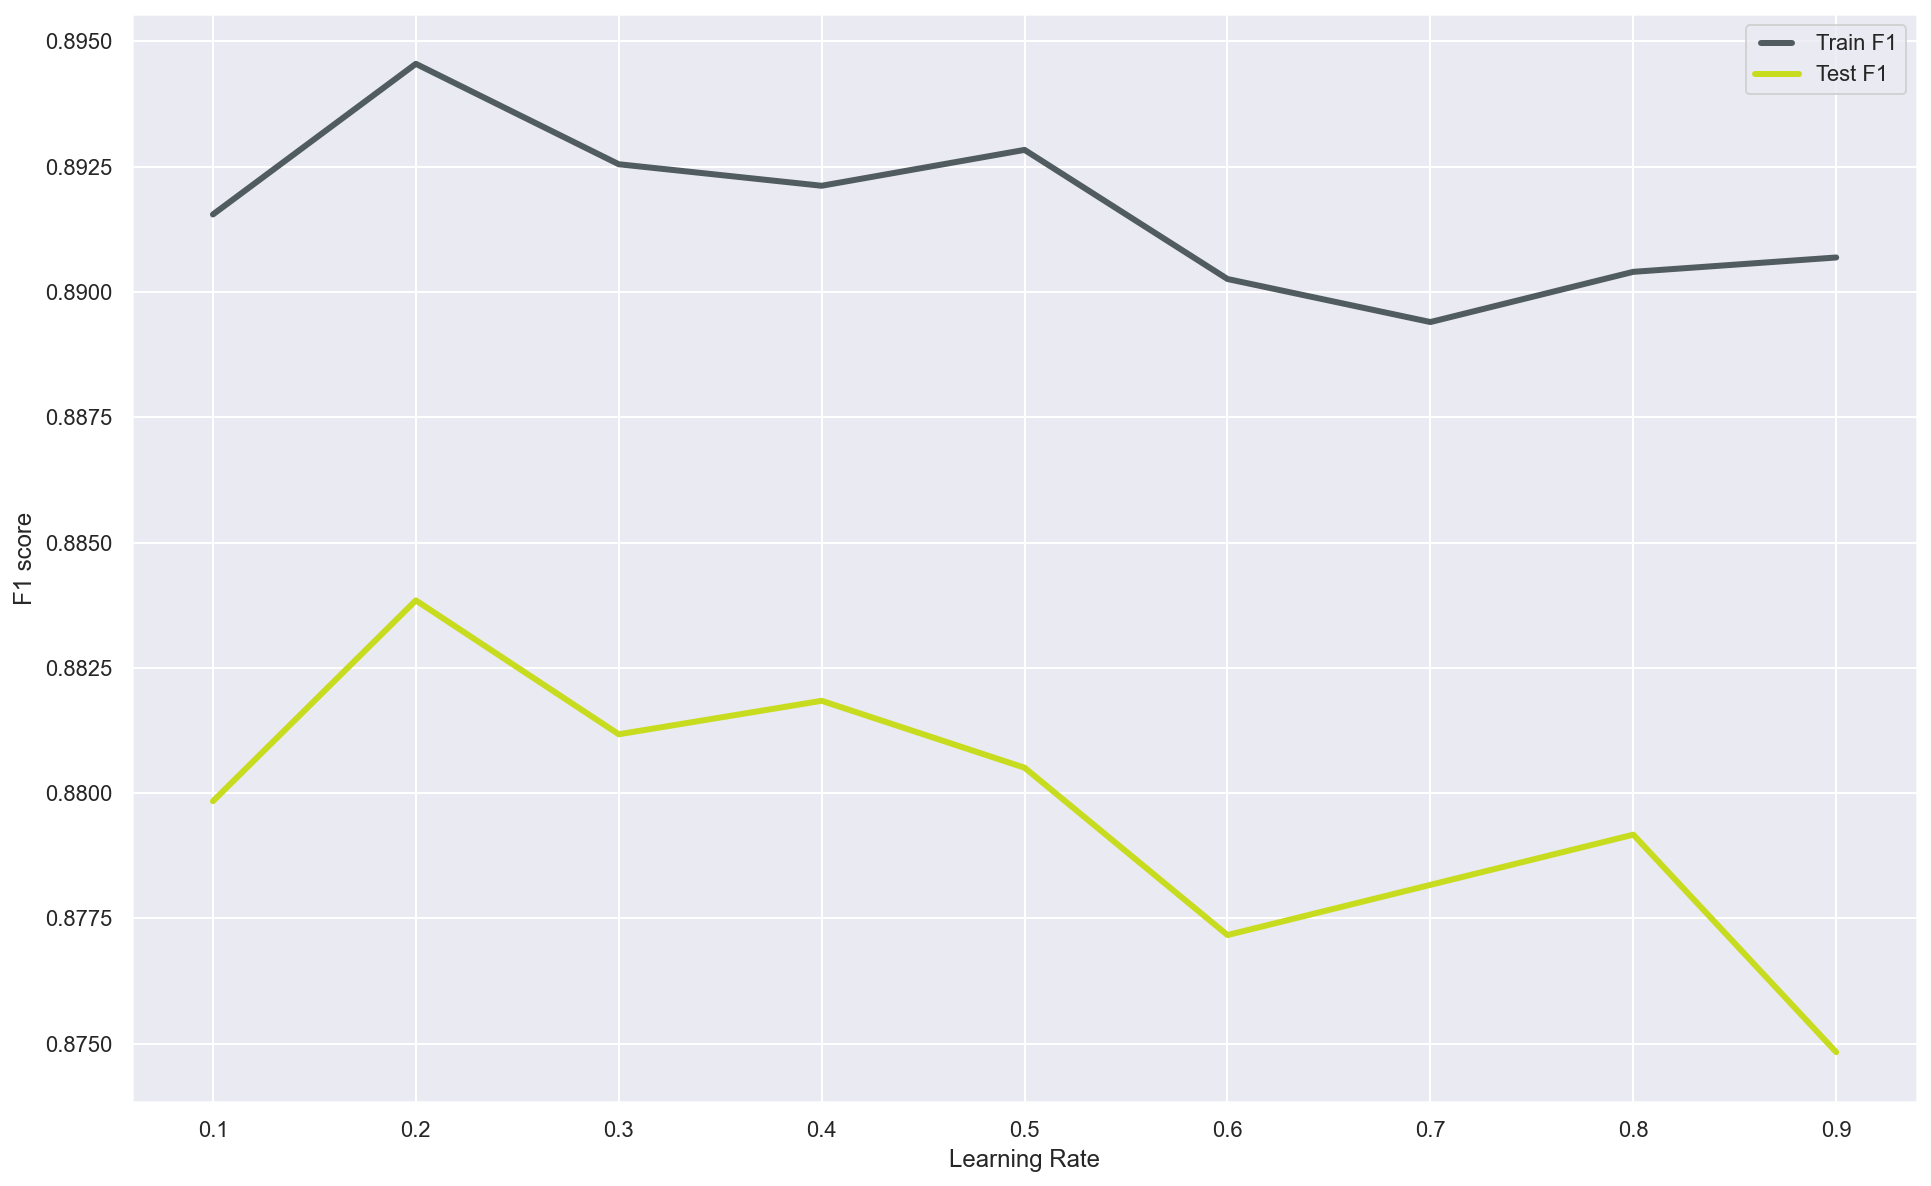

In [130]:
learning_rate = list(np.linspace(0.1, 0.9, 9, endpoint=True))
calculate_f1(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

In [119]:
ada = AdaBoostClassifier(n_estimators=10, random_state=5,learning_rate = 0.5).fit(X_train, y_train)

In [120]:
labels_train_ada = ada.predict(X_train)
accuracy_score(y_train, labels_train_ada)

0.8922592645585921

In [121]:
print(ada.score(X_train, y_train))
print(ada.score(X_val, y_val))

0.8922592645585921
0.87716955941255


In [122]:
labels_val_ada = ada.predict(X_val)
ADABOOST=accuracy_score(y_val, labels_val_ada)
ADABOOST

0.87716955941255

In [123]:
print(f1_score(labels_train_ada, y_train))
print(f1_score(labels_val_ada, y_val))

0.6466447677146878
0.6109936575052854


In [157]:
metrics(y_train, labels_train_ada, y_val, labels_val_ada)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5903
           1       0.66      0.63      0.65      1086

    accuracy                           0.89      6989
   macro avg       0.80      0.79      0.79      6989
weighted avg       0.89      0.89      0.89      6989

[[5547  356]
 [ 397  689]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [162]:
ADA = ada.score(X_val, y_val)

In [163]:
# labels_testada = ada.predict(test_t)

In [164]:
# sample['Buy'] = labels_testada
# sample.to_csv(r'ada.csv')

### 9.10 Stacking classifier  <a class="anchor" id="9.10"></a>

In [124]:
estimators = [('rf', RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8)),('nb', GaussianNB())]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)

In [125]:
labels_train_stacking = sc.predict(X_train)
labels_val_stacking = sc.predict(X_val)

In [126]:
print(f1_score(labels_train_stacking, y_train))
print(f1_score(labels_val_stacking, y_val))

0.7295336787564768
0.6076260762607626


In [127]:
print(sc.score(X_train, y_train))
print(sc.score(X_val, y_val))

0.9253112033195021
0.8935246995994659


In [167]:
metrics(y_train,labels_train_stacking,y_val,labels_val_stacking)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5903
           1       0.78      0.70      0.74      1086

    accuracy                           0.92      6989
   macro avg       0.86      0.83      0.85      6989
weighted avg       0.92      0.92      0.92      6989

[[5689  214]
 [ 329  757]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [162]:
sc_score = sc.score(X_train, y_train)
sc_score

0.9247388753755902

In [163]:
STACKING = sc.score(X_val, y_val)
STACKING

0.8928571428571429

In [167]:
# labels_teststackC = sc.predict(test_t)

In [83]:
# sample['Buy'] = labels_teststackC
# sample.to_csv(r'sc1.csv')

###  9.11 Voting Classifier <a class="anchor" id="9.11"></a>

In [128]:
vot_hard = VotingClassifier(estimators = estimators, voting ='hard') 
vot_hard=vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_val) 

In [129]:
score = accuracy_score(y_val, y_pred) 
print("Hard Voting Score % d" % score) 

Hard Voting Score  0


In [130]:
labels_train_vt = vot_hard.predict(X_train)
labels_val_vt = vot_hard.predict(X_val)

In [131]:
print(f1_score(labels_train_vt, y_train))
print(f1_score(labels_val_vt, y_val))

0.5918003565062389
0.530949105914718


In [175]:
vot_hard.score(X_train,y_train)

0.9162970382028902

In [176]:
HARD_VOTING=vot_hard.score(X_val,y_val)
HARD_VOTING

0.8931909212283045

In [179]:
labels_trainhv = vot_hard.predict(X_train)
labels_valhv = vot_hard.predict(X_val)

In [180]:
print(vot_hard.score(X_train, y_train))
print(vot_hard.score(X_val, y_val))
print(f1_score(labels_trainhv, y_train))
print(f1_score(labels_valhv, y_val))

0.9162970382028902
0.8931909212283045
0.6662863662293211
0.5555555555555555


In [172]:
vot_soft = VotingClassifier(estimators = estimators, voting ='soft') 
vot_soft=vot_soft.fit(X_train, y_train) 
y_pred = vot_soft.predict(X_val)

In [173]:
score = accuracy_score(y_val, y_pred) 
print("Soft Voting Score % d" % score) 

Soft Voting Score  0


In [174]:
vot_soft.score(X_train,y_train)

0.3330948633567034

In [175]:
SOFT_VOTING=vot_soft.score(X_val,y_val)
SOFT_VOTING

0.3307743658210948

In [176]:
# labels_testvot_hard = vot_hard.predict(test_t)

In [93]:
# sample['Buy'] = labels_testvot_hard
# sample.to_csv(r'vot_hard1.csv')

### 9.12 Random Forrest <a class="anchor" id="9.12"></a>

In [132]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf.fit(X = X_train, y = y_train)
labels_train = rf.predict(X_train)
labels_val = rf.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.9702970297029703
0.5676004872107187


In [133]:
rf = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterion:
criterion= ['entropy', 'auto']
# Create the random grid
rf_rand_par = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion': criterion}
print(rf_rand_par)

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['entropy', 'auto']}


In [134]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_rand_par, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'auto'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, verbose=2)

In [135]:
rf_best_random = rf_random.best_estimator_
rf_rand_labels = rf_best_random.predict(X_val)
rf_rand_score = f1_score(y_val, rf_rand_labels)
print('F1_score (Best rf_rand): ', "%.2f" % (rf_rand_score*100))

F1_score (Best rf_rand):  62.98


In [136]:
RF = rf_best_random.score(X_val, y_val)


In [137]:
rf_best_random.score(X_train, y_train)

0.9497782229217342

In [138]:
rf_best_random.score(X_val, y_val)

0.8948598130841121

In [139]:
labels_train_rf = rf_best_random.predict(X_train)
labels_val_rf = rf_best_random.predict(X_val)

In [140]:
print(f1_score(labels_train_rf, y_train))
print(f1_score(labels_val_rf, y_val))

0.823529411764706
0.6298472385428907


In [ ]:
print(f1_score(labels_train_vt, y_train))
print(f1_score(labels_val_vt, y_val))

In [88]:
labels_testrf_best_random = rf_best_random.predict(test_t)

In [89]:
# sample.set_index('Access_ID', inplace = True)
sample['Buy'] = labels_testrf_best_random
sample.to_csv(r'rf_best_random35.csv')

### 9.13 PassiveAggressiveClassifier <a class="anchor" id="9.13"></a>

In [148]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import StratifiedKFold
import time
PAC = PassiveAggressiveClassifier(C = 0.01, random_state = 0)
df = pd.DataFrame(columns = ['Time', 'Train', 'Test'], index = ['1'])
show_results(X_train, y_train, df, PAC)

Time        Train         Test
1  0.005+/-0.0  0.88+/-0.02  0.88+/-0.04

In [149]:
labels_train_pg = PAC.predict(X_train)
labels_val_pg = PAC.predict(X_val)

In [150]:
print(f1_score(labels_train_pg, y_train))
print(f1_score(labels_val_pg, y_val))

0.16859504132231404
0.1478599221789883


## 10. Models Comparison  <a class="anchor" id="10"></a>

#### 10.1 Models Comparison <a class="anchor" id="10.1"></a>

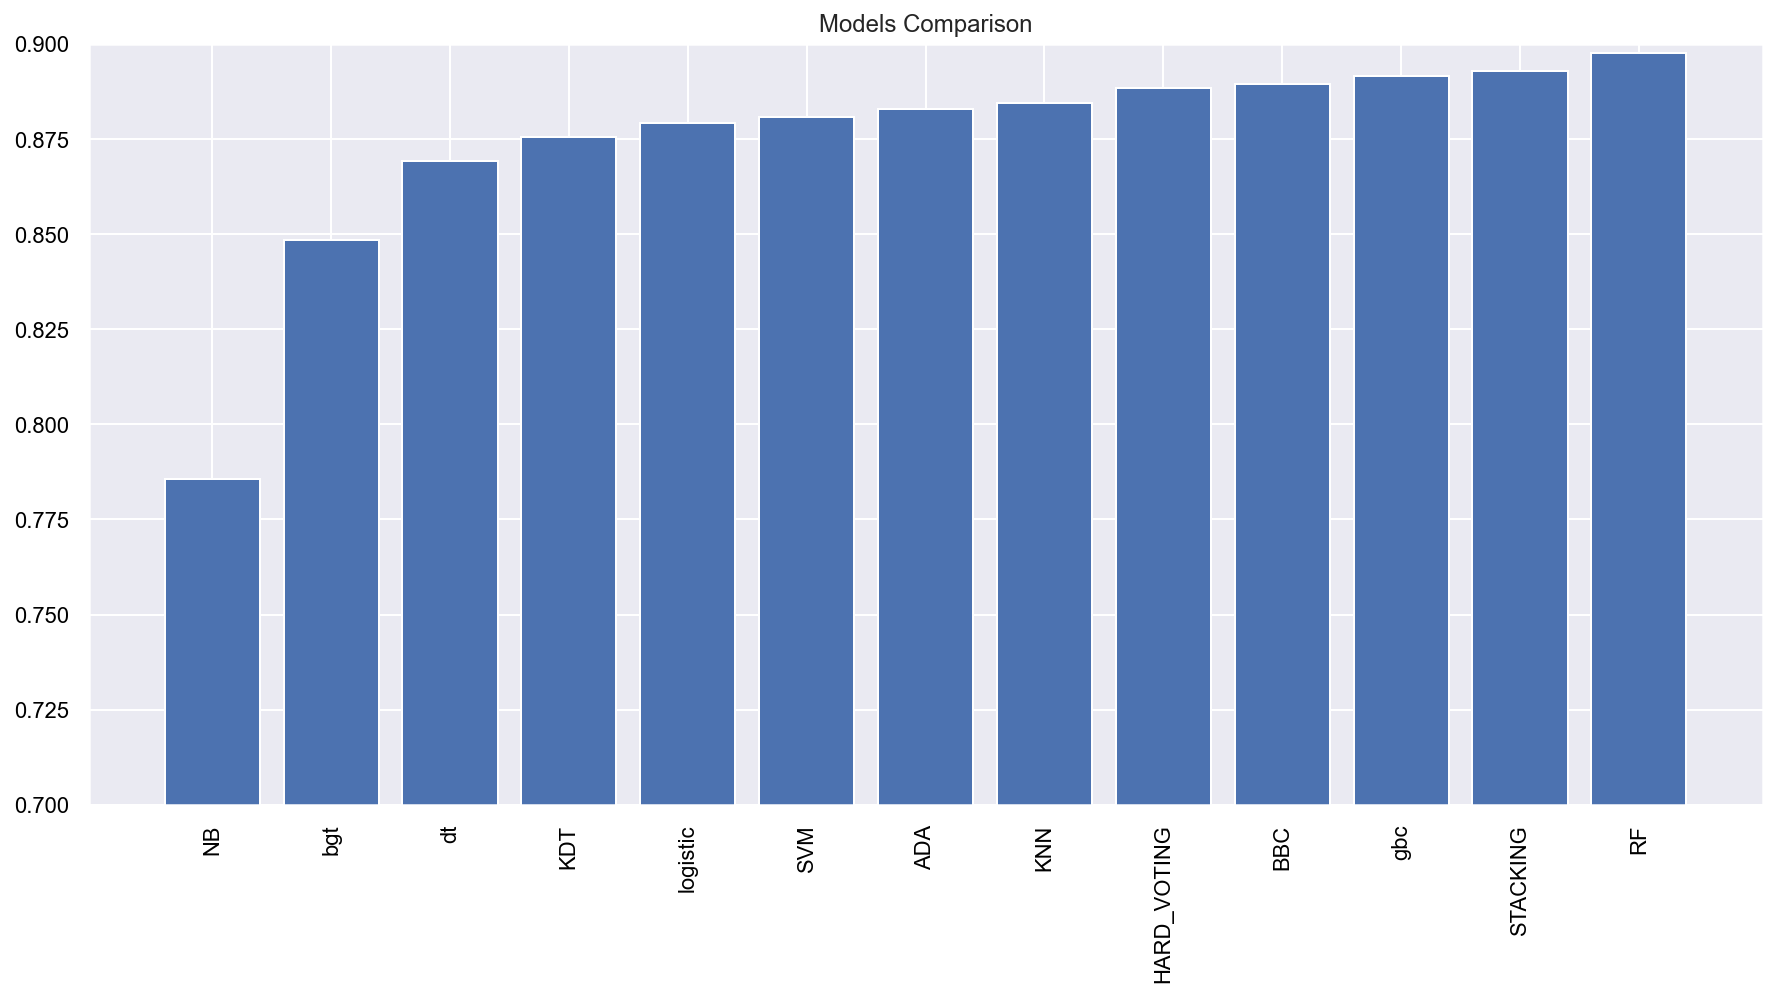

In [220]:
accuracies = [logistic,KNN,KDT,dt,NB,gbc,SVM,BBC,bgt,ADA,STACKING,HARD_VOTING,RF]
models = ["logistic","KNN","KDT","dt","NB","gbc","SVM","BBC","bgt","ADA","STACKING","HARD_VOTING","RF"]
data_tuples = list(zip(models, accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(15,7))
plt.bar(data[0], data[1])
plt.xticks(rotation=90)
plt.xticks(color='black')
plt.yticks(color='black')
plt.ylim(0.7, 0.9)
plt.title('Models Comparison')
plt.show()

### 10.2. ROC Curve <a class="anchor" id="10.2"></a>

In [151]:
log_reg=LogisticRegression(random_state=5).fit(X_train,y_train)
knn= KNeighborsClassifier().fit(X_train,y_train)
dt=DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.05).fit(X_train, y_train)
rf=rf_random.fit(X_train, y_train)
nb=GaussianNB().fit(X_train, y_train)
bbc = BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X_train, y_train)
tree=DecisionTreeClassifier()
bagg_tree=BaggingClassifier(base_estimator = tree,n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X_train,y_train)
adaboost=AdaBoostClassifier(n_estimators=90, random_state=5,learning_rate = 0.7000000000000001).fit(X_train,y_train)
estimators = [('rf', RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8)),('nb', GaussianNB())]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)
svm = SVC(kernel = 'rbf', gamma = 'auto',random_state=5, probability = True, C=50).fit(X_train, y_train)
gbc = GradientBoostingClassifier(min_samples_split=4,n_estimators = 182, random_state=0, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2').fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [152]:
from sklearn import metrics

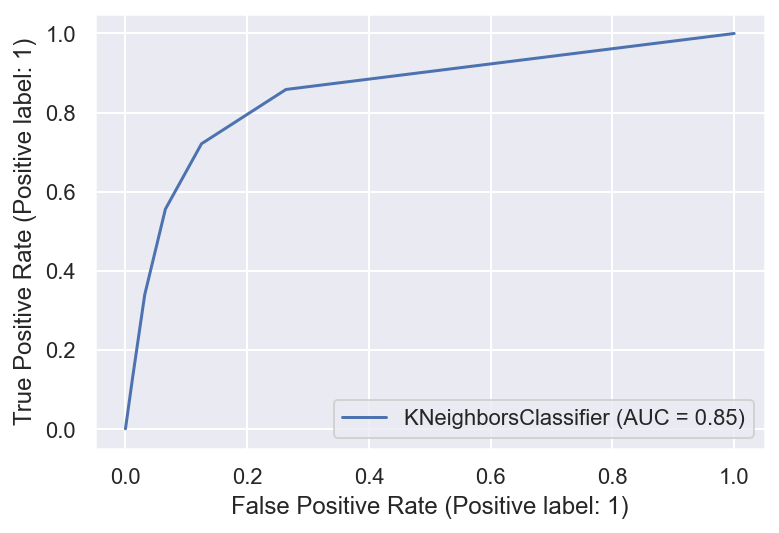

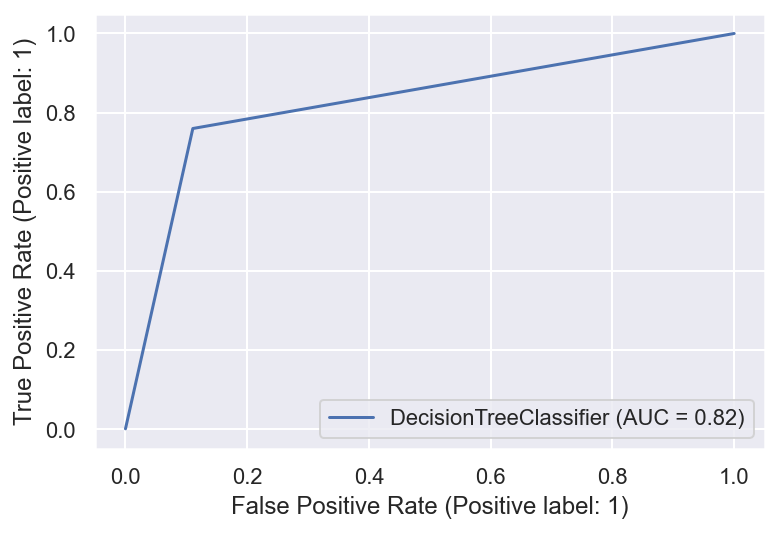

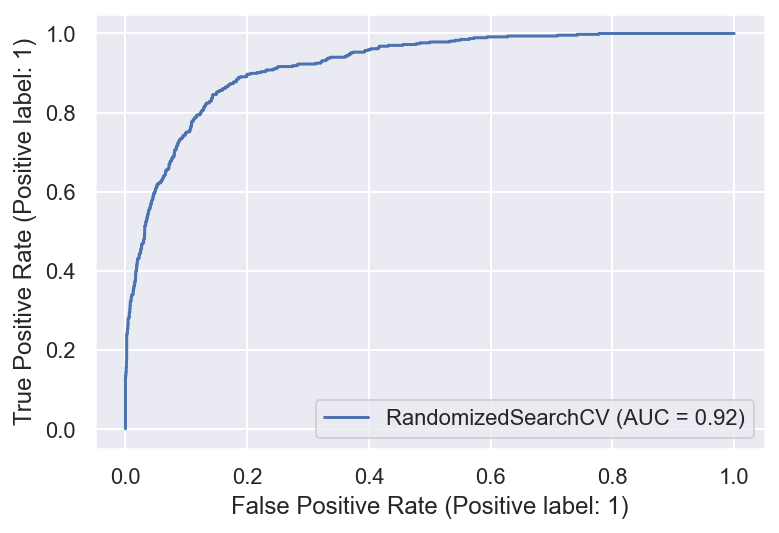

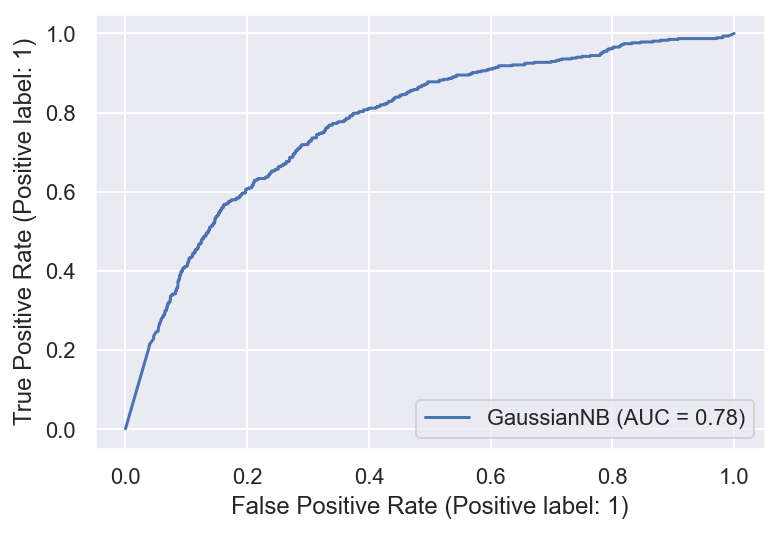

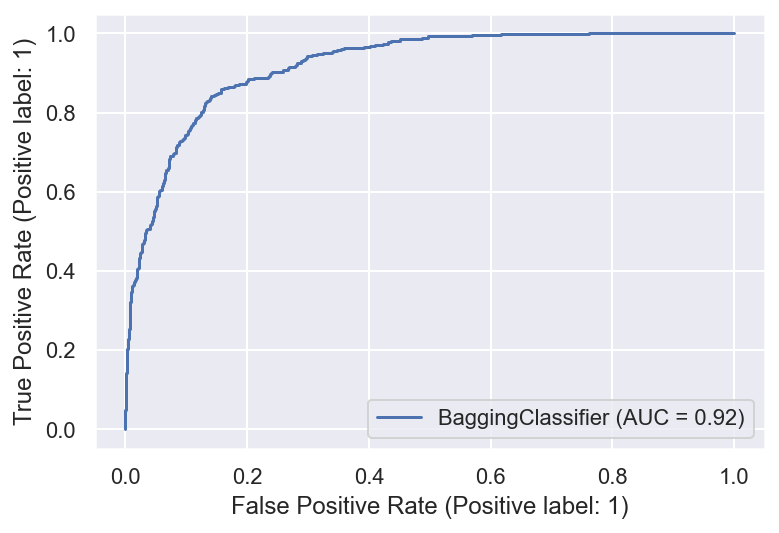

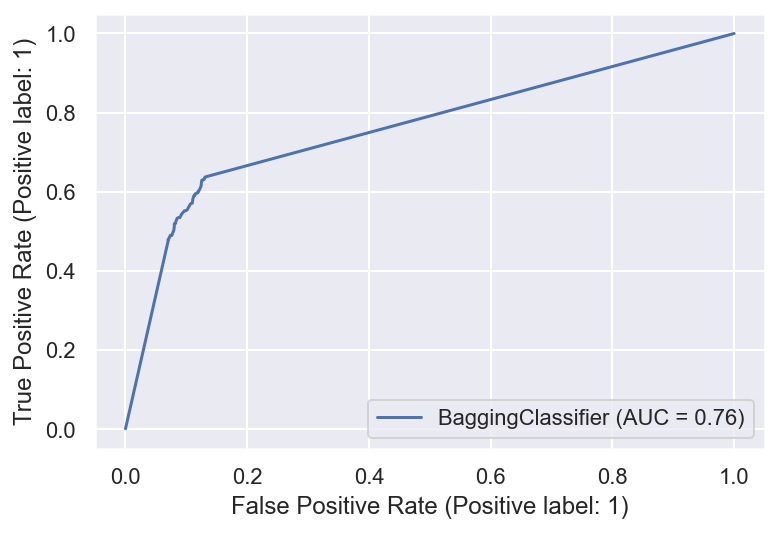

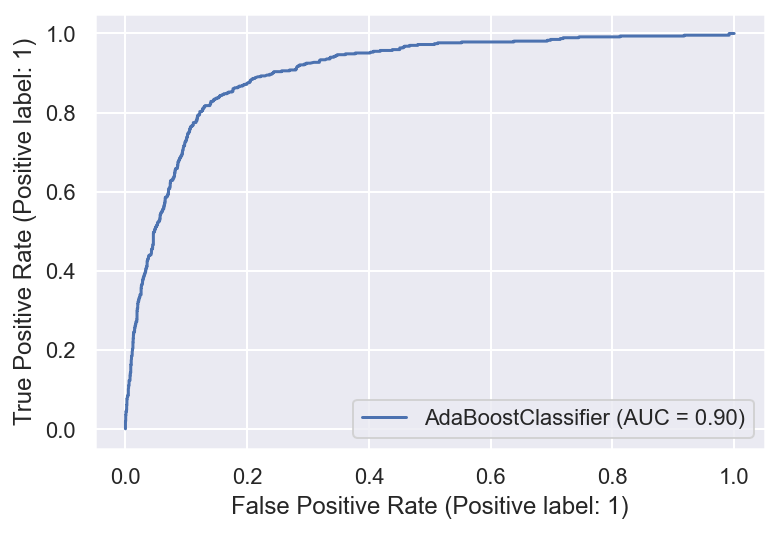

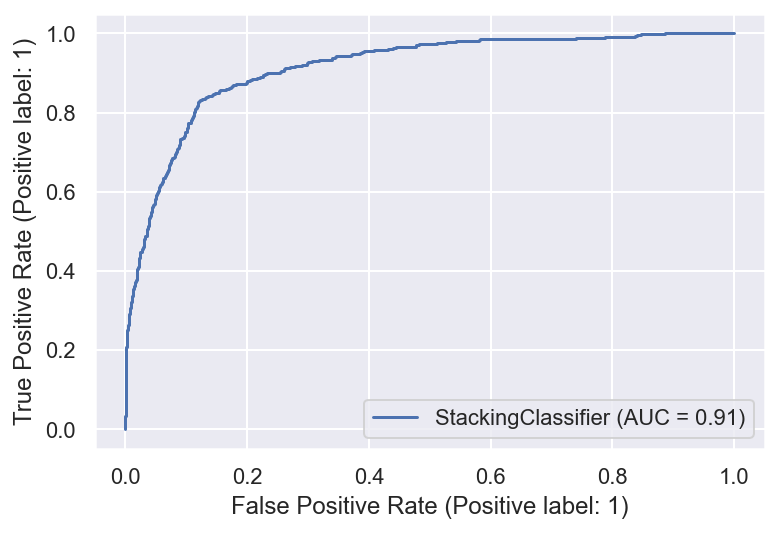

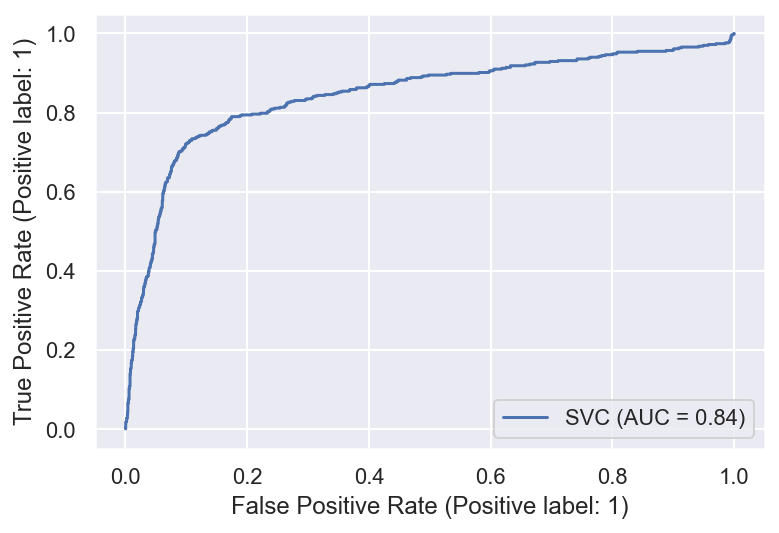

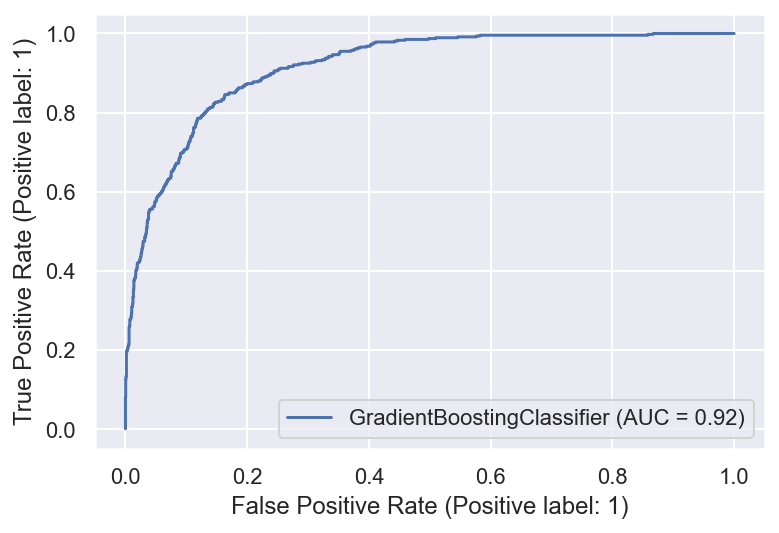

In [223]:
metrics.plot_roc_curve(knn, X_val, y_val) 
metrics.plot_roc_curve(dt, X_val, y_val) 
metrics.plot_roc_curve(rf, X_val, y_val) 
metrics.plot_roc_curve(nb, X_val, y_val) 
metrics.plot_roc_curve(bbc, X_val, y_val) 
metrics.plot_roc_curve(bagg_tree, X_val, y_val) 
metrics.plot_roc_curve(adaboost, X_val, y_val) 
metrics.plot_roc_curve(sc, X_val, y_val) 
metrics.plot_roc_curve(svm, X_val, y_val) 
metrics.plot_roc_curve(gbc, X_val, y_val)  
plt.show() 

In [224]:
classifiers = [MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs'), 
               LogisticRegression(random_state=5), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.05).fit(X_train, y_train),
               RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8),
               GaussianNB(),
               BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1),
               BaggingClassifier(base_estimator = tree,n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1),
               AdaBoostClassifier(n_estimators=90, random_state=5,learning_rate = 0.7000000000000001),
               StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()),
               SVC(kernel = 'rbf', gamma = 'auto',random_state=15, probability = True, C=50),
               GradientBoostingClassifier(min_samples_split=4,n_estimators = 182, random_state=0, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2')]

In [226]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [227]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_val)[::,1]
    
    fpr, tpr, _ = roc_curve(y_val,  yproba)
    auc = roc_auc_score(y_val, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


In [228]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [229]:
result_table

fpr  \
classifiers                                                                     
MLPClassifier               [0.0, 0.0, 0.0, 0.0003952569169960474, 0.00039...   
LogisticRegression          [0.0, 0.0, 0.0, 0.0003952569169960474, 0.00039...   
KNeighborsClassifier        [0.0, 0.011857707509881422, 0.0316205533596837...   
DecisionTreeClassifier      [0.0, 0.09011857707509881, 0.09051383399209487...   
RandomForestClassifier      [0.0, 0.0, 0.0, 0.0003952569169960474, 0.00039...   
GaussianNB                  [0.0, 0.0383399209486166, 0.03873517786561265,...   
BaggingClassifier           [0.0, 0.0, 0.0, 0.0003952569169960474, 0.00039...   
BaggingClassifier           [0.0, 0.0699604743083004, 0.0699604743083004, ...   
AdaBoostClassifier          [0.0, 0.0, 0.0, 0.0, 0.0, 0.000395256916996047...   
StackingClassifier          [0.0, 0.0, 0.0, 0.0003952569169960474, 0.00039...   
SVC                         [0.0, 0.0003952569169960474, 0.000395256916996...   
GradientBoostingClassifier  [0.0, 0.0, 0.0, 0.0003952569169960474, 0.00039...   

                                                                          tpr  \
classifiers                                                                     
MLPClassifier               [0.0, 0.002145922746781116, 0.0193133047210300...   
LogisticRegression          [0.0, 0.002145922746781116, 0.0042918454935622...   
KNeighborsClassifier        [0.0, 0.13090128755364808, 0.33905579399141633...   
DecisionTreeClassifier      [0.0, 0.5622317596566524, 0.5622317596566524, ...   
RandomForestClassifier      [0.0, 0.002145922746781116, 0.0343347639484978...   
GaussianNB                  [0.0, 0.20386266094420602, 0.20815450643776823...   
BaggingClassifier           [0.0, 0.002145922746781116, 0.0472103004291845...   
BaggingClassifier           [0.0, 0.4742489270386266, 0.47854077253218885,...   
AdaBoostClassifier          [0.0, 0.002145922746781116, 0.0128755364806866...   
StackingClassifier          [0.0, 0.002145922746781116, 0.0321888412017167...   
SVC                         [0.0, 0.0, 0.017167381974248927, 0.01716738197...   
GradientBoostingClassifier  [0.0, 0.002145922746781116, 0.0793991416309012...   

                                 auc  
classifiers                           
MLPClassifier               0.910484  
LogisticRegression          0.884631  
KNeighborsClassifier        0.852256  
DecisionTreeClassifier      0.735970  
RandomForestClassifier      0.916339  
GaussianNB                  0.775325  
BaggingClassifier           0.920746  
BaggingClassifier           0.761959  
AdaBoostClassifier          0.903523  
StackingClassifier          0.914667  
SVC                         0.844818  
GradientBoostingClassifier  0.915851

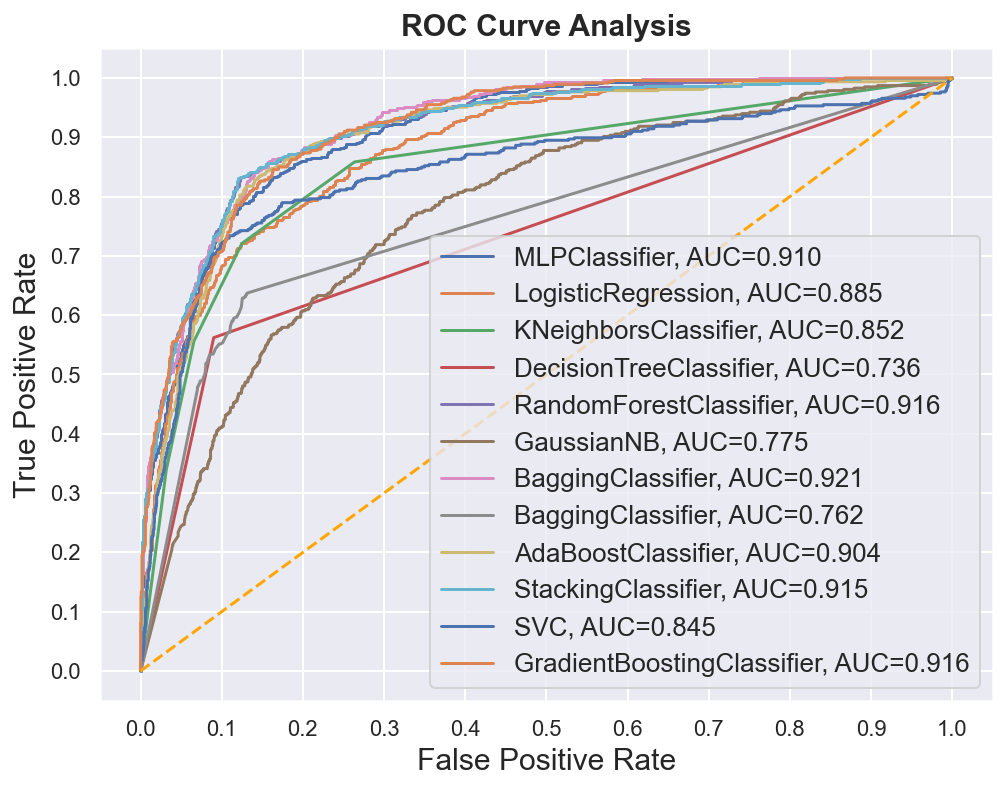

In [230]:
fig = plt.figure(figsize=(8,6))

for i in range(0,12):
    plt.plot(result_table.iloc[i]['fpr'], 
             result_table.iloc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.index[i], result_table.iloc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()